In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/JnQ/'

os.chdir(current_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# requirements

In [2]:
!pip install mpl_finance
# !pip install findiff

import matplotlib.pyplot as plt
from matplotlib import gridspec
from tqdm.notebook import tqdm
from funcs_indicator import *
from funcs_for_trade import *

import mpl_finance as mf
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl

import numpy as np
import pandas as pd
import seaborn as sns
# import tensorflow as tf

import pickle
import shutil
# from trendln import trendln

from datetime import datetime

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# load data

In [ ]:
# interval = '30m'
interval = '1m'
interval = '1h'

date_path = './candlestick_concated/%s/quant_v2/' % interval
file_list = os.listdir(date_path)
print((file_list))

interval2 = '3m'
date_path2 = './candlestick_concated/%s/quant_v2/' % interval2
file_list2 = os.listdir(date_path2)
print((file_list2))

interval3 = '5m'
date_path3 = './candlestick_concated/%s/quant_v2/' % interval3
file_list3 = os.listdir(date_path3)
print((file_list3))

interval4 = '15m'
date_path4 = './candlestick_concated/%s/quant_v2/' % interval4
file_list4 = os.listdir(date_path4)
print((file_list4))

interval5 = '30m'
date_path5 = './candlestick_concated/%s/quant_v2/' % interval5
file_list5 = os.listdir(date_path5)
print((file_list5))

interval6 = '4h'
date_path6 = './candlestick_concated/%s/quant_v2/' % interval6
file_list6 = os.listdir(date_path6)
print((file_list6))

interval7 = '1d'
date_path7 = './candlestick_concated/%s/quant_v2/' % interval7
file_list7 = os.listdir(date_path7)
print((file_list7))

['2021-07-01 BTCUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx', '2021-07-01 ADAUSDT.xlsx', '2021-07-01 XLMUSDT.xlsx', '2021-07-01 LINKUSDT.xlsx', '2021-07-01 LTCUSDT.xlsx', '2021-07-01 EOSUSDT.xlsx', '2021-07-01 XRPUSDT.xlsx', '2021-07-01 BCHUSDT.xlsx', '2021-07-01 ETCUSDT.xlsx']
['2021-05-30 ETHUSDT.xlsx', '2021-04-30 ETHUSDT.xlsx', '2021-07-03 ETHUSDT.xlsx', '2021-07-01 BTCUSDT.xlsx', '2021-07-01 BCHUSDT.xlsx', '2021-07-01 XRPUSDT.xlsx', '2021-07-01 EOSUSDT.xlsx', '2021-07-01 LTCUSDT.xlsx', '2021-07-01 ETCUSDT.xlsx', '2021-07-01 LINKUSDT.xlsx', '2021-07-01 XLMUSDT.xlsx', '2021-07-01 ADAUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx', '2021-06-30 SUSHIUSDT.xlsx', '2021-06-30 CVCUSDT.xlsx', '2021-06-30 BTSUSDT.xlsx', '2021-06-30 HOTUSDT.xlsx', '2021-06-30 ZRXUSDT.xlsx', '2021-06-30 QTUMUSDT.xlsx', '2021-06-30 IOTAUSDT.xlsx', '2021-06-30 BTCBUSD.xlsx', '2021-06-30 WAVESUSDT.xlsx', '2021-06-30 LITUSDT.xlsx', '2021-06-30 XTZUSDT.xlsx', '2021-06-30 BNBUSDT.xlsx', '2021-06-30 AKROUSDT.xlsx', '2021-06-30 HNTUS

# basic_func

In [ ]:
def st_price_line(ltf_df, htf_df, number):

  ha_htf_df = heikinashi(htf_df)

  st1_up, st2_up, st3_up = 'ST1_Up%s' % number, 'ST2_Up%s' % number, 'ST3_Up%s' % number
  st1_down, st2_down, st3_down = 'ST1_Down%s' % number, 'ST2_Down%s' % number, 'ST3_Down%s' % number
  st1_trend, st2_trend, st3_trend = 'ST1_Trend%s' % number, 'ST2_Trend%s' % number, 'ST3_Trend%s' % number
  
  htf_df[st1_up], htf_df[st1_down], htf_df[st1_trend] = supertrend(htf_df, 10, 2)
  htf_df[st2_up], htf_df[st2_down], htf_df[st2_trend] = supertrend(ha_htf_df, 7, 2)
  htf_df[st3_up], htf_df[st3_down], htf_df[st3_trend] = supertrend(ha_htf_df, 7, 2.5)
  # print(df.head(20))
  # quit()

  # startTime = time.time()

  ltf_df = ltf_df.join(pd.DataFrame(index=ltf_df.index, data=to_lower_tf(ltf_df, htf_df, [i for i in range(-9, 0, 1)]),
                            columns=[st1_up, st1_down, st1_trend
                                , st2_up, st2_down, st2_trend
                                , st3_up, st3_down, st3_trend]))  
  
  min_upper, max_lower = 'min_upper%s' % number, 'max_lower%s' % number
  middle_line = 'middle_line%s' % number
  upper_middle, lower_middle = 'upper_middle%s' % number, 'lower_middle%s' % number
  st_gap = 'st_gap%s' % number

  ltf_df[min_upper] = np.min(ltf_df[[st1_up, st2_up, st3_up]], axis=1)
  ltf_df[max_lower] = np.max(ltf_df[[st1_down, st2_down, st3_down]], axis=1)

  ltf_df[middle_line] = (ltf_df[min_upper] + ltf_df[max_lower]) / 2

  # --------------- 2nd middle --------------- #    
  ltf_df[upper_middle] = (ltf_df[middle_line] + ltf_df[min_upper]) / 2
  ltf_df[lower_middle] = (ltf_df[middle_line] + ltf_df[max_lower]) / 2

  ltf_df[st_gap] = ltf_df[upper_middle] - ltf_df[middle_line]

  return ltf_df


def sync_check(df, second_df, third_df, fourth_df, fifth_df, sixth_df=None, seventh_df=None):

    #           supertrend          #
    # df = st_price_line(df, second_df, 2)
    # # print(df.head(100))
    # # return

    # df = st_price_line(df, fifth_df, 5)
    # df = st_price_line(df, sixth_df, 6)
    # df = st_price_line(df, seventh_df, 7)


    # print("supertrend phase done")

    
    # --------------- mmh & norm st --------------- #    
    df['mmh_st1'] = mmh_st(df, 3)
    df['mmh_st2'] = mmh_st(df, 5)
    df['norm_st_up'], df['norm_st_down'], df['norm_st_trend'] = supertrend(df, 5, 6)

    print("mmh & norm st phase done")


    #           lucid sar              #
    # df['sar1'], df['sar1_uptrend'] = lucid_sar(df, return_uptrend=True)

    # second_df['sar'], second_df['sar_uptrend'] = lucid_sar(second_df, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-2, -1]), columns=['sar2', 'sar2_uptrend']))

    # third_df['sar'], third_df['sar_uptrend'] = lucid_sar(third_df, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-2, -1]), columns=['sar3', 'sar3_uptrend']))

    # fourth_df['sar'], fourth_df['sar_uptrend'] = lucid_sar(fourth_df, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-2, -1]), columns=['sar4', 'sar4_uptrend']))

    # fifth_df['sar'], fifth_df['sar_uptrend'] = lucid_sar(fifth_df, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-2, -1]), columns=['sar5', 'sar5_uptrend']))
    
    # if sixth_df is not None:
    #   sixth_df['sar'], sixth_df['sar_uptrend'] = lucid_sar(sixth_df, return_uptrend=True)
    #   df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, sixth_df, [-2, -1]), columns=['sar6', 'sar6_uptrend']))
    
    # if seventh_df is not None:
    #   seventh_df['sar'], seventh_df['sar_uptrend'] = lucid_sar(seventh_df, return_uptrend=True)
    #   df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, seventh_df, [-2, -1]), columns=['sar7', 'sar7_uptrend']))

    # # print(df[['sar1', 'sar2']].tail(20))
    # # print(df[['ST1_Up2', 'ST1_Trend2']].tail(20))
    # # quit()

    # print("sar phase done")


    
    # #           ichimoku            #
    # df['senkou_a1'], df['senkou_b1'] = ichimoku(df)
    
    # second_df['senkou_a'], second_df['senkou_b'] = ichimoku(second_df)
    # df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-2, -1]), columns=['senkou_a2', 'senkou_b2']))
    
    # third_df['senkou_a'], third_df['senkou_b'] = ichimoku(third_df)
    # df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-2, -1]), columns=['senkou_a3', 'senkou_b3']))
    
    # fourth_df['senkou_a'], fourth_df['senkou_b'] = ichimoku(fourth_df)
    # df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-2, -1]), columns=['senkou_a4', 'senkou_b4']))
    
    # fifth_df['senkou_a'], fifth_df['senkou_b'] = ichimoku(fifth_df)
    # df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-2, -1]), columns=['senkou_a5', 'senkou_b5']))

    # if sixth_df is not None:
    #   sixth_df['senkou_a'], sixth_df['senkou_b'] = ichimoku(sixth_df)
    #   df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, sixth_df, [-2, -1]), columns=['senkou_a6', 'senkou_b6']))

    # if seventh_df is not None:
    #   seventh_df['senkou_a'], seventh_df['senkou_b'] = ichimoku(seventh_df)
    #   df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, seventh_df, [-2, -1]), columns=['senkou_a7', 'senkou_b7']))


    # #           1-2. displacement           #
    # cloud_cnt = 0
    # for col_n in df.columns:
    #   if 'senkou' in col_n:
    #     cloud_cnt += 1
    # print(cloud_cnt)

    # # df['senkou_a1'] = df['senkou_a1'].shift(26 - 1)
    # # df['senkou_b1'] = df['senkou_b1'].shift(26 - 1)
    # # # df.iloc[:, -10:] = df.iloc[:, -10:].shift(26 - 1)
    # # # df.iloc[:, -14:] = df.iloc[:, -14:].shift(26 - 1)
    # df.iloc[:, -cloud_cnt:] = df.iloc[:, -cloud_cnt:].shift(26 - 1)

    # print("cloud phase done")

    
    # #           macd            #
    # df['macd_hist1'] = macd(df)
    
    # second_df['macd_hist'] = macd(second_df)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-1]), columns=['macd_hist2']))

    # third_df['macd_hist'] = macd(third_df)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1]), columns=['macd_hist3']))

    # fourth_df['macd_hist'] = macd(fourth_df)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-1]), columns=['macd_hist4']))

    # fifth_df['macd_hist'] = macd(fifth_df)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-1]), columns=['macd_hist5']))
    
    # if sixth_df is not None:
    #   sixth_df['macd_hist'] = macd(sixth_df)
    #   df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, sixth_df, [-1]), columns=['macd_hist6']))
    
    # if seventh_df is not None:
    #   seventh_df['macd_hist'] = macd(seventh_df)
    #   df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, seventh_df, [-1]), columns=['macd_hist7']))


    # print("macd phase done")


    # #         trix        #
    # df['trix1'] = trix_hist(df, 14, 1, 5)
    
    # second_df['trix'] = trix_hist(second_df, 14, 1, 5)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-1]), columns=['trix2']))

    # third_df['trix'] = trix_hist(third_df, 14, 1, 5)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1]), columns=['trix3']))

    # fourth_df['trix'] = trix_hist(fourth_df, 14, 1, 5)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-1]), columns=['trix4']))

    # fifth_df['trix'] = trix_hist(fifth_df, 14, 1, 5)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-1]), columns=['trix5']))

    # if sixth_df is not None:
    #   sixth_df['trix'] = trix_hist(sixth_df, 14, 1, 5)
    #   df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, sixth_df, [-1]), columns=['trix6']))

    # if seventh_df is not None:
    #   seventh_df['trix'] = trix_hist(seventh_df, 14, 1, 5)
    #   df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, seventh_df, [-1]), columns=['trix7']))
  

    return df


# make & save res_df

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue
  
  # if 'btc'.upper() not in file_list[i]:
  #   continue

  # if '2021-04-30'.upper() not in file_list[i]:
  # if '2021-05-30'.upper() not in file_list[i]:
  # if '2021-06-30'.upper() not in file_list[i]:
  # if '2021-07-03'.upper() not in file_list[i]:
  if '2021-07-01'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'etc'.upper() not in key:
    #   continue

    excel_name = key.replace(".xlsx", "_mmh_on1h_backi2.xlsx")
    excel_path = save_path + excel_name

    if excel_name in exist_list:
      print(excel_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

      latest_open_index = sorted(open_indexes)[-1]
      
      open_ts = datetime.timestamp(latest_open_index)
      latest_open_index_1m = datetime.fromtimestamp(open_ts + a_day)

      #   str 로 만들어 접근하면 불가함  #
      end_index = pd.to_datetime(str(df.index[-1]).split(" ")[0] + " 08:59:59.999000")
      # break

      sliced_df = df.loc[latest_open_index_1m:end_index] # to_lower_tf 의 기준 ltf
      sliced_second_df = second_df.loc[latest_open_index:end_index]
      sliced_third_df = third_df.loc[latest_open_index:end_index]
      sliced_fourth_df = fourth_df.loc[latest_open_index:end_index]
      sliced_fifth_df = fifth_df.loc[latest_open_index:end_index]
      sliced_sixth_df = sixth_df.loc[latest_open_index:end_index]
      sliced_seventh_df = seventh_df.loc[latest_open_index:end_index]

      print("sliced index")
      print(sliced_df.index[[0, -1]])
      print(sliced_second_df.index[[0, -1]])
      print(sliced_third_df.index[[0, -1]])
      print(sliced_fourth_df.index[[0, -1]])
      print(sliced_fifth_df.index[[0, -1]])
      print(sliced_sixth_df.index[[0, -1]])
      print(sliced_seventh_df.index[[0, -1]])


    except Exception as e:
      # print(e)
      res_df = sync_check(df, second_df, third_df, fourth_df, fifth_df)

    else:
      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df, sliced_sixth_df, sliced_seventh_df)



    res_df.to_excel(excel_path)
    print(excel_name, "saved succesfully !")

  0%|          | 0/10 [00:00<?, ?it/s]

DatetimeIndex(['2020-09-05 00:59:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:02:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:04:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:14:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:29:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-05 04:59:59.999000', '2021-07-02 00:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-06 08:59:59.999000', '2021-07-02 08:59:59.999000'], dtype='datetime64[ns]', freq=None)

sliced index
DatetimeIndex(['2020-09-07 08:59:59.999000', '2021-07-01 08:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-06 08:59:59.999000', '2021-07-01 08:59:59.999000'], dtype='datetime64[ns]'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

mmh & norm st phase done
2021-07-01 BTCUSDT_mmh_on1h_backi2.xlsx saved succesfully !
DatetimeIndex(['2020-09-05 00:59:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:02:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:04:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:14:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:29:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-05 04:59:59.999000', '2021-07-02 00:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-06 08:59:59.999000', '2021-07-02 08:59:59.999000'], dtype='datetime64[ns]', freq=None)

sliced index
DatetimeIndex(['2020-09-07 08:59:59.999000', '2021-07-01 08:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

mmh & norm st phase done
2021-07-01 ETHUSDT_mmh_on1h_backi2.xlsx saved succesfully !
DatetimeIndex(['2020-09-05 00:59:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:02:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:04:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:14:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:29:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-05 04:59:59.999000', '2021-07-02 00:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-06 08:59:59.999000', '2021-07-02 08:59:59.999000'], dtype='datetime64[ns]', freq=None)

sliced index
DatetimeIndex(['2020-09-07 08:59:59.999000', '2021-07-01 08:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

mmh & norm st phase done
2021-07-01 ADAUSDT_mmh_on1h_backi2.xlsx saved succesfully !
DatetimeIndex(['2020-09-05 00:59:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:02:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:04:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:14:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:29:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-05 04:59:59.999000', '2021-07-02 00:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-06 08:59:59.999000', '2021-07-02 08:59:59.999000'], dtype='datetime64[ns]', freq=None)

sliced index
DatetimeIndex(['2020-09-07 08:59:59.999000', '2021-07-01 08:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

mmh & norm st phase done
2021-07-01 XLMUSDT_mmh_on1h_backi2.xlsx saved succesfully !
DatetimeIndex(['2020-09-05 00:59:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:02:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:04:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:14:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:29:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-05 04:59:59.999000', '2021-07-02 00:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-06 08:59:59.999000', '2021-07-02 08:59:59.999000'], dtype='datetime64[ns]', freq=None)

sliced index
DatetimeIndex(['2020-09-07 08:59:59.999000', '2021-07-01 08:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

mmh & norm st phase done
2021-07-01 LINKUSDT_mmh_on1h_backi2.xlsx saved succesfully !
DatetimeIndex(['2020-09-05 00:59:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:02:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:04:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:14:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:29:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-05 04:59:59.999000', '2021-07-02 00:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-06 08:59:59.999000', '2021-07-02 08:59:59.999000'], dtype='datetime64[ns]', freq=None)

sliced index
DatetimeIndex(['2020-09-07 08:59:59.999000', '2021-07-01 08:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeInde

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

mmh & norm st phase done
2021-07-01 LTCUSDT_mmh_on1h_backi2.xlsx saved succesfully !
DatetimeIndex(['2020-09-05 00:59:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:02:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:04:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:14:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:29:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-05 04:59:59.999000', '2021-07-02 00:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-06 08:59:59.999000', '2021-07-02 08:59:59.999000'], dtype='datetime64[ns]', freq=None)

sliced index
DatetimeIndex(['2020-09-07 08:59:59.999000', '2021-07-01 08:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

mmh & norm st phase done
2021-07-01 EOSUSDT_mmh_on1h_backi2.xlsx saved succesfully !
DatetimeIndex(['2020-09-05 00:59:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:02:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:04:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:14:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:29:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-05 04:59:59.999000', '2021-07-02 00:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-06 08:59:59.999000', '2021-07-02 08:59:59.999000'], dtype='datetime64[ns]', freq=None)

sliced index
DatetimeIndex(['2020-09-07 08:59:59.999000', '2021-07-01 08:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

mmh & norm st phase done
2021-07-01 XRPUSDT_mmh_on1h_backi2.xlsx saved succesfully !
DatetimeIndex(['2020-09-05 00:59:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:02:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:04:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:14:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-04 00:29:59.999000', '2021-07-01 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-05 04:59:59.999000', '2021-07-02 00:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-09-06 08:59:59.999000', '2021-07-02 08:59:59.999000'], dtype='datetime64[ns]', freq=None)

sliced index
DatetimeIndex(['2020-09-07 08:59:59.999000', '2021-07-01 08:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

mmh & norm st phase done
2021-07-01 BCHUSDT_mmh_on1h_backi2.xlsx saved succesfully !
2021-07-01 ETCUSDT_mmh_on1h_backi2.xlsx already exist !


# load res_df

In [ ]:
save_path = './candlestick_concated/res_df/'

# key = '2021-07-03 ETHUSDT.xlsx'
# key = '2021-07-01 ETHUSDT.xlsx'
key = '2021-07-01 ETHUSDT_backi2.xlsx'
# key = '2021-06-30 ETHUSDT_backi2.xlsx'
# key = '2021-06-30 BTCUSDT_backi2.xlsx'
# key = '2021-06-30 XRPUSDT_backi2.xlsx'
# key = '2021-06-30 ETHUSDT_backi1.xlsx'
res_df = pd.read_excel(save_path + key, index_col=0)

# sync check

In [ ]:
plot_size = 300


#         select plot columns       #
basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

sar_cols = [15, 18] # 15 ~ 19
ichimoku_cols = [20, 21]  # 20 ~ 29
macd_cols = [30]  # 30 ~ 34

input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols



#         do plot       #
plot_df = res_df.iloc[-plot_size:, input_cols]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# fig.show()
# fig.canvas.draw()

temp_ohlc = plot_df.values[:, :4]
index = np.arange(len(temp_ohlc))
candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

# print(plot_df.values[:, 4:])
plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper
plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower
plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle

plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                  where=plot_df.values[:, 13] >= plot_df.values[:, 14], facecolor='g', alpha=0.5) # ichimoku
plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                  where=plot_df.values[:, 13] <= plot_df.values[:, 14], facecolor='r', alpha=0.5)



plt.show()
# plt.draw()
plt.close()
# plt.pause(1e-3)

# pr check with strategy

### save sample res_dfs

In [ ]:
save_path = './candlestick_concated/res_df/'
res_df_files = os.listdir(save_path)
res_df_files.reverse()

print(res_df_files)

res_df_dict = {}

max_cnt = 10
sample_cnt = max_cnt

for k_i, key in enumerate(res_df_files):
  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  # if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  if '2021-07-01'.upper() not in key:
    continue

  # if "link".upper() not in key:
  # if "btc".upper() not in key:
  #   continue

  if "_mmh_on1h_backi2.xlsx" not in key:
    continue

  if sample_cnt == max_cnt:
    dict_name = "%s_res_dfs.pkl" % key.split(".")[0]
    print("dict_name :", dict_name)

  res_df = pd.read_excel(save_path + key, index_col=0)  

  res_df_dict[key] = res_df
  print(key, "saved to dict !")

  #     save with pickle    #
  with open(save_path + dict_name, 'wb') as f:
    pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt <= 0:
    break


['2021-07-01 BCHUSDT_mmh_on1h_backi2.xlsx', '2021-07-01 XRPUSDT_mmh_on1h_backi2.xlsx', '2021-07-01 EOSUSDT_mmh_on1h_backi2.xlsx', '2021-07-01 LTCUSDT_mmh_on1h_backi2.xlsx', '2021-07-01 LINKUSDT_mmh_on1h_backi2.xlsx', '2021-07-01 XLMUSDT_mmh_on1h_backi2.xlsx', '2021-07-01 ADAUSDT_mmh_on1h_backi2.xlsx', '2021-07-01 ETHUSDT_mmh_on1h_backi2.xlsx', '2021-07-01 BTCUSDT_mmh_on1h_backi2.xlsx', '2021-07-01 ADAUSDT_mmh_on30m_backi2_res_dfs.pkl', '2021-07-01 ADAUSDT_mmh_on30m_backi2.xlsx', '2021-07-01 XLMUSDT_mmh_on30m_backi2.xlsx', '2021-07-01 LINKUSDT_mmh_on30m_backi2.xlsx', '2021-07-01 ETCUSDT_mmh_on30m_backi2.xlsx', '2021-07-01 LTCUSDT_mmh_on30m_backi2.xlsx', '2021-07-01 EOSUSDT_mmh_on30m_backi2.xlsx', '2021-07-01 XRPUSDT_mmh_on30m_backi2.xlsx', '2021-07-01 BCHUSDT_mmh_on30m_backi2.xlsx', '2021-07-01 BTCUSDT_mmh_on30m_backi2.xlsx', '2021-07-01 ETHUSDT_mmh_on30m_backi2.xlsx', '2021-07-01 ADAUSDT_mmh_on15m_backi2_res_dfs.pkl', '2021-07-01 ADAUSDT_mmh_on15m_backi2.xlsx', '2021-07-01 XLMUSDT_mmh_

## load res_df_dict

In [3]:
save_path = './candlestick_concated/res_df/'
dict_name = "2021-07-01 ETHUSDT_mmh_re_backi2_res_dfs.pkl"


#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  res_df_dict = pickle.load(f)

print(dict_name, "loaded !")

2021-07-01 ETHUSDT_mmh_re_backi2_res_dfs.pkl loaded !


## basic strategy

In [ ]:
org_res_df = res_df.copy()

### shifting

In [ ]:
#         refresh res_df      #
res_df = org_res_df.copy()
print(org_res_df.tail(5))

# break


shift_size = -4
# shift_size = -1
# shift_size = -7
# shift_size = +3

res_df['min_upper'] = res_df['min_upper'].shift(shift_size)
res_df['max_lower'] = res_df['max_lower'].shift(shift_size)
res_df['minor_ST1_Trend'] = res_df['minor_ST1_Trend'].shift(shift_size)
res_df['minor_ST2_Trend'] = res_df['minor_ST2_Trend'].shift(shift_size)
res_df['minor_ST3_Trend'] = res_df['minor_ST3_Trend'].shift(shift_size)
res_df['middle_line'] = res_df['middle_line'].shift(shift_size)

print(res_df.tail(5))

                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272145    0.27005
2021-06-30 23:56:59.999  0.27274  0.27290  ...   0.272145    0.27005
2021-06-30 23:57:59.999  0.27246  0.27257  ...   0.272523    0.27021
2021-06-30 23:58:59.999  0.27166  0.27183  ...   0.272523    0.27021
2021-06-30 23:59:59.999  0.27144  0.27211  ...   0.272523    0.27021

[5 rows x 37 columns]
                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272523    0.27021
2021-06-30 23:56:59.999  0.27274  0.27290  ...        NaN        NaN
2021-06-30 23:57:59.999  0.27246  0.27257  ...        NaN        NaN
2021-06-30 23:58:59.999  0.27166  0.27183  ...        NaN        NaN
2021-06-30 23:59:59.999  0.27144  0.27211  ...        NaN        NaN

[5 rows x 37 columns]


### load model

In [ ]:
# model_name = 'inner_tick_cnnreg_lscalemm_prefee_gpu_%s_%s_%s_%s_%s.h5'

# model = tf.keras.models.load_model(ckpt_path + model_name)

from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(weights='imagenet', include_top=False)
# model.summary()


94773248/94765736 [==============================] - 1s 0us/step


#### gen selected vector

In [ ]:
def min_max_scale(npy_x):

  return (npy_x - np.min(npy_x)) / (np.max(npy_x) - np.min(npy_x))

def expand_dims(npy_x):

  row, col = npy_x.shape
  npy_x2 = np.array(npy_x).reshape(-1, row, col, 1).astype(np.float32)
  # input_x = np.array(data_x).reshape(-1, row, col).astype(np.float32)

  #     1c to 3c    #
  npy_x3 = npy_x2 * np.ones(3, dtype=np.float32)[None, None, None, :]

  return npy_x3


def vector_dist(f1, f2):
  return np.linalg.norm(f1-f2)



# ------------------------ params ------------------------  #
selected_i = 500
input_size = 100



#   1. 선택된 인덱스를 입력받았을 때, input generating 형태만 만들어놓고,     #
#   1-1. input cols 필요함    #

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3']
sar_list = ['sar1', 'sar2', 'sar3']

sma_list = ['sma']

#     -------------- outer price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']

selected_price_colname = basic_list + senkoua_list + senkoub_list + sar_list
selected_outprice_colname = [macd_list]


#         global scaling for outer price data       #
#         1. nan 처리       #

# # print((np.isnan(df.values)))
# print("np.sum(np.isnan(df.values), axis=0) :", np.sum(np.isnan(df.values), axis=0))

# max_nan = np.max(np.sum(np.isnan(df.values), axis=0))
# # print(max_nan)

# df = df.iloc[max_nan:-max_nan]

# total_gdata = []
# for g_col in selected_outprice_colname:

#   temp_data = min_max_scale(res_df[g_col])
#   total_gdata.append(temp_data)



#   1-2. cols 에 따른, scaling method 구분함    #
onprice_input_x = min_max_scale(res_df[selected_price_colname].iloc[selected_i - input_size:selected_i].values)
print(onprice_input_x.shape)


#   2. plot_check 에서 본인이 원하는 shape 의 인덱스를 선택   #
#   3. vertorize, 
#   3-1. input generator 를 이용해 entry signal 발생할 때마다 dist 비교 진행    #
re_onprice_input_x = expand_dims(onprice_input_x)
print(re_onprice_input_x.shape)
      
# break

selected_vector = model.predict(re_onprice_input_x, verbose=1)
print(selected_vector.shape)

### lastest platform

2021-07-01 ETHUSDT_mmh_re_backi2.xlsx loaded !
out_gap : 0.25


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


supblot231 passed
supblot232 passed
error in pr plot : division by zero



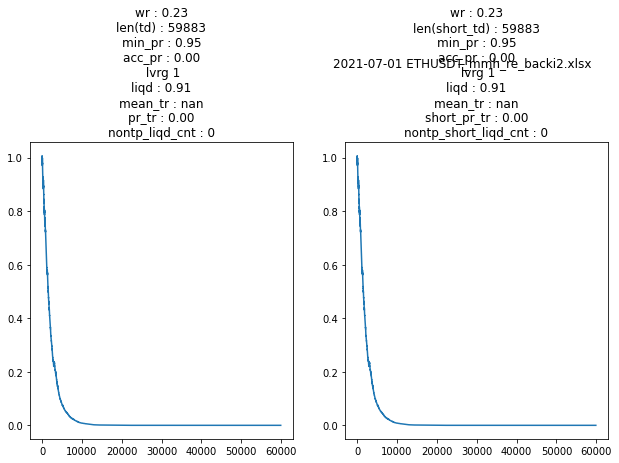

In [4]:
fee = 0.0004

lvrg = 5
lvrg = 1

show_log = 0

basic_st_number = 5 # 5 : 30m

# ------- ep set ------- #
static_ep = 1
# entry_type = 'limit'
entry_type = 'market'

ep_gap = 0.5  # st_gap is critera # 지정한 line (middle) 부터 st_gap 적용
# ep_gap = 0  # st_gap is critera #

ep_out_gap = 0.5 # ep ~ out 사이의 gap, 이 안에 들 경우 진입하도록 (max_tr 을 위해 적용함) --> 필요없어질 것

# ------- out set ------- #
use_out = 1
static_out = 0

hl_out = 0

price_restoration = 0

retouch = 0 # out_line 에 대한 retouch 를 out 으로 한건지에 대한 여부
retouch_out_period = 500
second_out = 0 # 기존 out 과는 다른 second_out 사용 여부

out_gap = 0.25
# out_gap = 1
ep_protect_gap = out_gap * 0.25 # ep scheduling 을 위한 protect gap (체결 후 바로 out 을 방지하기 위함임)
ep_protect_gap = out_gap * 1 # max = out_gap

approval_st_gap = 1.5

second_out_gap = 0.5 # static_out 을 위한 gap

# ------- tp set ------- #
non_tp = 1 # without tp set

exit_type = 'limit'
# exit_type = 'market'
static_tp = 1

tp_gap = 0.25  # st_gap is critera
tp_gap = 1.5  # st_gap is critera

p_qty_divider = 1.5

# ------- lvrg set ------- #

static_lvrg = 1
target_pct = 0.05
# target_pct = 0.01
# target_pct = 0.005
# target_pct = 0.001

# hl_lookback = 10


# ------- inversion set ------- #
inversion = 0

if inversion:
  short_entry = [1, 2]
  long_entry = [-1, -2]
else:
  short_entry = [-1, -2]
  long_entry = [1, 2]

  
tp_out_ratio = 0.7

fdist_thresh = 1

# ----------------- indicator ----------------- #
# ------- shift_size ------- #
cloud_shift_size = 1
sma_shift_size = 1
close_shift_size = 1


# ------- lb ------- #
# cloud_lookback = 30
cloud_lookback = 69
# cloud_lookback = 150
# cloud_lookback = 10

sma_lookback = 100
# sma_lookback = 100

sar_lookback = 5


# ------- indi. params ------- #
sma = 'sma1'

# sma_period = 250
sma_period = 100

fisher_upper = 1.5
fisher_lower = -1.5

stoch_upper = 67
stoch_lower = 33

cctbbo_upper = 80
cctbbo_lower = 20

senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

for key, res_df in res_df_dict.items():

  print(key, "loaded !")
  # print("res_df.columns :", res_df.columns)  
  # print(res_df.tail(100))
  # print("res_df.index[0] :", res_df.index[0])
  # # print("intmin(res_df.index[0]) :", intmin(res_df.index[0]))
  # break

  # if 'eth'.upper() in key:
  #   pass
  # else:
  #   continue

  # break

  # --------------- outest middle --------------- #
  # res_df['max_upper2'] = np.max(res_df[["ST1_Up2", "ST2_Up2", "ST3_Up2"]], axis=1)
  # res_df['min_lower2'] = np.min(res_df[["ST1_Down2", "ST2_Down2", "ST3_Down2"]], axis=1)


  
  # --------------- st ep --------------- #    
  # short_ep = res_df['middle_line%s' % basic_st_number] + ep_gap * res_df['st_gap%s' % basic_st_number]
  # long_ep = res_df['middle_line%s' % basic_st_number] - ep_gap * res_df['st_gap%s' % basic_st_number]

  # short_ep = res_df['min_upper%s' % basic_st_number] + ep_gap * res_df['st_gap%s' % basic_st_number]
  # long_ep = res_df['max_lower%s' % basic_st_number] - ep_gap * res_df['st_gap%s' % basic_st_number]


  # --------------- st rolling ep --------------- #    

  # short_ep = res_df['lower_middle%s' % basic_st_number]
  # long_ep = res_df['upper_middle%s' % basic_st_number]




  for senkou_a, senkou_b in zip(senkoua_list, senkoub_list): 
  # for tp_gap in np.arange(2.5, 4, 0.2): 
  # for out_gap in np.arange(0.25, 1., 0.05):
  # for cloud_lookback in np.arange(5, 100, 3):

    print("out_gap :", out_gap)
    # print("tp_gap :", tp_gap)

    # print("sma4_period :", sma4_period)
    # print("cloud_lookback :", cloud_lookback)

    # -------------------- additional indicators -------------------- #    
    
    #           ichimoku            #
    # res_df['senkou_a1'], res_df['senkou_b1'] = ichimoku(res_df)
    
    # # second_df['senkou_a'], second_df['senkou_b'] = ichimoku(second_df)
    # # res_df = res_df.join( pd.DataFrame(index=res_df.index, data=to_lower_tf(res_df, second_df, [-2, -1]), columns=['senkou_a2', 'senkou_b2']))

    # # #           cloud displacement           #
    # cloud_cnt = 0
    # for col_n in res_df.columns:
    #   if 'senkou' in col_n:
    #     cloud_cnt += 1
    # print("cloud_cnt :", cloud_cnt)

    # res_df.iloc[:, -cloud_cnt:] = res_df.iloc[:, -cloud_cnt:].shift(26 - 1)

    # senkou_a, senkou_b = 'senkou_a1', 'senkou_b1'
    
    # cloud_top = np.max(res_df[[senkou_a, senkou_b]], axis=1)
    # cloud_bottom = np.min(res_df[[senkou_a, senkou_b]], axis=1)

    # under_top = res_df['close'].shift(cloud_shift_size) <= cloud_top.shift(cloud_shift_size)
    # over_top = res_df['close'].shift(cloud_shift_size) >= cloud_top.shift(cloud_shift_size)

    # over_bottom = res_df['close'].shift(cloud_shift_size) >= cloud_bottom.shift(cloud_shift_size)
    # under_bottom = res_df['close'].shift(cloud_shift_size) >= cloud_bottom.shift(cloud_shift_size)

    
    # --------------- sma --------------- #    
    # res_df['sma1'] = res_df['close'].rolling(sma_period).mean()  

    # --------------- ema --------------- #   
    res_df['ema1'] = ema(res_df['close'], 5).shift(1)

    # --------------- cloud bline --------------- #   
    res_df['cloud_bline'] = cloud_bline(res_df, 26).shift(1)

    
    # #       stochastic      #
    # df['stoch'] = stoch(df, 5, 3, 3)

    # #       fisher      #
    # df['fisher30'] = fisher(df, 30)
    # df['fisher60'] = fisher(df, 60)
    # df['fisher120'] = fisher(df, 120)

    # #       cctbbo      #
    # df['cctbbo'], _ = cct_bbo(df, 21, 13)


    # --------------- stoch modification --------------- #    
    # res_df['stoch'] = stoch(res_df)

    # res_df['ema_roc'] = ema_roc(res_df['close'], 13, 9)

    # # print(res_df['sma5'].tail())

    # ------------------------------ htf data ------------------------------ #    

    # fourth_df = pd.read_excel(date_path4 + key.replace("_4h1d_backi2", ""), index_col=0)
    # fifth_df = pd.read_excel(date_path5 + key.replace("_multipline_backi2", ""), index_col=0)

    # --------------- htf sma --------------- #    
    # if "sma4" in res_df.columns:
    #   res_df.drop("sma4", axis=1, inplace=True)

    # fourth_df['sma'] = fourth_df['close'].rolling(sma4_period).mean()
    # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf(res_df, fourth_df, [-1]), columns=['sma4']))

    # --------------- htf ema --------------- #    
    # fifth_df['ema'] = ema(fifth_df['close'], 5)
    # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf(res_df, fifth_df, [-1]), columns=['ema5']))

    
    
    # ---------------------------------------- short = -1 ---------------------------------------- #

    # --------------- timestamp entry --------------- #    
    # entry = np.where((intmin(res_df.index) in [0, 30])
    #                       , -1, 0) 

    # # --------------- ema_roc entry --------------- #
    # entry = np.where((res_df['ema_roc'].shift(1) >= 0) & 
    #                       (res_df['ema_roc'] < 0)
    #                       , -1, 0) 
    

    # --------------- st entry --------------- #
    # entry = np.where((res_df['close'].shift(1) <= short_ep) & 
    #                       (res_df['high'] >= short_ep)
    #                       , -1, 0) 
    # # entry = np.where((res_df['high'].shift(1) <= upper_middle) & 
    # # entry = np.where((res_df['high'].shift(1) <= res_df['middle_line']) & 
    # #                     (res_df['high'] >= short_ep)
    # #                     , -1, 0) 
    
    # entry = np.where((res_df['close'].shift(1) > short_ep)
    #                   , -2, entry) 
    

    # --------------- st rolling entry --------------- #
    
    # entry = np.where((res_df['close'].shift(1) >= short_ep) & 
    #                 # (long_ep <= res_df['high']) & 
    #                 (res_df['close'] < short_ep)
    #                 , -1, 0)          
    
    # --------------- ema rolling entry --------------- #
    entry = np.where((res_df['close'].shift(1) >= res_df['ema1']) & 
                    # (long_ep <= res_df['high']) & 
                    (res_df['close'] < res_df['ema1'])
                    , -1, 0)       
    
    # --------------- mmh_st rolling ep --------------- #    
    # entry = np.where((res_df['close'].shift(1) >= res_df['mmh_st2'].shift(1)) & 
    #                 # (long_ep <= res_df['high']) & 
    #                 (res_df['close'] < res_df['mmh_st2']) &
    #                 # (res_df['norm_st_trend'] == 1)
    #                 (res_df['norm_st_trend'] == -1)
    #                 , -1, 0)

    # print("len(entry[entry==-1]) :", len(entry[entry==-1]))
    # break    




    # ---------------------------------------- long = 1 ---------------------------------------- #
    
    # --------------- timestamp entry --------------- #    
    # entry = np.where((np.array(intmin(res_df.index)) in [0, 30])
    
    # int_min_ts = np.array(list(map(lambda x :intmin(x), res_df.index)))
    # # entry = np.where((intmin(res_df.index) == 0)
    # entry = np.where((int_min_ts == 0) | (int_min_ts == 30)
    #                       , 1, 0)

    # print("int_min_ts :", int_min_ts)
    # print("entry :", entry)
    # break

    
    # --------------- ema_roc entry --------------- #
    # entry = np.where((res_df['ema_roc'].shift(1) <= 0) & 
    #                       (res_df['ema_roc'] > 0)
    #                       , 1, entry)     
    
    # --------------- st entry --------------- #    
    # entry = np.where((res_df['close'].shift(1) >= long_ep) & 
    #                   (res_df['low'] <= long_ep)
    #                   , 1, entry) 
    # # entry = np.where((res_df['low'].shift(1) >= lower_middle) & 
    # # entry = np.where((res_df['low'].shift(1) >= res_df['middle_line']) & 
    # #                   (res_df['low'] <= long_ep)
    # #                   , 1, entry) 

    # entry = np.where((res_df['close'].shift(1) < long_ep)
    #                   , 2, entry) 
      
    # entry = np.where((res_df['close'].shift(1) <= long_ep) & 
    #                   # (long_ep <= res_df['high']) & 
    #                   (res_df['close'] >= long_ep)
    #                   , 1, entry) 

    
    # --------------- st rolling entry --------------- #    
    # entry = np.where((res_df['close'].shift(1) <= long_ep) & 
    #                   # (long_ep <= res_df['high']) & 
    #                   (res_df['close'] > long_ep)
    #                   , 1, entry) 

    # --------------- ema rolling entry --------------- #
    entry = np.where((res_df['close'].shift(1) <= res_df['ema1']) & 
                      (res_df['close'] > res_df['ema1'])
                      , 1, entry)      

    
    # --------------- mmh_st rolling ep --------------- #    
    # entry = np.where((res_df['close'].shift(1) <= res_df['mmh_st2'].shift(1)) & 
    #                 # (long_ep <= res_df['high']) & 
    #                 (res_df['close'] > res_df['mmh_st2']) &
    #                 # (res_df['norm_st_trend'] == -1)
    #                 (res_df['norm_st_trend'] == 1)
    #                 , 1, entry) 



    #       1-2. tp line = middle line 조금 이내         #    

    # --------------- st limit tp & out --------------- #

      # --------------- ema rolling out --------------- #    
    
    short_out = res_df['ema1']
    long_out = res_df['ema1']
    

      # --------------- mmh_st rolling out --------------- #    

    # short_out = res_df['mmh_st1']
    # long_out = res_df['mmh_st1']

      # --------------- st rolling out --------------- #     

    # short_out = res_df['lower_middle%s' % basic_st_number]
    # long_out = res_df['upper_middle%s' % basic_st_number]

    # short_out = res_df['upper_middle%s' % basic_st_number]
    # long_out = res_df['lower_middle%s' % basic_st_number]

    # short_out = short_ep + res_df['st_gap%s' % basic_st_number] * out_gap
    # long_out = long_ep - res_df['st_gap%s' % basic_st_number] * out_gap
    
    # short_out2 = res_df['lower_middle]
    # long_out2 = res_df['upper_middle]
    
    # short_out = short_ep + res_df['st_gap']
    # long_out = long_ep - res_df['st_gap']
    

    
    # --------------- mmh_st tp --------------- #    

    # short_tp = res_df['close'] - tp_gap * abs(res_df['mmh_st1'] - res_df['close'])
    # long_tp = res_df['close'] + tp_gap * abs(res_df['mmh_st1'] - res_df['close'])

    # short_tp2 = res_df['close'] - tp_gap / 2 * abs(res_df['mmh_st1'] - res_df['close'])
    # long_tp2 = res_df['close'] + tp_gap / 2 * abs(res_df['mmh_st1'] - res_df['close'])

    # --------------- st rolling tp --------------- #    

    # short_tp = res_df['min_lower%s' % basic_st_number]
    # long_tp = res_df['max_upper%s' % basic_st_number]    

    # short_tp = short_ep - res_df['st_gap%s' % basic_st_number] * tp_gap
    # long_tp = long_ep + res_df['st_gap%s' % basic_st_number] * tp_gap




    # --------------- set partial tp --------------- #

    # short_tps = [short_tp]
    # long_tps = [long_tp]

    # short_tps = [short_tp2]
    # long_tps = [long_tp2]

    # short_tps = [short_tp2, short_tp] # org
    # long_tps = [long_tp2, long_tp]
    
    # short_tps = [short_tp, short_tp2]
    # long_tps = [long_tp, long_tp2]



    #       trading : 여기도 체결 결과에 대해 묘사함       #
    trade_list = []
    h_trade_list = []
    lvrg_list = []
    open_list = []

    tp_ratio_list = []
    short_tp_ratio_list = []
    long_tp_ratio_list = []

    liqd_list = []
    short_liqd_list = []
    long_liqd_list = []

    nontp_liqd_list = []
    nontp_short_liqd_list = []
    nontp_long_liqd_list = []

    nontp_pr_list = []
    nontp_short_pr_list = []
    nontp_long_pr_list = []

    nontp_short_indexs = []
    nontp_long_indexs = []

    nontp_short_ep_list = []
    nontp_long_ep_list = []

    pr_list = []
    long_list = []
    short_list = []

    h_pr_list = []
    h_long_list = []
    h_short_list = []

    ep_tp_list = []
    h_ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):        

      if entry[i] in short_entry: 

        initial_i = i

        if static_out:
          p_i = initial_i
        else:
          p_i = i


        # -------------- ep scheduling -------------- #
        # if  (res_df['close'].iloc[i] <= lower_middle.iloc[i]):
        # if abs(res_df['close'].iloc[i] - short_ep.iloc[i]) < ep_protect_gap * res_df['st_gap'].iloc[i]:
        # if res_df['close'].iloc[i] > short_ep.iloc[i] + ep_protect_gap * 3 * res_df['st_gap'].iloc[i]:
        # if abs((res_df['close'].iloc[i] - upper_middle.iloc[i]) / upper_middle.iloc[i]) < ep_protect_gap:
        # if abs((res_df['close'].iloc[i] - res_df['middle_line'].iloc[i]) / res_df['middle_line'].iloc[i]) < ep_protect_gap:

        # if res_df['close'].shift(1).iloc[i] <= short_out.iloc[p_i] - ep_protect_gap * res_df['st_gap%s' % basic_st_number].iloc[p_i]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- distance protection -------------- #
        # tp_dist = (res_df['close'].iloc[i] - short_tp.iloc[i])
        # out_dist = (res_df['middle_line'].iloc[i] - res_df['close'].iloc[i])
        # if tp_dist / out_dist >= tp_out_ratio:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- htf data const. -------------- #
        # i_min = intmin(res_df.index[i]) # 2020-09-05 00:00:59.999000
        # if i_min >= 30:
        #   htf_ts = str(res_df.index[i])[:-12] + "59:59.999000"
        # else:
        #   htf_ts = str(res_df.index[i])[:-12] + "29:59.999000"
          
        #   # -------------- ema -------------- #
        # if fifth_df['close'].shift(1).loc[htf_ts] < fifth_df['ema'].shift(1).loc[htf_ts]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue         
        


        # -------------- fisher const. -------------- #
        # if res_df['fisher30'].shift(1).iloc[i] < 0:
        # if res_df['fisher60'].shift(1).iloc[i] < 0:
        # if res_df['fisher120'].shift(1).iloc[i] < 0:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- ma const. -------------- #
        # ------- ema const. ------- #
        # if res_df['close'].shift(0).iloc[i] < res_df['ema5'].shift(0).iloc[i]: # and \
        # if res_df['close'].shift(1).iloc[i] < res_df['ema5'].shift(1).iloc[i]: # and \
        # if res_df['close'].shift(1).iloc[i] < res_df['ema5'].shift(0).iloc[i]: # and \
        # if short_ep.iloc[i] < res_df['ema5'].shift(0).iloc[i]: # and \
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # ------- sma const. ------- #
        # # if res_df['close'].iloc[i] < res_df[sma].iloc[i]: # and \
        # if res_df['close'].shift(1).iloc[i] < res_df['sma1'].shift(1).iloc[i]: # and \
        # #   short_ep.iloc[i] <= res_df['sma1'].shift(sma_shift_size).iloc[i]:
        # # # under_sma = short_ep <= res_df['sma'].shift(sma_shift_size)
        # # # if np.sum(under_sma.iloc[i + 1 - sma_lookback:i + 1]) == sma_lookback:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- htf st line const. -------------- #
          # ------------ 30m ------------ #
        # if res_df['lower_middle5'].iloc[i] >= res_df['min_upper2'].iloc[i]:
        #     pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

          # ------------ 4h ------------ #
        # if res_df['lower_middle6'].iloc[i] >= res_df['min_upper2'].iloc[i]:
        #     pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- 1d sma const. -------------- #
        # if res_df[sma].iloc[i] >= res_df['close'].iloc[i]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- cloud lb const.-------------- #   
        # if i < cloud_lookback:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # if np.sum(under_top.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        # # if np.sum(under_bottom.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        # # if np.sum(over_top.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        # # if np.sum(under_top.iloc[i - cloud_lookback:i]) == cloud_lookback:
        #   pass

        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- cloud color const.-------------- #
        #               1. senkou_a1 < senkou_b1            #
        #               1-1. mutli clouds color 충분히 고려               #        
        # if i < cloud_lookback:        
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # if np.sum(res_df[senkou_a].shift(cloud_shift_size).iloc[i + 1 - cloud_lookback:i + 1] <= res_df[senkou_b].shift(cloud_shift_size).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   np.sum(res_df["senkou_a2"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] <= res_df["senkou_b2"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback: # and \
        #   # np.sum(res_df["senkou_a3"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] <= res_df["senkou_b3"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   # np.sum(res_df["senkou_a4"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] <= res_df["senkou_b4"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   # np.sum(res_df["senkou_a5"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] <= res_df["senkou_b5"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue



        # -------------- st color const.-------------- #
        # if np.sum(res_df[['ST1_Trend%s' % basic_st_number, 'ST2_Trend%s' % basic_st_number, 'ST3_Trend%s' % basic_st_number]].iloc[i]) <= -1:
        # # if np.sum(res_df[['ST1_Trend%s' % basic_st_number, 'ST2_Trend%s' % basic_st_number, 'ST3_Trend%s' % basic_st_number]].iloc[i]) <= -3:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- htf st color const.-------------- #
        # if np.sum(res_df[['major_ST1_Trend', 'major_ST2_Trend', 'major_ST3_Trend']].iloc[i]) <= -1:
        # # if np.sum(res_df[['major_ST1_Trend', 'major_ST2_Trend', 'major_ST3_Trend']].iloc[i]) <= -3:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- 3rd st const. : st should have 2, 3 or more -------------- #
        # if np.sum(res_df[['minor_ST2_Trend', 'minor_ST3_Trend']].iloc[i]) <= -2:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- st gap const.-------------- #
        # if abs(res_df['ST2_Up%s' % basic_st_number].iloc[i] - res_df['ST1_Up%s' % basic_st_number].iloc[i]) <= approval_st_gap * res_df['st_gap%s' % basic_st_number].iloc[i]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
        


        # -------------- sar const. -------------- #
        # if res_df['sar1'].iloc[i] > res_df['high'].iloc[i]:
        # # if res_df['sar2'].iloc[i] > res_df['high'].iloc[i] and res_df['sar3'].iloc[i] > res_df['high'].iloc[i]:
        # # if res_df['sar2'].iloc[i] > res_df['high'].iloc[i]: # and \
        # # if  res_df['sar3'].iloc[i] > res_df['high'].iloc[i]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        ep_j = initial_i # dynamic ep 를 위한 var.

        # -------------- limit waiting const. -------------- #

        # entry_done = False
        # prev_sar = None
        # # for e_j in range(i, len(res_df)):
        # for e_j in range(i + 1, len(res_df)): # entry signal이 close 기준 일 경우
      
        #   if not static_ep:
        #     ep_j = e_j

        #   #             Todo            #
        #   #             1. ep 설정 

        #   # -------------- np.inf ep -------------- #
        #   # if short_ep.iloc[initial_i] == np.inf:
        #   #   break

        #   #             1-1. close 가 sar_change 이전 sar 을 cross 한 경우만 진입

        #   # -------------- ep scheduling -------------- #
        #   # if res_df['close'].shift(1).iloc[e_j] <= short_out.iloc[ep_j] - ep_protect_gap * res_df['st_gap%s' % basic_st_number].iloc[ep_j]:
        #   #   pass
        #   # else:
        #   #   continue

        #   #             1-0. ep touch, entry_done       #
        #   # if res_df['high'].iloc[e_j] >= short_ep.iloc[initial_i] and res_df['close'].shift(1).iloc[e_j] <= short_ep.iloc[initial_i]:
        #   # if res_df['high'].iloc[e_j] >= short_ep.iloc[initial_i] and res_df['close'].shift(1).iloc[e_j] >= short_out.iloc[initial_i] - res_df['st_gap'].iloc[initial_i] * ep_out_gap: # good tr
        #   # if res_df['high'].iloc[e_j] >= short_ep.iloc[initial_i] and res_df['close'].shift(1).iloc[e_j] <= short_out.iloc[initial_i] - res_df['st_gap'].iloc[initial_i] * ep_out_gap: # --> 이게 의도한거자나
        #   if res_df['high'].iloc[e_j] >= short_ep.iloc[ep_j]:
        #     entry_done = True
        #     # print("res_df['high'].iloc[e_j] :", res_df['high'].iloc[e_j])
        #     # print("e_j :", e_j)

        #     #     이미, e_j open 이 ep 보다 높은 경우, entry[ep_j] => -2 로 변경   #
        #     if res_df['open'].iloc[e_j] >= short_ep.iloc[ep_j]:
        #       entry[initial_i] = -2

        #     break

        #   #             2. limit 대기 시간 설정
        #   #             2-1. tp 조건이 성립되는 경우 limit 취소
        #   # -------------- st tp -------------- #
        #   if res_df['low'].iloc[e_j] <= short_tp.iloc[initial_i]: # 일단 tp 는 static 만 활용하는 걸로
        #     break


        #   # -------------- period fishing -------------- #
        #   # if intmin(res_df.index[e_j]) in [29, 59]:
        #   #   break
          
        #   # -------------- sar pbline -------------- #
        #   # if res_df['low'].iloc[e_j] <= short_tp.iloc[initial_i]:          
        #   #   break

        #   #             2-2. out 조건이 성립되는 경우 limit 취소   
        #   # -------------- st out -------------- #
        #   if res_df['close'].iloc[e_j] > short_out.iloc[e_j]:
        #     break

        #   # -------------- roc out -------------- #
        #   # if entry[e_j] == 1:
        #   #   break
          

        #   # -------------- stoch -------------- #
        #   # if res_df['stoch'].iloc[e_j - 2] >= res_df['stoch'].iloc[e_j - 1] and \
        #   #   res_df['stoch'].iloc[e_j - 1] < res_df['stoch'].iloc[e_j] and \
        #   #   res_df['stoch'].iloc[e_j - 1] <= stoch_lower:
        #   #   break

        #   # -------------- sar out -------------- #
        #   # if res_df['close'].iloc[e_j] > res_df['middle_line'].iloc[e_j]:
        #   # if res_df['close'].iloc[e_j] > short_out.iloc[initial_i]:
        #   #   break
          
        #   # -------------- sar prevsar out -------------- #
        #   # if res_df['sar2_uptrend'].iloc[e_j] == 1:

        #   #   if prev_sar is None:
        #   #     prev_sar = res_df['sar2'].iloc[e_j - 1]
            
        #   #   if res_df['close'].iloc[e_j] > prev_sar:
        #   #     break

        #   # else:
        #   #   if res_df['close'].iloc[e_j] > res_df['sar2'].iloc[e_j]:
        #   #     break
            
        #   # if res_df['close'].iloc[e_j] > res_df['middle_line'].iloc[e_j]:
        #   # if res_df['close'].iloc[e_j] > short_out.iloc[initial_i]: # or \
        #   #   # res_df['sar2_uptrend'].iloc[e_j] == 1: # or \

        #   # # if res_df['close'].iloc[e_j] > res_df['sar2'].iloc[e_j]:
        #   #   break

        # i = e_j
        # # print("i = e_j :", i)

        # if entry_done:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # ----------------- end wait ----------------- #

        # if e_j - initial_i >= 200:
        #   print("e_j, initial_i :", e_j, initial_i)
        # print("e_j - initial_i :", e_j - initial_i)
        # print()

        open_list.append(initial_i)
        
        if entry_type is 'market':
          try:
            ep_list = [res_df['close'].iloc[e_j]]
          except Exception as e:
            # print('error in ep_list (initial) :', e)
            ep_list = [res_df['close'].iloc[ep_j]]
        else:          
          if entry[initial_i] == -1:
            ep_list = [short_ep.iloc[ep_j]]
          else:
            #   e_j 가 있는 경우, 
            try:
              ep_list = [res_df['open'].iloc[e_j]]
            except Exception as e:
              ep_list = [res_df['open'].iloc[ep_j]]

        if not static_lvrg:
          # lvrg = target_pct / (res_df['high'].rolling(hl_lookback).max().iloc[initial_i] / res_df['close'].iloc[initial_i] - 1)

          if entry_type is 'market':
            # lvrg = target_pct / (short_out.iloc[ep_j] / res_df['close'].iloc[ep_j] - 1 - fee)
            lvrg = target_pct / abs(res_df['close'].iloc[ep_j] / short_out.iloc[ep_j] - 1 - fee)
          else:
            lvrg = target_pct / (short_out.iloc[ep_j] / short_ep.iloc[ep_j] - 1 - fee)
          lvrg = int(min(50, lvrg))
          lvrg = max(lvrg, 1)
          lvrg_list.append(lvrg)

        try:
          ep_idx_list = [e_j]
        except Exception as e:
          # print('error in ep_idx_list :', e)        
          ep_idx_list = [ep_j]

        tp_list = []
        tp_idx_list = []

        partial_tp_cnt = 0
        hedge_cnt = 1

        h_ep, h_tp = None, None
        h_i, h_j = None, None
        
        trade_done = False
        out = False
        out_retouch = False
        
        for j in range(i + 1, len(res_df)):
        # for j in range(i, len(res_df)):
          
          if static_tp:
            tp_j = initial_i
          else:
            tp_j = j

          if static_out:
            out_j = initial_i
          else:
            out_j = j


          # -------------- sub ep -------------- #
          # if res_df['high'].iloc[j - 1] <= res_df['sar2'].iloc[j - 1] and res_df['high'].iloc[j] > res_df['sar2'].iloc[j]:
            
          #   sub_ep = res_df['sar2'].iloc[j - 1]

          #   if sub_ep < ep_list[-1]:
          #     ep_list.append(sub_ep)
          #     ep_idx_list.append(j)

          
          # -------------- hedge only once -------------- #
          #             일단, h_quantity 는 초기 진입과 동일하게 설정         #
          # if res_df['high'].iloc[j] >= res_df['minor_ST2_Up'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] >= res_df['minor_ST2_Up'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] >= res_df['minor_ST3_Up'].iloc[j] and hedge_cnt == 1:

          #   h_ep = res_df['close'].iloc[j]
          #   hedge_cnt -= 1
          #   h_i = j


          # -------------- ultimate limit tp -------------- #
          if not non_tp:

            #               1. by price line             #
            if exit_type != 'market':

              for s_i, short_tp_ in enumerate(short_tps):

                if res_df['low'].iloc[j] <= short_tp_.iloc[tp_j] and partial_tp_cnt == s_i: # we use static tp now
                # if res_df['low'].iloc[j] <= short_tp_.iloc[j]:
                # if res_df['low'].iloc[j] <= short_tp_.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

                  if s_i == len(short_tps) - 1:
                    trade_done = True
                  
                  partial_tp_cnt += 1

                  #         dynamic tp        #
                  # if 0:
                  if short_tp_.iloc[j] != short_tp_.iloc[j - 1] and not static_tp:

                    #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                    # if res_df['open'].iloc[j] < short_tp_.iloc[initial_i]:
                    if res_df['open'].iloc[j] < short_tp_.iloc[j]:

                      # tp = short_tp_.iloc[initial_i]
                      tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("d-short_open")

                    #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                    else:

                      # tp = short_tp_.iloc[initial_i]
                      tp = short_tp_.iloc[j]
                      # tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("d-short_tp")

                  #         static tp         #
                  else:
                    
                    #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                    #   non_inversion 의 경우, short_tp 가 가능함   #              

                    # if res_df['open'].iloc[j] < short_tp_.iloc[initial_i]:
                    if res_df['open'].iloc[j] < short_tp_.iloc[tp_j]:

                      # tp = short_tp_.iloc[initial_i]
                      tp = short_tp_.iloc[tp_j]

                      # tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("s-short_tp")

                    #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                    else:

                      # tp = short_tp_.iloc[initial_i]
                      tp = short_tp_.iloc[tp_j]

                      # tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("s-short_tp")   

                  tp_list.append(tp)     
                  tp_idx_list.append(j)

            #           2. by signal        #
            else:

              # -------------- sar tp -------------- #
              # if (res_df['high'].iloc[j] >= res_df['sar2'].iloc[j]) & \
              #   (res_df['high'].iloc[j - 1] < res_df['sar2'].iloc[j - 1]) & \
              #   (res_df['high'].iloc[j - 2] < res_df['sar2'].iloc[j - 2]):

              #       inversion     #
              # if (res_df['low'].iloc[j] <= res_df['sar2'].iloc[j]) & \
              #   (res_df['low'].iloc[j - 1] > res_df['sar2'].iloc[j - 1]) & \
              #   (res_df['low'].iloc[j - 2] > res_df['sar2'].iloc[j - 2]):
              
              # -------------- sar pb tp -------------- #
              if res_df['low'].iloc[j] <= short_tp.iloc[initial_i]:

              # -------------- st tp -------------- #
              # if res_df['close'].iloc[j] > res_df['middle_line'].iloc[j]:       

              # -------------- fisher tp -------------- #            
              # if entry[j] == 1:

              # -------------- timestamp tp -------------- #            
              # if intmin(res_df.index[j]) in [29, 59]:
                
                tp = res_df['close'].iloc[j]
                # tp = res_df['open'].iloc[j]
                trade_done = True

                if trade_done:
                  tp_state_list.append("short close tp")

                tp_list.append(tp) 
                tp_idx_list.append(j)

                  
          # -------------- out -------------- #
          if not trade_done and use_out and j != len(res_df) - 1:

            # -------------- macd -------------- #
            # if res_df['macd_hist3'].iloc[j] > 0:  #  macd out
            # if res_df['macd_hist3'].iloc[i] < 0 and res_df['macd_hist3'].iloc[j] > 0:

            # -------------- st retouch -------------- #
            # out = True 상태면 동일 tick 에서 retouch 를 조사할 거기 때문에, 먼저 검사함
            # 그리고, out 기준이 close 라 이게 맞음 
            # close 가 short_out 보다 올라가있는 상태일테니 low 를 조사하는게 맞음           
            # if out and res_df['low'].iloc[j] <= short_out.iloc[out_j]:
            #   out_retouch = True

            
             # ------- 일정시간 이상, dynamic_out 적용 ------ #
            try:
              if j - out_idx >= retouch_out_period:
                static_short_out = short_out.iloc[j]
            
            except Exception as e:
              pass

              # ------- static out ------ #
            try:
              if out and res_df['low'].iloc[j] <= static_short_out:
                out_retouch = True
            except Exception as e:
              pass

            
              # ------- retouch out ------ #
            # if out and res_df['low'].iloc[j] <= short_out2.iloc[out_j]:
            #   out_retouch = True


            # -------------- st -------------- #
            # if res_df['close'].iloc[j] > res_df['middle_line'].iloc[j]:    
            # if res_df['close'].iloc[j] > res_df['minor_ST3_Up'].iloc[j]:
            # if res_df['close'].iloc[j] > upper_middle.iloc[j]:
            # if res_df['close'].iloc[j] > res_df['minor_ST1_Up'].iloc[j]:
            if out == 0:              
              if hl_out:
                if res_df['high'].iloc[j] >= short_out.iloc[out_j]: # check out only once
                  out = True

              else:
                if res_df['close'].iloc[j] >= short_out.iloc[out_j]: # check out only once
                  out = True

              # out_idx = j
              # static_short_out = short_out.iloc[out_j]
              # if second_out:              
                # static_short_out = short_out.iloc[out_j] + res_df['st_gap'].iloc[out_j] * second_out_gap
            
            # if out == 0 and res_df['high'].iloc[j] >= short_out.iloc[out_j]: # check out only once
            #   out = True
              

            # -------------- sma -------------- #
            # if res_df['close'].iloc[j] > res_df[sma].iloc[j]:

            # -------------- sar -------------- #
            # if res_df['close'].iloc[j] > res_df['minor_ST3_Up'].iloc[j] \
            #   or res_df['sar2'].iloc[j] <= res_df['high'].iloc[j]:
            # if res_df['close'].iloc[j] > short_out.iloc[initial_i]: # or \
            #   out = True
              # res_df['sar2_uptrend'].iloc[j] == 1: # or \

            # if res_df['sar2_uptrend'].iloc[j] == 1:

            #   if prev_sar is None:
            #     prev_sar = res_df['sar2'].iloc[j - 1]
              
            #   if res_df['close'].iloc[j] > prev_sar:
            #     out = True

            # else:
            #   if res_df['close'].iloc[j] > res_df['sar2'].iloc[j]:
            #     out = True
              
            # -------------- hl -------------- #
            # if res_df['close'].iloc[j] > short_out.iloc[tp_j]:
            
            # -------------- stoch -------------- #
            # if res_df['stoch'].iloc[j - 2] >= res_df['stoch'].iloc[j - 1] and \
            #   res_df['stoch'].iloc[j - 1] < res_df['stoch'].iloc[j] and \
            #   res_df['stoch'].iloc[j - 1] <= stoch_lower:
            #   out = True

            # retouch true 경우, out_retouch 조건도 있어야함
            if out:
              if retouch:
                if out_retouch:
                  pass
                else:
                    continue

              else:
                pass

              if price_restoration:
                tp = short_out.iloc[out_j]
                if second_out:
                  tp = short_out2.iloc[out_j]
                
                # if res_df['close'].iloc[j] > tp: # 이 경우를 protect 하는건 insane 임
                #   tp = res_df['close'].iloc[j]

              else:
                
                if not static_out:
                  if res_df['open'].iloc[j] >= short_out.iloc[out_j]: # close 기준이라 이런 조건을 못씀, 차라리 j 를 i 부터 시작
                    tp = res_df['open'].iloc[j]
                  else:
                    tp = res_df['close'].iloc[j]

                else:
                  tp = res_df['close'].iloc[j]

              
              if out_retouch: # out 과 open 비교
                if second_out:
                  if res_df['open'].iloc[j] <= short_out2.iloc[out_j]:
                    tp = res_df['open'].iloc[j]
                else:
                  if res_df['open'].iloc[j] <= short_out.iloc[out_j]:
                    tp = res_df['open'].iloc[j]

                try: # static_short_out 인 경우, open 도 고려한 tp set
                  if res_df['open'].iloc[j] <= static_short_out:
                    tp = res_df['open'].iloc[j]
                  else:
                    tp = static_short_out
                except Exception as e:
                  pass

              trade_done = True
              tp_state_list.append("short close_out")
            

              tp_list.append(tp) 
              tp_idx_list.append(j)


          # -------------- non tp -------------- #
          if j == len(res_df) - 1:
            trade_done = True
            tp = res_df['close'].iloc[j]
            tp_list.append(tp) 
            tp_idx_list.append(j)
          


          # -------------- append trade data -------------- #
          if trade_done:

            # --------------- tp_ratio info --------------- #
            #         Todo        #
            #          short_out 에 대한 정보는 존재함,
            #          short_tp 에 대한 정보는 존재함,
            #       => initial_i 기준으로 ,dynamic | static set 을 tp 와 out 에 각각 적용
            #          lvrg 는 initial_i 기준으로 적용되니까
            #          적용된 tp & out 으로 abs((tp - ep) / (ep - out)) 계산
            try:
              done_tp = short_tp.iloc[ep_j]
              done_out = short_out.iloc[ep_j]

              if done_out <= ep_list[0]: # loss > 1
                tp_ratio = np.nan
              else:
                tp_ratio = abs((ep_list[0] - done_tp) / (ep_list[0] - done_out))

            except Exception as e:
              # pass    
              tp_ratio = np.nan  
            
            tp_ratio_list.append(tp_ratio)
            short_tp_ratio_list.append(tp_ratio)      


            # -------------------- partial tp -------------------- #
            #        1. len(tp_list) 에 대응하는 qty_list 를 만들어야함    #
            #        2. temp_pr_list 를 만들어 총합 + 1 을 pr_list 에 저장      #
            #        2-1. temp_pr = sum((ep / tp_list[i] - fee - 1) * qty_list[i])   #
            #        3. temp_pr_list 의 첫 tp 에는 r_qty 를 할당함        #
            qty_list = []
            temp_pr_list = []
            r_qty = 1
            for q_i in range(len(tp_list) - 1, -1, -1):

              if len(tp_list) == 1:
                temp_qty = r_qty
              else:
                if q_i !=0:
                  temp_qty = r_qty / p_qty_divider
                else:
                  temp_qty = r_qty

              temp_pr = (ep_list[0] / tp_list[q_i] - fee - 1) * temp_qty * lvrg
              # temp_pr = (ep_list[0] / tp_list[q_i] - fee - 1) * temp_qty
              r_qty -= temp_qty

              temp_pr_list.append(temp_pr)
              qty_list.append(temp_qty)

            # if len(temp_pr_list) == 1:
            #   print("qty_list :", qty_list)
            #   print("temp_pr_list :", temp_pr_list)

            temp_pr = sum(temp_pr_list) + 1

            # -------------------- sub ep -> pr calc -------------------- #
            if len(ep_list) > 1:
            
              p_ep_pr = []
              for sub_ep_ in ep_list:
                sub_pr = (sub_ep_ / tp - fee - 1) * lvrg
                p_ep_pr.append(sub_pr)

              temp_pr = sum(p_ep_pr) + 1

              print("temp_pr :", temp_pr)

            # ------------ hedge + non_hedge pr summation ------------ #
            #         hedge pr direction is opposite to the origin       #
            hedge_pr = 1
            if hedge_cnt == 0:

              #       hedge tp      #
              h_tp = res_df['close'].iloc[j]
              hedge_pr = (h_tp / h_ep - fee - 1) * lvrg  # hedge long
              temp_pr += hedge_pr
              h_j = j

            
            hh = max(res_df['high'].iloc[i:j + 1])
            short_liq = (ep_list[0] / hh - fee - 1) * lvrg + 1

            if j != len(res_df) - 1:

              # ep_tp_list.append((ep, tp_list))  
              ep_tp_list.append((ep_list, tp_list))  
              # trade_list.append([initial_i, i, j])
              trade_list.append((ep_idx_list, tp_idx_list))

              liqd_list.append(short_liq)
              short_liqd_list.append(short_liq)

              h_ep_tp_list.append((h_ep, h_tp))      # hedge 도 ep_tp_list 처럼 변경해주어야하는데 아직 안건드림, 딱히 사용할 일이 없어보여   
              h_trade_list.append([initial_i, h_i, h_j])                

              pr_list.append(temp_pr)
              short_list.append(temp_pr)

              h_pr_list.append(hedge_pr)
              h_short_list.append(hedge_pr)

              i = j
              break

            else:

              # ep_tp_list.append((ep_list, tp_list))
              # trade_list.append((ep_idx_list, tp_idx_list))
              # plot_check 때문에, pr_list 까지 하게되면 acc_pr eval 이 꼬이게댐
          
              # pr_list 를 넣지 않을거니까, open_list 에서 해당 idx 는 pop
              open_list.pop()
              
              #         tp 미체결 survey        #
              nontp_liqd_list.append(short_liq)
              nontp_short_liqd_list.append(short_liq)
              nontp_short_indexs.append(i)
              nontp_short_ep_list.append(ep_list[0])

              nontp_short_pr = (ep_list[0] / tp - fee - 1) * lvrg + 1
              nontp_pr_list.append(nontp_short_pr)
              nontp_short_pr_list.append(nontp_short_pr)



      #                  long  phase                #
      elif entry[i] in long_entry: # inversion
      

        initial_i = i

        if static_out:
          p_i = initial_i
        else:
          p_i = i

        # -------------- ep scheduling -------------- #
        # # if res_df['close'].iloc[i] >= upper_middle.iloc[i]:
        # if abs(res_df['close'].iloc[i] - long_ep.iloc[i]) < ep_protect_gap * res_df['st_gap'].iloc[i]:
        # if res_df['close'].iloc[i] < long_ep.iloc[i]:
        # # if abs((res_df['close'].iloc[i] - lower_middle.iloc[i]) / lower_middle.iloc[i]) < ep_protect_gap:
        # # if abs((res_df['close'].iloc[i] - res_df['middle_line'].iloc[i]) / res_df['middle_line'].iloc[i]) < ep_protect_gap:
        
        # if res_df['close'].shift(1).iloc[i] >= long_out.iloc[p_i] + ep_protect_gap * res_df['st_gap%s' % basic_st_number].iloc[p_i]: # out 기준임을 주목
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- distance protection -------------- #
        # tp_dist = (long_tp.iloc[i] - res_df['close'].iloc[i])
        # out_dist = (res_df['close'].iloc[i] - res_df['middle_line'].iloc[i])
        # if tp_dist / out_dist >= tp_out_ratio:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
          
        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- htf data const. -------------- #
        # i_min = intmin(res_df.index[i]) # 2020-09-05 00:00:59.999000        
        # if i_min >= 30:
        #   htf_ts = str(res_df.index[i])[:-12] + "59:59.999000"
        # else:
        #   htf_ts = str(res_df.index[i])[:-12] + "29:59.999000"
          
        #   # -------------- ema -------------- #
        # if fifth_df['close'].shift(1).loc[htf_ts] > fifth_df['ema'].shift(1).loc[htf_ts]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue    
        
        # -------------- fisher const. -------------- #
        # # if res_df['fisher30'].shift(1).iloc[i] > 0:
        # # if res_df['fisher60'].shift(1).iloc[i] > 0:
        # if res_df['fisher120'].shift(1).iloc[i] > 0:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- ma const. -------------- #
        # ------- ema const. ------- #
        # if res_df['close'].shift(0).iloc[i] > res_df['ema5'].shift(0).iloc[i]: # and \
        # if res_df['close'].shift(1).iloc[i] > res_df['ema5'].shift(1).iloc[i]: # and \
        # if res_df['close'].shift(1).iloc[i] > res_df['ema5'].shift(0).iloc[i]: # and \
        # if long_ep.iloc[i] > res_df['ema5'].shift(0).iloc[i]: # and \
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # ------- sma const. ------- #
        # if res_df['close'].iloc[i] > res_df[sma].iloc[i]: # and \
        # if res_df['close'].shift(1).iloc[i] > res_df['sma1'].shift(1).iloc[i]: # and \
        # #   long_ep.iloc[i] >= res_df['sma1'].shift(sma_shift_size).iloc[i]:
        # # # upper_sma = long_ep >= res_df['sma'].shift(sma_shift_size)
        # # # if np.sum(upper_sma.iloc[i + 1 - sma_lookback:i + 1]) == sma_lookback:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

         # -------------- htf st line const. -------------- #
          # ------------ 30m ------------ #
        # if res_df['upper_middle5'].iloc[i] <= res_df['max_lower2'].iloc[i]:
        #     pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
          # ------------ 4h ------------ #
        # if res_df['upper_middle6'].iloc[i] <= res_df['max_lower2'].iloc[i]:
        #     pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- 1d sma const. -------------- #
        # if res_df[sma].iloc[i] <= res_df['close'].iloc[i]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- cloud const. -------------- #     
        # if i < cloud_lookback:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
        
        # # if np.sum(under_bottom.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        # # if np.sum(under_top.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        # if np.sum(over_bottom.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        # # if np.sum(over_top.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        #  pass

        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue  


        # -------------- cloud color const. -------------- #
        #               1. senkou_a1 >= senkou_b1            #
        #               1-1. mutli clouds color 충분히 고려               #
        # if i < cloud_lookback:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # if np.sum(res_df[senkou_a].shift(cloud_shift_size).iloc[i + 1 - cloud_lookback:i + 1] >= res_df[senkou_b].shift(cloud_shift_size).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   np.sum(res_df["senkou_a2"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] >= res_df["senkou_b2"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback: # and \
        #   # np.sum(res_df["senkou_a3"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] >= res_df["senkou_b3"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   # np.sum(res_df["senkou_a4"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] >= res_df["senkou_b4"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   # np.sum(res_df["senkou_a5"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] >= res_df["senkou_b5"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- st color const. -------------- #
        # if np.sum(res_df[['ST1_Trend%s' % basic_st_number, 'ST2_Trend%s' % basic_st_number, 'ST3_Trend%s' % basic_st_number]].iloc[i]) >= 1:
        # # if np.sum(res_df[['ST1_Trend%s' % basic_st_number, 'ST2_Trend%s' % basic_st_number, 'ST3_Trend%s' % basic_st_number]].iloc[i]) >= 3:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- htf st color const. -------------- #
        # if np.sum(res_df[['major_ST1_Trend', 'major_ST2_Trend', 'major_ST3_Trend']].iloc[i]) >= 1:
        # # if np.sum(res_df[['major_ST1_Trend', 'major_ST2_Trend', 'major_ST3_Trend']].iloc[i]) >= 3:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- 3rd st const. : st should have 2, 3 or more -------------- #
        # if np.sum(res_df[['minor_ST2_Trend', 'minor_ST3_Trend']].iloc[i]) >= 2:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

          # -------------- st gap const.-------------- #
        # if abs(res_df['ST2_Down%s' % basic_st_number].iloc[i] - res_df['ST1_Down%s' % basic_st_number].iloc[i]) <= approval_st_gap * res_df['st_gap%s' % basic_st_number].iloc[i]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- sar const. -------------- #
        # # if res_df['sar2'].iloc[i] < res_df['low'].iloc[i] and res_df['sar3'].iloc[i] < res_df['low'].iloc[i]:
        # if res_df['sar1'].iloc[i] < res_df['low'].iloc[i]:
        # # if res_df['sar2'].iloc[i] < res_df['low'].iloc[i]: # and \
        # # if  res_df['sar3'].iloc[i] < res_df['low'].iloc[i]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        
        ep_j = initial_i
      
        # -------------- limit waiting const. -------------- #      

        # entry_done = False
        # prev_sar = None
        # # for e_j in range(i, len(res_df)):
        # for e_j in range(i + 1, len(res_df)):
          
        #   if not static_ep:
        #     ep_j = e_j  

        #   #             Todo            #
        #   #             1. ep 설정
          
        #   # -------------- np.inf ep -------------- #
        #   # if long_ep.iloc[initial_i] == np.inf:
        #   #   break

        #   #             1-1. close 가 sar_change 이전 sar 을 cross 한 경우만 진입

        #   # -------------- ep scheduling -------------- #
        #   # if res_df['close'].shift(1).iloc[e_j] >= long_out.iloc[ep_j] + ep_protect_gap * res_df['st_gap%s' % basic_st_number].iloc[ep_j]:
        #   #   pass
        #   # else:
        #   #   continue
          
        #   # if res_df['low'].iloc[e_j] <= long_ep.iloc[initial_i] and res_df['close'].shift(1).iloc[e_j] >= long_ep.iloc[initial_i]:
        #   # if res_df['low'].iloc[e_j] <= long_ep.iloc[initial_i] and res_df['close'].shift(1).iloc[e_j] <= long_out.iloc[initial_i] + res_df['st_gap'].iloc[initial_i] * ep_out_gap:
        #   # if res_df['low'].iloc[e_j] <= long_ep.iloc[initial_i] and res_df['close'].shift(1).iloc[e_j] >= long_out.iloc[initial_i] + res_df['st_gap'].iloc[initial_i] * ep_out_gap:
        #   if res_df['low'].iloc[e_j] <= long_ep.iloc[ep_j]:
        #     entry_done = True
        #     # print("e_j :", e_j)
            
        #     #     이미, e_j open 이 ep 보다 낮은 경우, entry[initial_i] => -2 로 변경   #
        #     if res_df['open'].iloc[e_j] <= long_ep.iloc[ep_j]:
        #       entry[initial_i] = -2

        #     break

        #   #             2. limit 대기 시간 설정
        #   #             2-1. tp 하거나, out 조건이 성립되는 경우 limit 취소
        #   #             2-1-1. timestamp = 29 or 59
        #   # -------------- st tp -------------- #
        #   if res_df['high'].iloc[e_j] >= long_tp.iloc[initial_i]:
        #     break

        #   # -------------- period fishing -------------- #
        #   # if intmin(res_df.index[e_j]) in [29, 59]:
        #   #   break
          
        #   # -------------- sar pbline -------------- #
        #   # if res_df['high'].iloc[e_j] >= long_tp.iloc[initial_i]:
        #     # break

        #   #             2-2. out 조건이 성립되는 경우 limit 취소
        #   # -------------- st out -------------- #
        #   if res_df['close'].iloc[e_j] < long_out.iloc[e_j]:
        #     break
          
        #   # -------------- roc out -------------- #
        #   # if entry[e_j] == -1:
        #   #   break
              
        #   # -------------- stoch -------------- #
        #   # if res_df['stoch'].iloc[e_j - 2] <= res_df['stoch'].iloc[e_j - 1] and \
        #   #   res_df['stoch'].iloc[e_j - 1] > res_df['stoch'].iloc[e_j] and \
        #   #   res_df['stoch'].iloc[e_j - 1] >= stoch_upper:
        #   #   break

        #   # -------------- sar out -------------- #
        #   # if res_df['close'].iloc[e_j] < long_out.iloc[initial_i]: # or \
        #   #   break
          
        #   # -------------- sar prevsar out -------------- #

        #   # if res_df['sar2_uptrend'].iloc[e_j] == 0:

        #   #     if prev_sar is None:
        #   #       prev_sar = res_df['sar2'].iloc[e_j - 1]
              
        #   #     if res_df['close'].iloc[j] < prev_sar:
        #   #       break

        #   # else:
        #   #   if res_df['close'].iloc[e_j] < res_df['sar2'].iloc[e_j]:
        #   #     break

        # i = e_j
        # # print("i = e_j :", i)

        # if entry_done:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # ---------------- end wait ---------------- #
        # if e_j - initial_i >= 200:
        #   print("e_j, initial_i :", e_j, initial_i)

        open_list.append(initial_i)

        if entry_type is 'market':
          try:
            ep_list = [res_df['close'].iloc[e_j]]
          except Exception as e:
            # print('error in ep_list (initial) :', e)
            ep_list = [res_df['close'].iloc[ep_j]]
        else:
          if entry[initial_i] == 1:
            ep_list = [long_ep.iloc[ep_j]]
          else:
            try:
              ep_list = [res_df['open'].iloc[e_j]]
            except Exception as e:
              ep_list = [res_df['open'].iloc[ep_j]]

        if not static_lvrg:
          # lvrg = target_pct / (res_df['close'].iloc[initial_i] / res_df['low'].rolling(hl_lookback).min().iloc[initial_i] - 1)
          if entry_type is 'market':
            lvrg = target_pct / abs(long_out.iloc[ep_j] / res_df['close'].iloc[ep_j] - 1 - fee)
          else:
            lvrg = target_pct / (long_ep.iloc[ep_j] / long_out.iloc[ep_j] - 1 - fee)
          lvrg = int(min(50, lvrg))
          lvrg = max(1, lvrg)
          lvrg_list.append(lvrg)
          
        try:
          ep_idx_list = [e_j]
        except Exception as e:
          # print('error in ep_idx_list :', e)
          ep_idx_list = [ep_j]

        tp_list = []
        tp_idx_list = []

        partial_tp_cnt = 0
        hedge_cnt = 1

        h_ep, h_tp = None, None        
        h_i, h_j = None, None      

        trade_done = False
        out = False          
        out_retouch = False

        for j in range(i + 1, len(res_df)):     
        # for j in range(i, len(res_df)):     
          
          if static_tp:
            tp_j = initial_i
          else:
            tp_j = j   
          
          if static_out:
            out_j = initial_i
          else:
            out_j = j

          # -------------- hedge only once -------------- #
          #             일단, h_quantity 는 초기 진입과 동일하게 설정         #
          # if res_df['low'].iloc[j] <= res_df['minor_ST2_Down'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] <= res_df['minor_ST2_Down'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] <= res_df['minor_ST3_Down'].iloc[j] and hedge_cnt == 1:

          #   h_ep = res_df['close'].iloc[j]
          #   hedge_cnt -= 1
          #   h_i = j

          # -------------- sub ep -------------- #
          # if res_df['low'].iloc[j - 1] >= res_df['sar2'].iloc[j - 1] and res_df['low'].iloc[j] < res_df['sar2'].iloc[j]:
            
          #   sub_ep = res_df['sar2'].iloc[j - 1]

          #   if sub_ep > ep_list[-1]:
          #     ep_list.append(sub_ep)
          #     ep_idx_list.append(j)


          # -------------- ultimate tp -------------- #
          if not non_tp:
            #            1. by price line            #
            if exit_type != 'market':

              for l_i, long_tp_ in enumerate(long_tps):

                if res_df['high'].iloc[j] >= long_tp_.iloc[tp_j] and partial_tp_cnt == l_i:
                # if res_df['high'].iloc[j] >= long_tp.iloc[j]:

                  if l_i == len(long_tps) - 1:
                    trade_done = True

                  partial_tp_cnt += 1

                  #         dynamic tp        #
                  # if 0:
                  if long_tp_.iloc[j] != long_tp_.iloc[j - 1] and not static_tp:

                    #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                    # if res_df['open'].iloc[j] >= long_tp_.iloc[initial_i]:
                    if res_df['open'].iloc[j] >= long_tp_.iloc[j]:

                      # tp = long_tp_.iloc[initial_i]
                      tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("d-long_open")

                    
                    #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                    else:
                      
                      # tp = long_tp_.iloc[initial_i]
                      tp = long_tp_.iloc[j]
                      # tp = res_df['open'].iloc[j]
                      
                      if trade_done:
                        tp_state_list.append("d-long_tp")

                  #         static tp         #
                  else:

                    #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                    #   non_inversion 의 경우, short_tp 가 가능함   #

                    if res_df['open'].iloc[j] >= long_tp_.iloc[tp_j]:
                    # if res_df['open'].iloc[j] >= long_tp_.iloc[initial_i]:

                      # tp = long_tp_.iloc[initial_i]
                      tp = long_tp_.iloc[tp_j]

                      # tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("s-long_tp")

                    
                    #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                    else:
                      
                      # tp = long_tp_.iloc[initial_i]
                      tp = long_tp_.iloc[tp_j]

                      # tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("s-long_tp")         
                  
                  tp_list.append(tp)
                  tp_idx_list.append(j)

            #           2. by signal        #
            else:

              # -------------- sar tp -------------- #
              # if (res_df['low'].iloc[j] <= res_df['sar2'].iloc[j]) & \
              #   (res_df['low'].iloc[j - 1] > res_df['sar2'].iloc[j - 1]) & \
              #   (res_df['low'].iloc[j - 2] > res_df['sar2'].iloc[j - 2]):
              
              #       inversion     #
              # if (res_df['high'].iloc[j] >= res_df['sar2'].iloc[j]) & \
              #   (res_df['high'].iloc[j - 1] < res_df['sar2'].iloc[j - 1]) & \
              #   (res_df['high'].iloc[j - 2] < res_df['sar2'].iloc[j - 2]):

              # -------------- sar pb tp -------------- #
              if res_df['high'].iloc[j] >= long_tp.iloc[initial_i]:

              # -------------- st tp -------------- #
              # if res_df['close'].iloc[j] < res_df['middle_line'].iloc[j]:

              # -------------- fisher tp -------------- #
              # if entry[j] == -1:

              # -------------- timestamp tp -------------- #
              # if intmin(res_df.index[j]) in [29, 59]:
                
                tp = res_df['close'].iloc[j]
                # tp = res_df['open'].iloc[j]
                trade_done = True

                if trade_done:
                  tp_state_list.append("long close tp")

                tp_list.append(tp) 
                tp_idx_list.append(j)



          # -------------- out -------------- #
          if not trade_done and use_out and j != len(res_df) - 1:              

            # -------------- macd -------------- #
            # if res_df['macd_hist3'].iloc[j] < 0:
            # # if res_df['macd_hist3'].iloc[i] > 0 and res_df['macd_hist3'].iloc[j] < 0:

            # -------------- st retouch -------------- #
            # out = True 상태면 동일 tick 에서 retouch 를 조사할 거기 때문에, 먼저 검사함
            # 그리고, out 기준이 close 라 이게 맞음 
            # close 가 long_out 보다 내려가있는 상태일테니 high 를 조사하는게 맞음           
            # if out and res_df['high'].iloc[j] >= long_out.iloc[out_j]:
            #   out_retouch = True

            
            # ------- 일정시간 이상, dynamic_out 적용 ------ #
            try:
              if j - out_idx >= retouch_out_period:
                static_long_out = long_out.iloc[j]
            
            except Exception as e:
              pass

              # ------- static out ------ #
            try:
              if out and res_df['high'].iloc[j] >= static_long_out:
                out_retouch = True
            except Exception as e:
              pass

              # ------- retouch out ------ #
            # if out and res_df['high'].iloc[j] >= long_out2.iloc[out_j]:
            #   out_retouch = True



            # -------------- st -------------- #
            # if res_df['close'].iloc[j] < res_df['middle_line'].iloc[j]:
            # if res_df['close'].iloc[j] < res_df['minor_ST3_Down'].iloc[j]:
            # if res_df['close'].iloc[j] < lower_middle.iloc[j]:
            # if res_df['close'].iloc[j] < res_df['minor_ST1_Down'].iloc[j]:
            if out == 0:
              if hl_out:
                if res_df['low'].iloc[j] <= long_out.iloc[out_j]: # check out only once
                  out = True

              else:
                if res_df['close'].iloc[j] <= long_out.iloc[out_j]: # check out only once
                  out = True

              # out_idx = j
              # static_long_out = long_out.iloc[out_j]
              # if second_out:
              # static_long_out = long_out.iloc[out_j] - res_df['st_gap'].iloc[out_j] * second_out_gap

            # if out == 0 and res_df['low'].iloc[j] <= long_out.iloc[out_j]: # check out only once
            #   out = True
            


            # -------------- sma -------------- #
            # if res_df['close'].iloc[j] < res_df[sma].iloc[j]:

            # -------------- sar -------------- #
            # if res_df['close'].iloc[j] < res_df['minor_ST3_Down'].iloc[j] \
            #   or res_df['sar2'].iloc[j] >= res_df['low'].iloc[j]:
            # if res_df['close'].iloc[j] < long_out.iloc[initial_i]: # or \
            #   #  res_df['close'].iloc[j] < res_df['sar2'].iloc[j]:
            #   #  res_df['sar2_uptrend'].iloc[j] == 0 or \
            #   out = True
            
            # if res_df['sar2_uptrend'].iloc[j] == 0:

            #     if prev_sar is None:
            #       prev_sar = res_df['sar2'].iloc[j - 1]
                
            #     if res_df['close'].iloc[j] < prev_sar:
            #       out = True

            # else:
            #   if res_df['close'].iloc[j] < res_df['sar2'].iloc[j]:
            #     out = True

            # -------------- hl -------------- #
            # if res_df['close'].iloc[j] < long_out.iloc[tp_j]:

            # -------------- stoch -------------- #
            # if res_df['stoch'].iloc[j - 2] <= res_df['stoch'].iloc[j - 1] and \
            #   res_df['stoch'].iloc[j - 1] > res_df['stoch'].iloc[j] and \
            #   res_df['stoch'].iloc[j - 1] >= stoch_upper:
            #   out = True

            # retouch true 경우, out_retouch 조건도 있어야함
            if out:
              if retouch:
                if out_retouch:
                  pass
                else:
                    continue

              else:
                pass

              if price_restoration:
                tp = long_out.iloc[out_j]
                if second_out:
                  tp = long_out2.iloc[out_j]

                # if res_df['close'].iloc[j] < tp: # 이 경우를 protect 하는건 insane 임
                # # if res_df['high'].iloc[j] < tp: # --> hl_out 사용시 이 조건은 valid 함
                #   tp = res_df['close'].iloc[j]

              else:

                if not static_out:
                  if res_df['open'].iloc[j] <= long_out.iloc[out_j]: # close 기준이라 이런 조건을 못씀, 차라리 j 를 i 부터 시작
                    tp = res_df['open'].iloc[j]
                  else:
                    tp = res_df['close'].iloc[j]

                else:
                  tp = res_df['close'].iloc[j]

              if out_retouch: # out 과 open 비교
                if second_out:  # long_out = sell
                # second_out 은 기본적으로 limit 이라 이 구조가 가능함
                  if res_df['open'].iloc[j] >= long_out2.iloc[out_j]: # dynamic_out 일 경우 고려해야함
                    tp = res_df['open'].iloc[j]
                else:
                  if res_df['open'].iloc[j] >= long_out.iloc[out_j]: # dynamic_out 일 경우 고려해야함
                    tp = res_df['open'].iloc[j]

                try:
                  if res_df['open'].iloc[j] >= static_long_out:
                    tp = res_df['open'].iloc[j]
                  else:
                    tp = static_long_out
                except Exception as e:
                  pass

              # tp = res_df['open'].iloc[j]
              tp_state_list.append("long close_out")
              trade_done = True

              tp_list.append(tp)
              tp_idx_list.append(j)

          
          # -------------- non tp -------------- #
          if j == len(res_df) - 1:
            trade_done = True
            tp = res_df['close'].iloc[j]
            tp_list.append(tp) 
            tp_idx_list.append(j)


          if trade_done:

            # --------------- tp_ratio info --------------- #
            try:
              done_tp = long_tp.iloc[ep_j]
              done_out = long_out.iloc[ep_j]

              if done_out >= ep_list[0]: # loss >= 1
                tp_ratio = np.nan
              else:
                tp_ratio = abs((ep_list[0] - done_tp) / (ep_list[0] - done_out))                

            except Exception as e:
              # pass 
              tp_ratio = np.nan
            
            tp_ratio_list.append(tp_ratio)
            long_tp_ratio_list.append(tp_ratio)


            qty_list = []
            temp_pr_list = []
            r_qty = 1
            for q_i in range(len(tp_list) - 1, -1, -1):

              if len(tp_list) == 1:
                temp_qty = r_qty
              else:
                if q_i !=0:
                  temp_qty = r_qty / p_qty_divider
                else:
                  temp_qty = r_qty

              # temp_pr = (tp_list[q_i] / ep_list[0] - fee - 1) * temp_qty
              temp_pr = (tp_list[q_i] / ep_list[0] - fee - 1) * temp_qty * lvrg
              r_qty -= temp_qty

              temp_pr_list.append(temp_pr)

            temp_pr = sum(temp_pr_list) + 1

            # -------------------- sub ep -> pr calc -------------------- #
            if len(ep_list) > 1:
            
              p_ep_pr = []
              for sub_ep_ in ep_list:
                sub_pr = (tp / sub_ep_ - fee - 1) * lvrg
                p_ep_pr.append(sub_pr)

              temp_pr = sum(p_ep_pr) + 1

              print("temp_pr :", temp_pr)

            # ------------ hedge + non_hedge pr summation ------------ #
            #         hedge pr direction is opposite to the origin       #
            hedge_pr = 1
            if hedge_cnt == 0:

              #       hedge tp      #
              h_tp = res_df['close'].iloc[j]
              hedge_pr = (h_ep / h_tp - fee - 1) * lvrg  # hedge short
              temp_pr += hedge_pr
              h_j = j


            ll = min(res_df['low'].iloc[i:j + 1])
            long_liq = (ll / ep_list[0] - fee - 1) * lvrg + 1

            if j != len(res_df) - 1:

              ep_tp_list.append((ep_list, tp_list))
              trade_list.append((ep_idx_list, tp_idx_list))

              liqd_list.append(long_liq)
              long_liqd_list.append(long_liq)

              h_ep_tp_list.append((h_ep, h_tp))        
              h_trade_list.append([initial_i, h_i, h_j])                

              pr_list.append(temp_pr)
              long_list.append(temp_pr)

              h_pr_list.append(hedge_pr)
              h_long_list.append(hedge_pr)                    

              i = j
              break
            
            else:

              # ep_tp_list.append((ep_list, tp_list))
              # trade_list.append((ep_idx_list, tp_idx_list))
              
              # pr_list 를 넣지 않을거니까, open_list 에서 해당 idx 는 pop
              open_list.pop()
          
              #         tp 미체결 survey        #
              nontp_liqd_list.append(long_liq)
              nontp_long_liqd_list.append(long_liq)
              nontp_long_indexs.append(i)
              nontp_long_ep_list.append(ep_list[0])
              
              nontp_long_pr = (tp / ep_list[0] - fee - 1) * lvrg + 1
              nontp_pr_list.append(nontp_long_pr)
              nontp_long_pr_list.append(nontp_long_pr)


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    try:
      plt.figure(figsize=(16, 12))
      plt.suptitle(key)

      np_pr = np.array(pr_list)
      # np_pr = (np.array(pr_list) - 1) * lvrg + 1

      total_pr = np.cumprod(np_pr)
      wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

      # mean_profit = np.mean(np_pr[np_pr > 1])
      # mean_loss = np.mean(np_pr[np_pr < 1])
      cumprod_profit = np.cumprod(np_pr[np_pr > 1])[-1]
      cumprod_loss = np.cumprod(np_pr[np_pr < 1])[-1]
      pr_tr = cumprod_profit * cumprod_loss

      np_tp_ratio_list = np.array(tp_ratio_list) # 초기에 tr 을 정하는거라 mean 사용하는게 맞음
      mean_tr = np.mean(np_tp_ratio_list[np.isnan(np_tp_ratio_list) == 0])

      # plt.subplot(121)
      plt.subplot(231)
      plt.plot(total_pr)
      if len(nontp_liqd_list) != 0:
        plt.title("wr : %.2f\nlen(td) : %s\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nmean_tr : %.2f\npr_tr : %.2f\nnontp_liqd_cnt : %s\nnontp_liqd : %.2f\nontp_liqd_pr : %.2f" 
                  % (wr, len(np_pr[np_pr != 1]), np.min(np_pr), total_pr[-1], lvrg, min(liqd_list), mean_tr, pr_tr, len(nontp_liqd_list), min(nontp_liqd_list), min(nontp_pr_list)))
      else:
        plt.title("wr : %.2f\nlen(td) : %s\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nmean_tr : %.2f\npr_tr : %.2f\nnontp_liqd_cnt : %s" 
                  % (wr, len(np_pr[np_pr != 1]), np.min(np_pr), total_pr[-1], lvrg, min(liqd_list), mean_tr, pr_tr, len(nontp_liqd_list)))
      # plt.show()

      print('supblot231 passed')

      #         short only      #
      np_short_pr = np.array(short_list)

      total_short_pr = np.cumprod(np_short_pr)
      short_wr = len(np_short_pr[np_short_pr > 1]) / len(np_short_pr[np_short_pr != 1])
      
      short_cumprod_profit = np.cumprod(np_short_pr[np_short_pr > 1])[-1]
      short_cumprod_loss = np.cumprod(np_short_pr[np_short_pr < 1])[-1]
      short_pr_tr = short_cumprod_profit * short_cumprod_loss

      np_short_tp_ratio_list = np.array(short_tp_ratio_list)
      mean_short_tr = np.mean(np_short_tp_ratio_list[np.isnan(np_short_tp_ratio_list) == 0])
      
      plt.subplot(232)
      plt.plot(total_short_pr)
      if len(nontp_short_liqd_list) != 0:   

        max_nontp_short_term = len(res_df) - nontp_short_indexs[0]
        
        plt.title("wr : %.2f\nlen(short_td) : %s\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nmean_tr : %.2f\nshort_pr_tr : %.2f\nnontp_short_liqd_cnt : %s\nnontp_short_liqd : %.2f\nontp_short_liqd_pr : %.2f\nmax_nontp_short_term : %s"  
                  % (short_wr, len(np_short_pr[np_short_pr != 1]), np.min(np_short_pr), total_short_pr[-1], lvrg, min(short_liqd_list), mean_short_tr, short_pr_tr, 
                     len(nontp_short_liqd_list), min(nontp_short_liqd_list), min(nontp_short_pr_list), max_nontp_short_term))
      else:
        plt.title("wr : %.2f\nlen(short_td) : %s\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nmean_tr : %.2f\nshort_pr_tr : %.2f\nnontp_short_liqd_cnt : %s"  
                  % (short_wr, len(np_short_pr[np_short_pr != 1]), np.min(np_short_pr), total_short_pr[-1], lvrg, min(short_liqd_list), mean_short_tr, short_pr_tr, len(nontp_short_liqd_list)))

      print('supblot232 passed')

      #         long only      #
      np_long_pr = np.array(long_list)
      # np_long_pr = (np.array(long_list) - 1) * lvrg + 1

      total_long_pr = np.cumprod(np_long_pr)
      long_wr = len(np_long_pr[np_long_pr > 1]) / len(np_long_pr[np_long_pr != 1])
      
      long_cumprod_profit = np.cumprod(np_long_pr[np_long_pr > 1])[-1]
      long_cumprod_loss = np.cumprod(np_long_pr[np_long_pr < 1])[-1]
      long_pr_tr = long_cumprod_profit * long_cumprod_loss

      np_long_tp_ratio_list = np.array(long_tp_ratio_list)
      mean_long_tr = np.mean(np_long_tp_ratio_list[np.isnan(np_long_tp_ratio_list) == 0])
      
      plt.subplot(233)
      plt.plot(total_long_pr)
      if len(nontp_long_liqd_list) != 0:

        max_nontp_long_term = len(res_df) - nontp_long_indexs[0]

        plt.title("wr : %.2f\nlen(long_td) : %s\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nmean_tr : %.2f\nlong_pr_tr : %.2f\nnontp_long_liqd_cnt : %s\nnontp_long_liqd : %.2f\nontp_long_liqd_pr : %.2f\nmax_nontp_long_term : %s"   
                  % (long_wr, len(np_long_pr[np_long_pr != 1]), np.min(np_long_pr), total_long_pr[-1], lvrg, min(long_liqd_list), mean_long_tr, long_pr_tr,  
                     len(nontp_long_liqd_list), min(nontp_long_liqd_list), min(nontp_long_pr_list), max_nontp_long_term))
      else:
        plt.title("wr : %.2f\nlen(long_td) : %s\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nmean_tr : %.2f\nlong_pr_tr : %.2f\nnontp_long_liqd_cnt : %s"   
                  % (long_wr, len(np_long_pr[np_long_pr != 1]), np.min(np_long_pr), total_long_pr[-1], lvrg, min(long_liqd_list), mean_long_tr, long_pr_tr,  len(nontp_long_liqd_list)))

      print('supblot233 passed')

      #     reversion adjustment      #
      # rev_np_pr = 1 / (np.array(pr_list) + fee) - fee
      rev_np_pr = (1 / ((np.array(pr_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
      # rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
          
      rev_total_pr = np.cumprod(rev_np_pr)
      rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

      # plt.subplot(122)
      plt.subplot(234)
      plt.plot(rev_total_pr)
      plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))

      #         short       #
      # rev_np_short_pr = 1 / (np.array(short_list) + fee) - fee
      rev_np_short_pr = (1 / ((np.array(short_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
      # rev_np_short_pr = (1 / (np.array(short_list) + fee) - fee - 1) * lvrg + 1
          
      rev_total_short_pr = np.cumprod(rev_np_short_pr)
      rev_short_wr = len(rev_np_short_pr[rev_np_short_pr > 1]) / len(rev_np_short_pr[rev_np_short_pr != 1])

      # plt.subplot(122)
      plt.subplot(235)
      plt.plot(rev_total_short_pr)
      plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_short_wr, np.min(rev_np_short_pr), rev_total_short_pr[-1], lvrg))

      #         long       #
      # rev_np_long_pr = 1 / (np.array(long_list) + fee) - fee
      rev_np_long_pr = (1 / ((np.array(long_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
          
      rev_total_long_pr = np.cumprod(rev_np_long_pr)
      rev_long_wr = len(rev_np_long_pr[rev_np_long_pr > 1]) / len(rev_np_long_pr[rev_np_long_pr != 1])

      # plt.subplot(122)
      plt.subplot(236)
      plt.plot(rev_total_long_pr)
      plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_long_wr, np.min(rev_np_long_pr), rev_total_long_pr[-1], lvrg))
      
      plt.show()

      h_np_pr = np.array(h_pr_list)
      # h_rev_np_pr = 1 / (np.array(h_pr_list) + fee) - fee    # define, for plot_check below cell
      h_rev_np_pr = (1 / ((np.array(h_pr_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1

      # --------------------- h pr plot --------------------- #
      if len(h_np_pr[h_np_pr != 1]) != 0:

        plt.figure(figsize=(16, 12))
        plt.suptitle(key + " hedge")

        h_total_pr = np.cumprod(h_np_pr)
        h_wr = len(h_np_pr[h_np_pr > 1]) / len(h_np_pr[h_np_pr != 1])

        # plt.subplot(121)
        plt.subplot(231)
        plt.plot(h_total_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_wr, np.min(h_np_pr), h_total_pr[-1], lvrg))
        # plt.show()

        #         short only      #
        h_np_short_pr = np.array(h_short_list)

        h_total_short_pr = np.cumprod(h_np_short_pr)
        h_short_wr = len(h_np_short_pr[h_np_short_pr > 1]) / len(h_np_short_pr[h_np_short_pr != 1])
        
        plt.subplot(232)
        plt.plot(h_total_short_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_short_wr, np.min(h_np_short_pr), h_total_short_pr[-1], lvrg))

        #         long only      #
        h_np_long_pr = np.array(h_long_list)

        h_total_long_pr = np.cumprod(h_np_long_pr)
        h_long_wr = len(h_np_long_pr[h_np_long_pr > 1]) / len(h_np_long_pr[h_np_long_pr != 1])
        
        plt.subplot(233)
        plt.plot(h_total_long_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_long_wr, np.min(h_np_long_pr), h_total_long_pr[-1], lvrg))


        #     reversion adjustment      #
            
        h_rev_total_pr = np.cumprod(h_rev_np_pr)
        h_rev_wr = len(h_rev_np_pr[h_rev_np_pr > 1]) / len(h_rev_np_pr[h_rev_np_pr != 1])

        # plt.subplot(122)
        plt.subplot(234)
        plt.plot(h_rev_total_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_rev_wr, np.min(h_rev_np_pr), h_rev_total_pr[-1], lvrg))

        #         short       #
        # h_rev_np_short_pr = 1 / (np.array(h_short_list) + fee) - fee
        h_rev_np_short_pr =  (1 / ((np.array(h_short_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
           
        h_rev_total_short_pr = np.cumprod(h_rev_np_short_pr)
        h_rev_short_wr = len(h_rev_np_short_pr[h_rev_np_short_pr > 1]) / len(h_rev_np_short_pr[h_rev_np_short_pr != 1])

        # plt.subplot(122)
        plt.subplot(235)
        plt.plot(h_rev_total_short_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_rev_short_wr, np.min(h_rev_np_short_pr), h_rev_total_short_pr[-1], lvrg))

        #         long       #
        # h_rev_np_long_pr = 1 / (np.array(h_long_list) + fee) - fee
        h_rev_np_long_pr =  (1 / ((np.array(h_long_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
            
        h_rev_total_long_pr = np.cumprod(h_rev_np_long_pr)
        h_rev_long_wr = len(h_rev_np_long_pr[h_rev_np_long_pr > 1]) / len(h_rev_np_long_pr[h_rev_np_long_pr != 1])

        # plt.subplot(122)
        plt.subplot(236)
        plt.plot(h_rev_total_long_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_rev_long_wr, np.min(h_rev_np_long_pr), h_rev_total_long_pr[-1], lvrg))
        
        plt.show()
          
    except Exception as e:
      print('error in pr plot :', e)   
    

    print()

    break # indi. loop
  break # pair loop

In [6]:
print(entry[entry==1])
print(long_list)

[1 1 1 ... 1 1 1]
[]


##### temp test bed

In [ ]:
# short_col_values = res_df[comp_target_lines].values - oc_max.values.reshape(-1, 1) # target_lines cols 중, 양수 중 최소 index 찾기
print(short_col_values.shape)
# short_candi_cols = np.argwhere(short_col_values > 0) # -> 여기서 얻고 싶은 건 조건에 해당되는 axis=1 의 col idx
# 1. 음수 value 를 모두 해당 axis=1 내의 최대값으로 변경하고, 
# 2. 변경된 value 내에서 최소값을 찾는다
# 3. broad cast issue 로, col 내에서 for loop 로 수정해야할 것

# short_col_max = np.max(short_col_values, axis=1)
# short_candi_cols = np.where(short_col_values < 0, short_col_max, short_col_values)

# for col_idx in range(short_col_values.shape[1]):
#   print("short_col_values[:, [col_idx]].shape :", short_col_values[:, [col_idx]].shape)
#   short_col_values[:, [col_idx]] = np.where(short_col_values[:, [col_idx]] < 0, short_col_max, short_col_values[:, [col_idx]])

short_col_values = res_df[comp_target_lines].values - oc_max.values.reshape(-1, 1) # target_lines cols 중, 양수 중 최소 index 찾기
short_ep = oc_max.copy()

copy_short_col_values = short_col_values.copy()
show_log = 1
for row_i in tqdm(range(len(short_col_values))):

  if show_log:
    print("short_col_values[row_i] :", short_col_values[row_i])
  copy_short_col_values[row_i] = np.where(short_col_values[row_i] < 0, np.inf, short_col_values[row_i])
  
  min_idx = np.argmin(copy_short_col_values[row_i])
  min_value = copy_short_col_values[row_i][min_idx]
  if show_log:
    print("copy_short_col_values[row_i] :", copy_short_col_values[row_i])
    print("min_value :", min_value)
    print()

  print("short_ep.iloc[row_i] :", short_ep.iloc[row_i])
  short_ep.iloc[row_i] = short_ep.iloc[row_i] + min_value
  print("short_ep.iloc[row_i] :", short_ep.iloc[row_i])
  print()

  break

(432000, 9)


  0%|          | 0/432000 [00:00<?, ?it/s]

short_col_values[row_i] : [ -8.19276289 -18.29741206  -3.77833901 -22.13875895  -0.47899232
 -16.20746905 -12.20011597 -10.19643943 -14.20379251]
copy_short_col_values[row_i] : [inf inf inf inf inf inf inf inf inf]
min_value : inf

short_ep.iloc[row_i] : 383.27
short_ep.iloc[row_i] : inf



In [ ]:
long_col_values = oc_min.values.reshape(-1, 1) - res_df[comp_target_lines].values # target_lines cols 중, 양수 중 최소 index 찾기
long_ep = oc_min.copy()

copy_long_col_values = long_col_values.copy()
for row_i in tqdm(range(len(long_col_values))):

  if show_log:
    print("long_col_values[row_i] :", long_col_values[row_i])
  copy_long_col_values[row_i] = np.where(long_col_values[row_i] < 0, np.inf, long_col_values[row_i])
  
  min_idx = np.argmin(copy_long_col_values[row_i])
  min_value = copy_long_col_values[row_i][min_idx]
  if show_log:
    print("copy_long_col_values[row_i] :", copy_long_col_values[row_i])
    print("min_value :", min_value)
    print()
  
  print("long_ep.iloc[row_i] :", long_ep.iloc[row_i])
  long_ep.iloc[row_i] = long_ep.iloc[row_i] - min_value
  print("long_ep.iloc[row_i] :", long_ep.iloc[row_i])
  break

  0%|          | 0/432000 [00:00<?, ?it/s]

long_col_values[row_i] : [ 2.56276289 12.66741206 -1.85166099 16.50875895 -5.15100768 10.57746905
  6.57011597  4.56643943  8.57379251]
copy_long_col_values[row_i] : [ 2.56276289 12.66741206         inf 16.50875895         inf 10.57746905
  6.57011597  4.56643943  8.57379251]
min_value : 2.562762892256103

long_ep.iloc[row_i] : 377.64
long_ep.iloc[row_i] : 375.0772371077439


### nontp survey

##### term & liqd

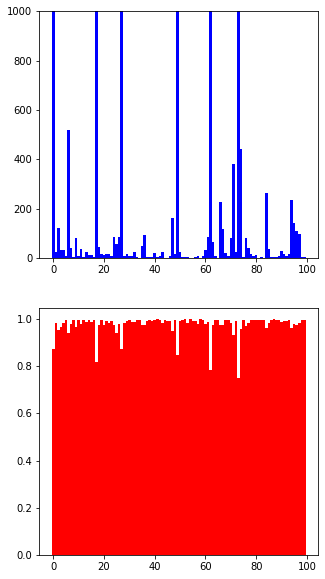

In [ ]:
# print(nontp_long_indexs)

plot_size = 100

for s_i in range(plot_size, len(trade_list), plot_size):

  slice_trade_list = trade_list[s_i - plot_size:s_i]
  slice_liqd_list = liqd_list[s_i - plot_size:s_i]

  # print(len(slice_trade_list))
  np_trade = np.array(slice_trade_list)
  trade_term = np_trade[:, [2]] - np_trade[:, [1]]

  plt.figure(figsize=(5, 10))
  plt.subplot(211)
  plt.bar(np.arange(len(trade_term)), trade_term.reshape(-1,), width=1, color='b')

  # plt.plot(trade_term.reshape(-1,))
  plt.ylim(0, 1000)
  # plt.show()
  # print()

  plt.subplot(212)
  # print(len(liqd_list))
  # plt.bar(np.arange(len(liqd_list)), liqd_list)
  plt.bar(np.arange(len(slice_liqd_list)), np.array(slice_liqd_list), width=1, color='r')
  # plt.plot(slice_liqd_list)
  plt.show()

print()

##### check nontp index

In [ ]:
# np_nontp_short_indexs = np.array(nontp_short_indexs)
# np_nontp_long_indexs = np.array(nontp_long_indexs)

# short_til_term = len(res_df) - np_nontp_short_indexs
# long_til_term = len(res_df) - np_nontp_long_indexs

max_nontp_short_term = len(res_df) - nontp_short_indexs[0]
max_nontp_long_term = len(res_df) - nontp_long_indexs[0]

print(max_nontp_long_term)

32747


# traded section plot

## plot with off-color st with dash

### sorted plot_check

In [8]:
res_df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'ST1_Up2', 'ST1_Down2', 'ST1_Trend2', 'ST2_Up2', 'ST2_Down2', 'ST2_Trend2', 'ST3_Up2', 'ST3_Down2', 'ST3_Trend2', 'min_upper2', 'max_lower2', 'middle_line2', 'upper_middle2', 'lower_middle2', 'st_gap2', 'ST1_Up5', 'ST1_Down5', 'ST1_Trend5', 'ST2_Up5', 'ST2_Down5', 'ST2_Trend5', 'ST3_Up5', 'ST3_Down5', 'ST3_Trend5', 'min_upper5', 'max_lower5', 'middle_line5', 'upper_middle5', 'lower_middle5', 'st_gap5', 'ST1_Up6', 'ST1_Down6', 'ST1_Trend6', 'ST2_Up6', 'ST2_Down6', 'ST2_Trend6', 'ST3_Up6', 'ST3_Down6', 'ST3_Trend6', 'min_upper6', 'max_lower6', 'middle_line6', 'upper_middle6', 'lower_middle6', 'st_gap6', 'ST1_Up7', 'ST1_Down7', 'ST1_Trend7', 'ST2_Up7', 'ST2_Down7', 'ST2_Trend7', 'ST3_Up7', 'ST3_Down7', 'ST3_Trend7', 'min_upper7', 'max_lower7', 'middle_line7', 'upper_middle7', 'lower_middle7', 'st_gap7', 'mmh_st1', 'mmh_st2', 'norm_st_up', 'norm_st_down', 'norm_st_trend', 'ema1', 'cloud_bline'], dtype='object')

error in h_plot_pr : name 'h_np_pr' is not defined
short real pr : [1.17333496]
long real pr : [0.8515811]


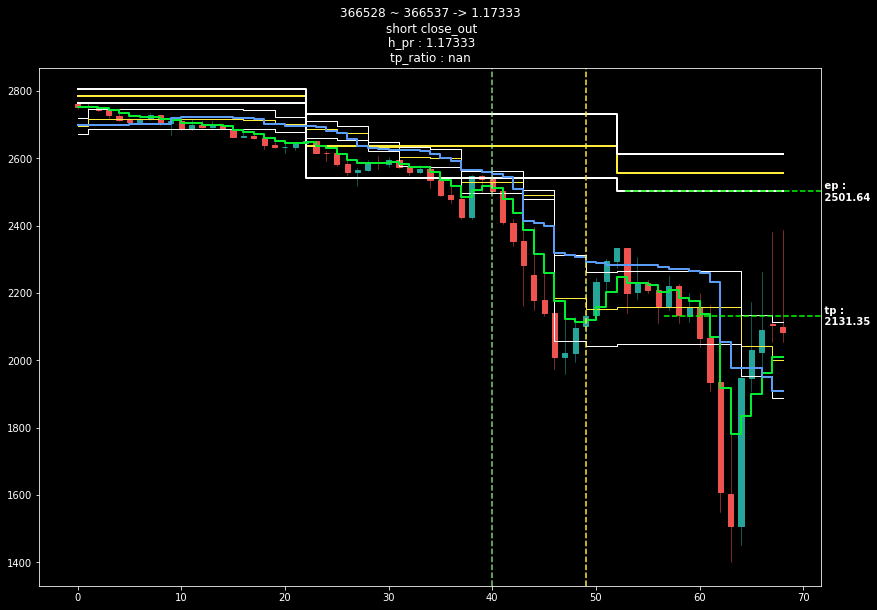


short real pr : [1.09620116]
long real pr : [0.91150858]


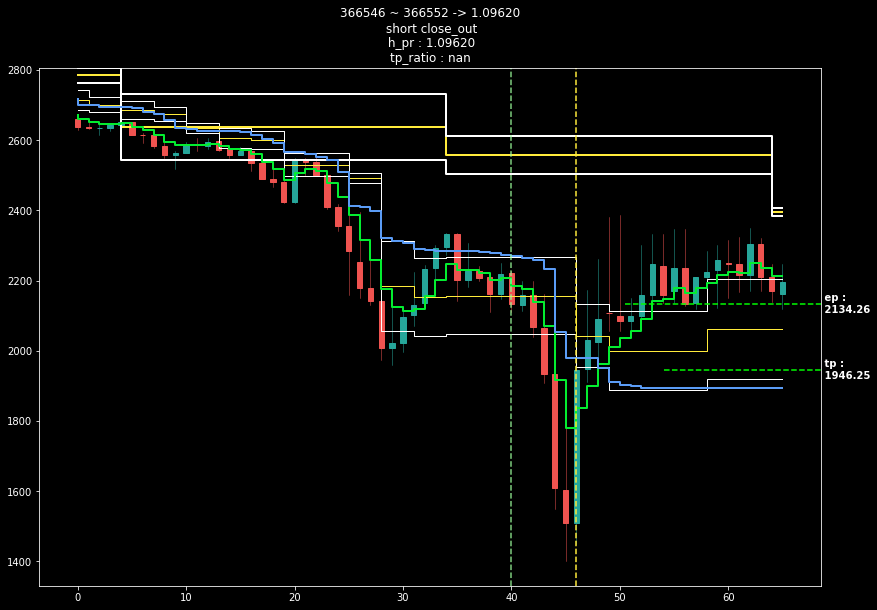


short real pr : [1.0780985]
long real pr : [0.92681501]


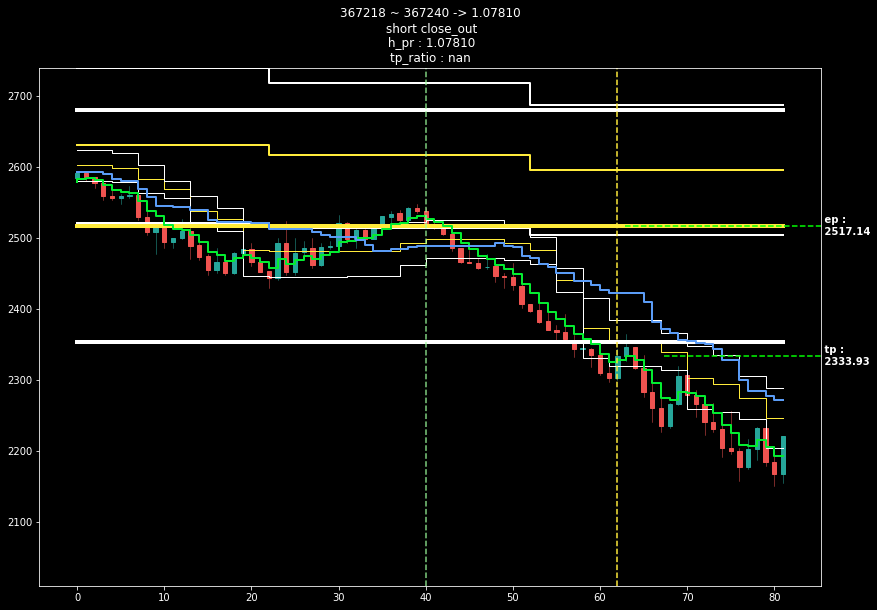


short real pr : [1.07113822]
long real pr : [0.93283783]


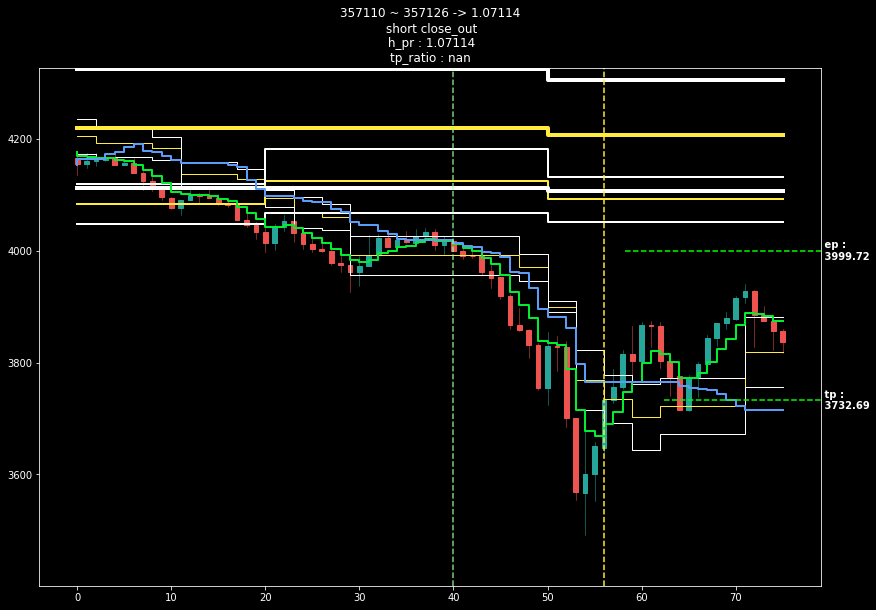


short real pr : [1.0706964]
long real pr : [0.93322278]


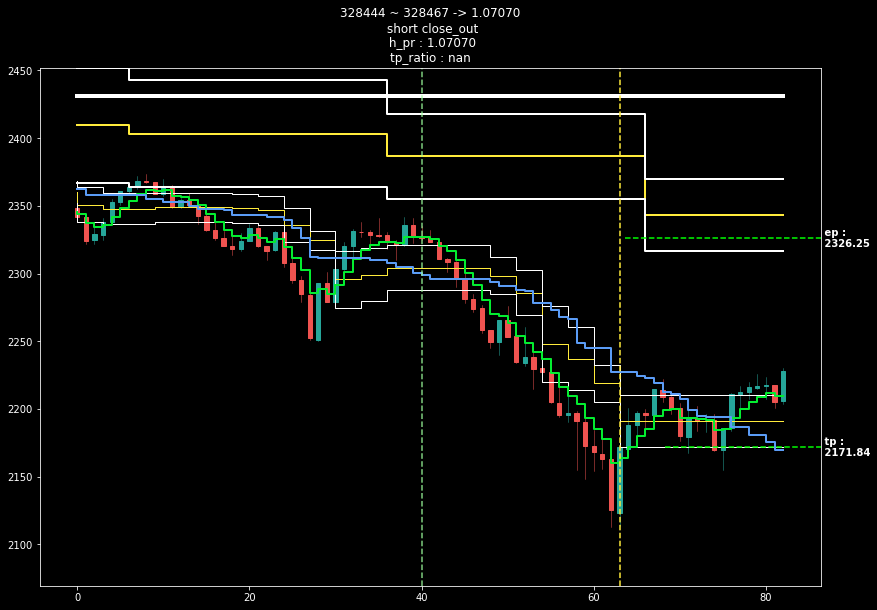


short real pr : [1.06941372]
long real pr : [0.93434217]


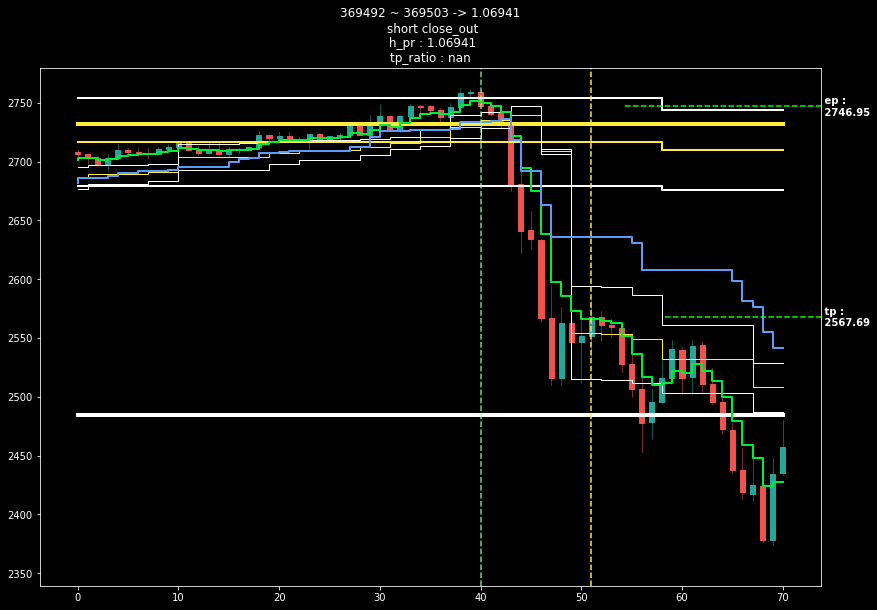


short real pr : [1.0602954]
long real pr : [0.94237773]


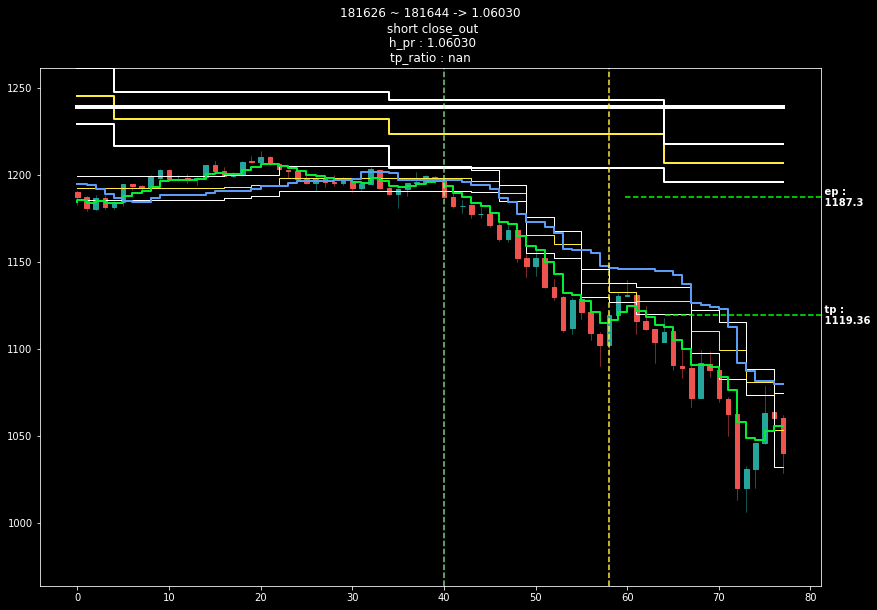


short real pr : [1.05960435]
long real pr : [0.94299236]


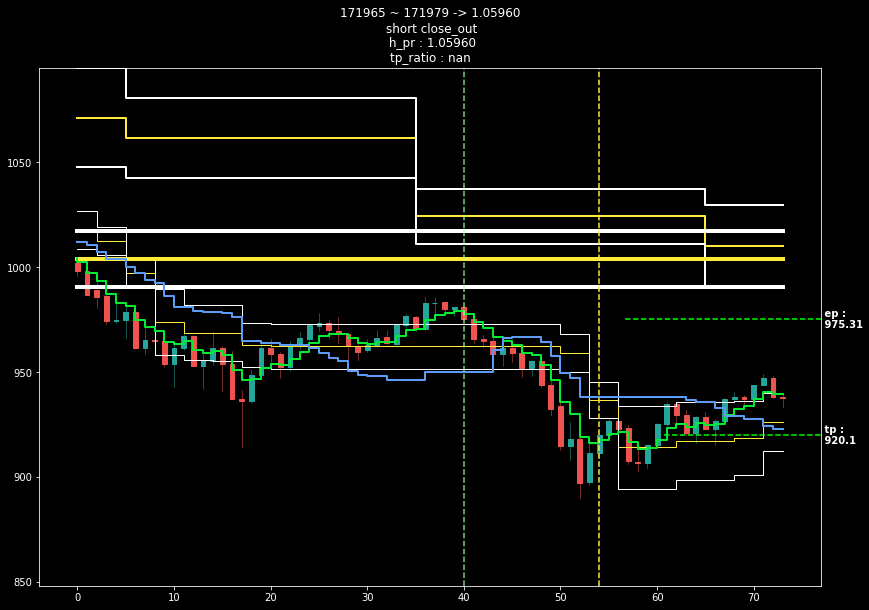


short real pr : [1.05794213]
long real pr : [0.94447403]


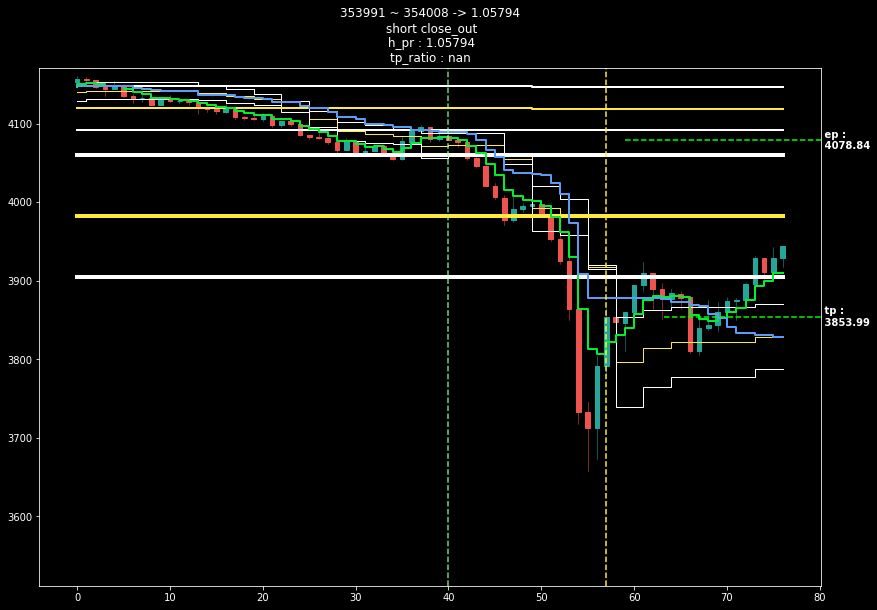


short real pr : [1.0551805]
long real pr : [0.94694604]


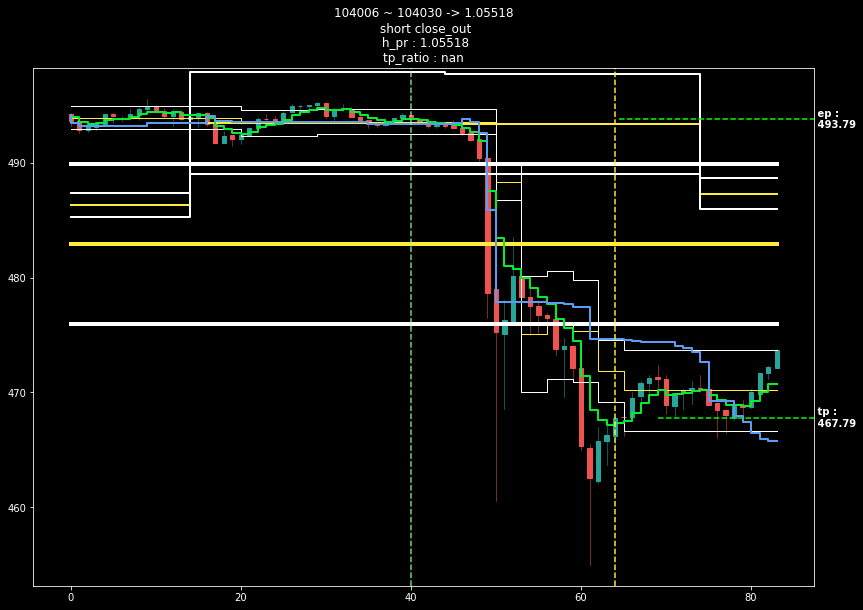


short real pr : [1.05274268]
long real pr : [0.94913895]


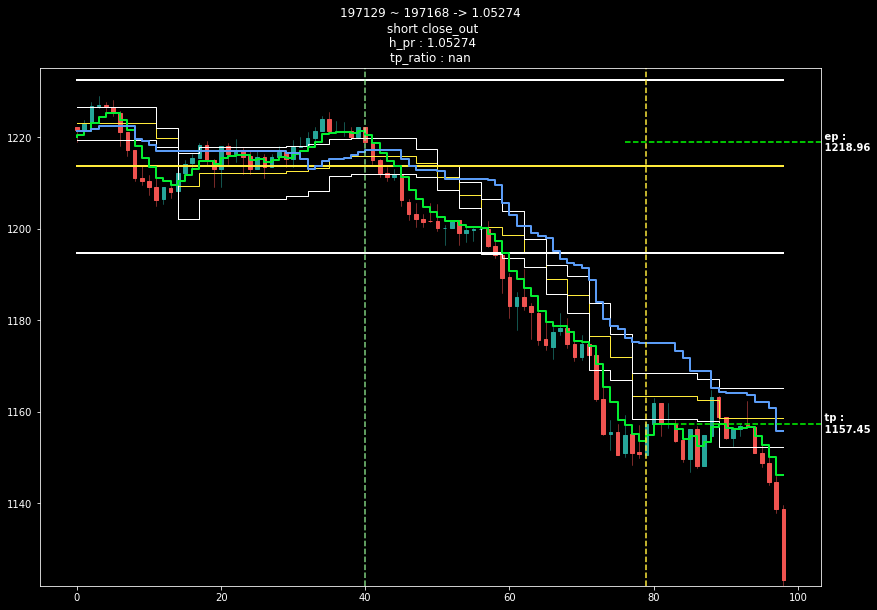


short real pr : [1.05206411]
long real pr : [0.94975116]


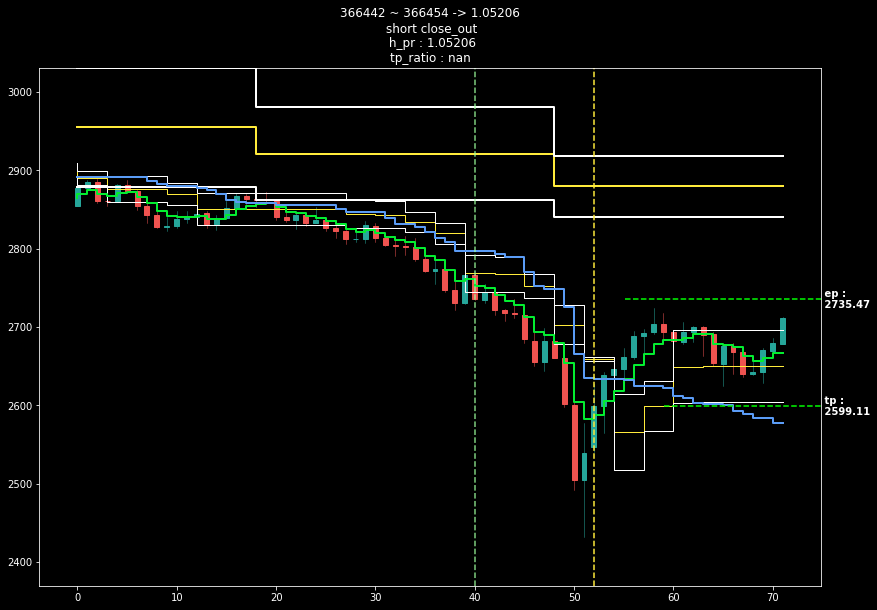


short real pr : [1.05189596]
long real pr : [0.94990299]


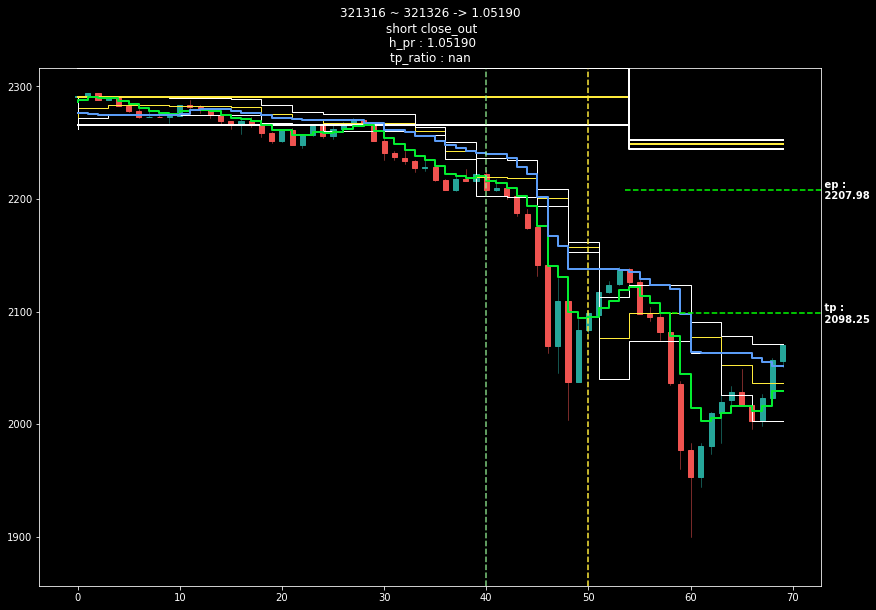


short real pr : [1.05003063]
long real pr : [0.95159051]


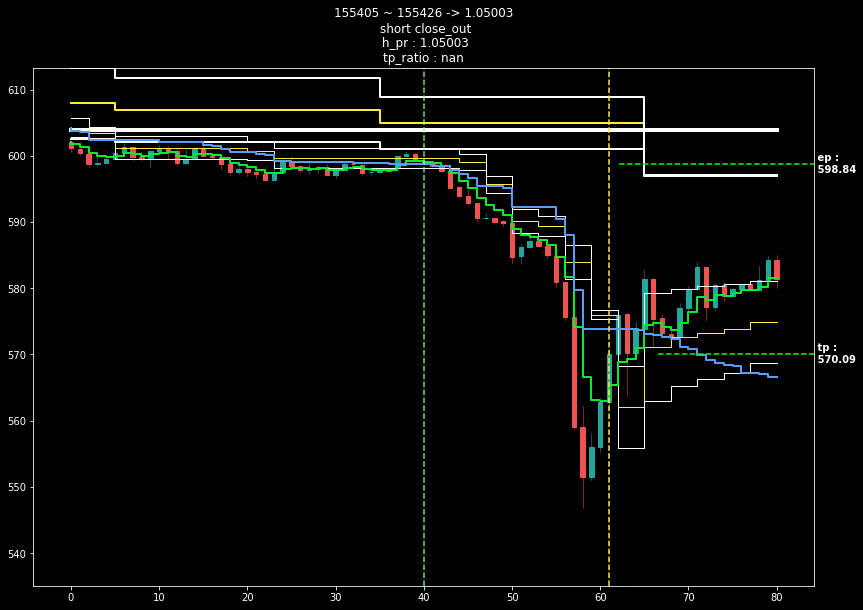


short real pr : [1.04972285]
long real pr : [0.95186953]


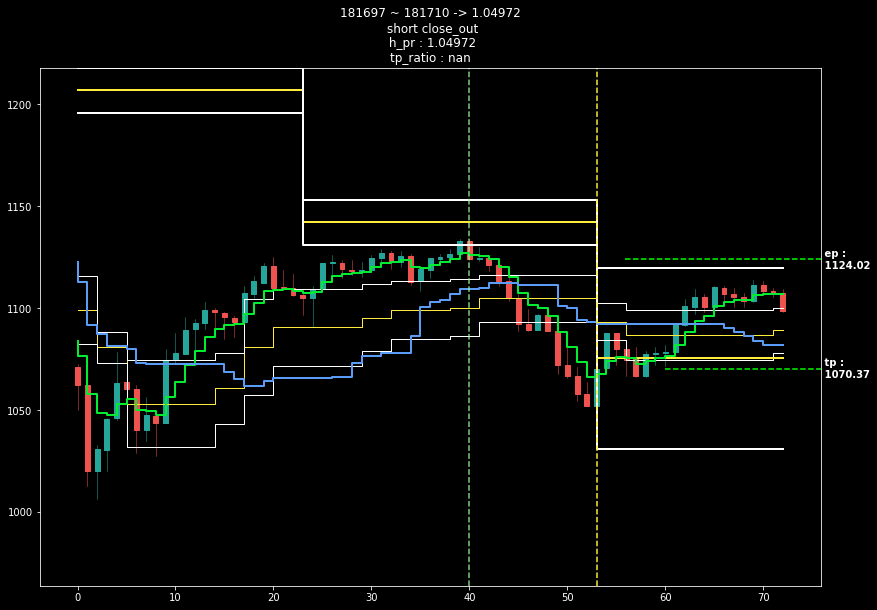


short real pr : [1.04919773]
long real pr : [0.95234596]


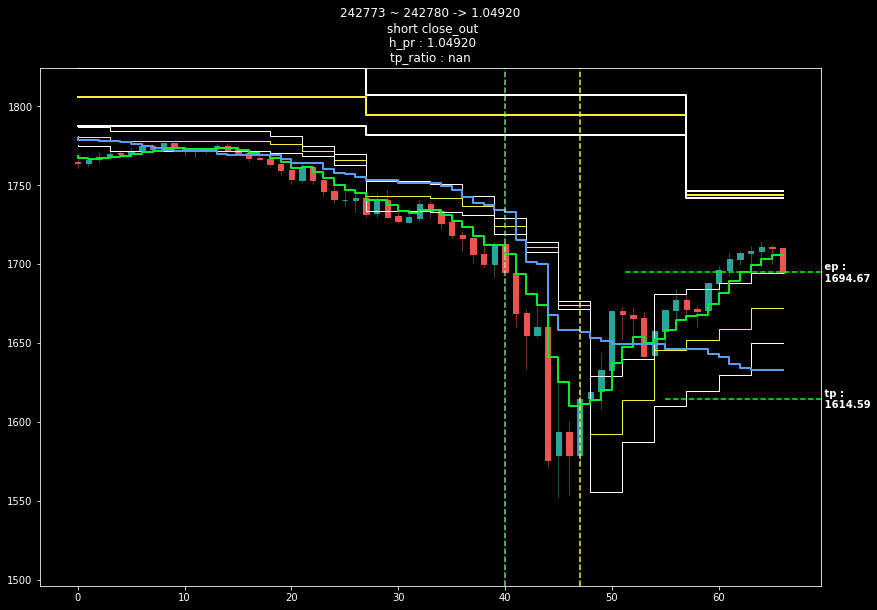


short real pr : [1.04860106]
long real pr : [0.95288789]


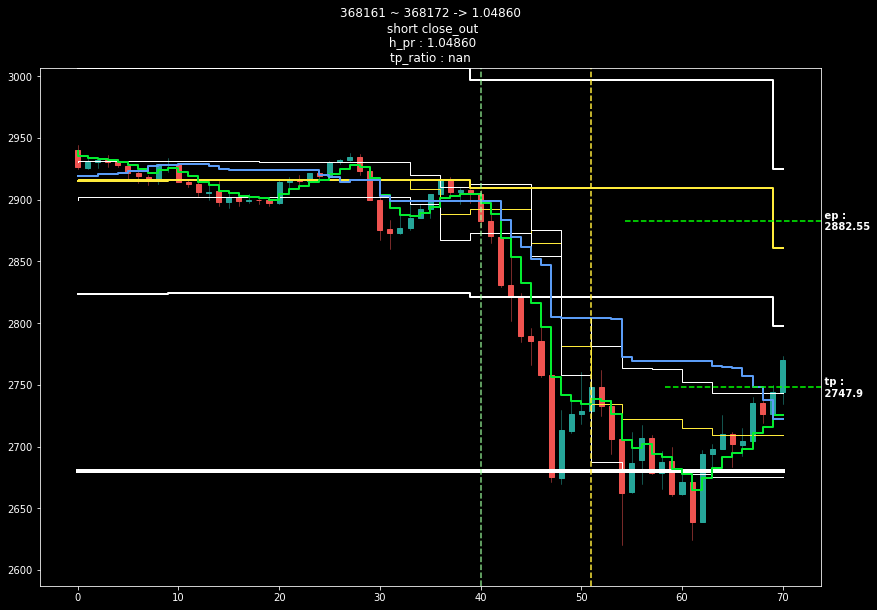


short real pr : [1.04686683]
long real pr : [0.95446648]


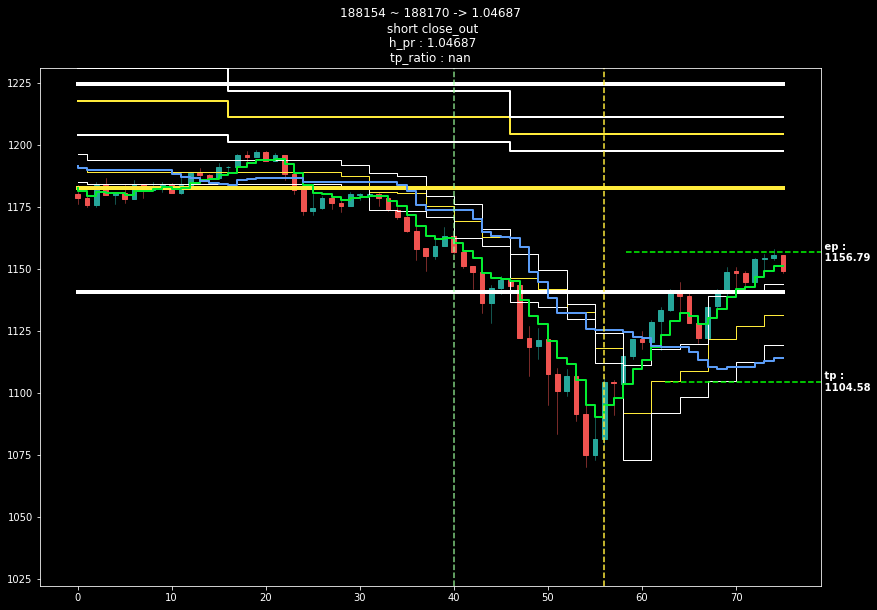


short real pr : [1.04570901]
long real pr : [0.95552332]


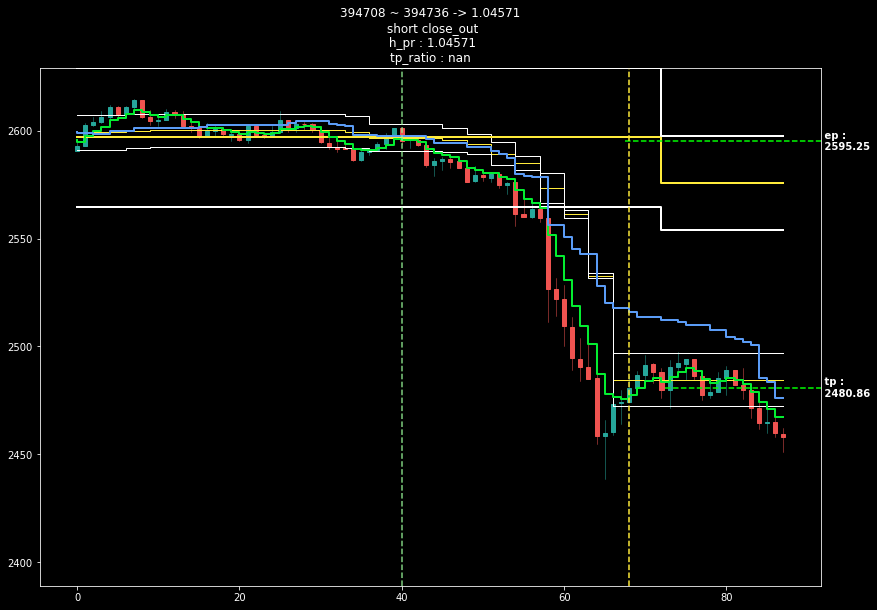


short real pr : [1.04459978]
long real pr : [0.956538]


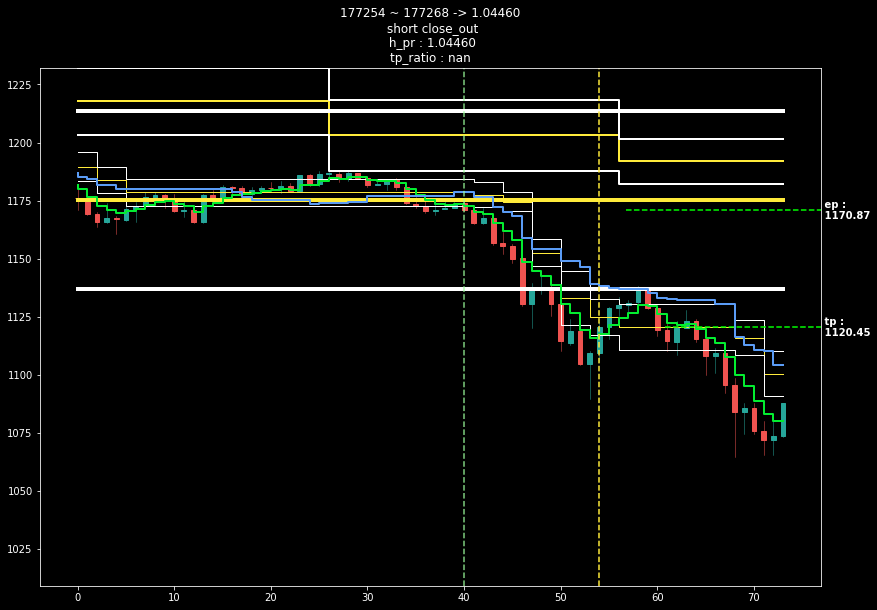


short real pr : [1.04445322]
long real pr : [0.95667223]


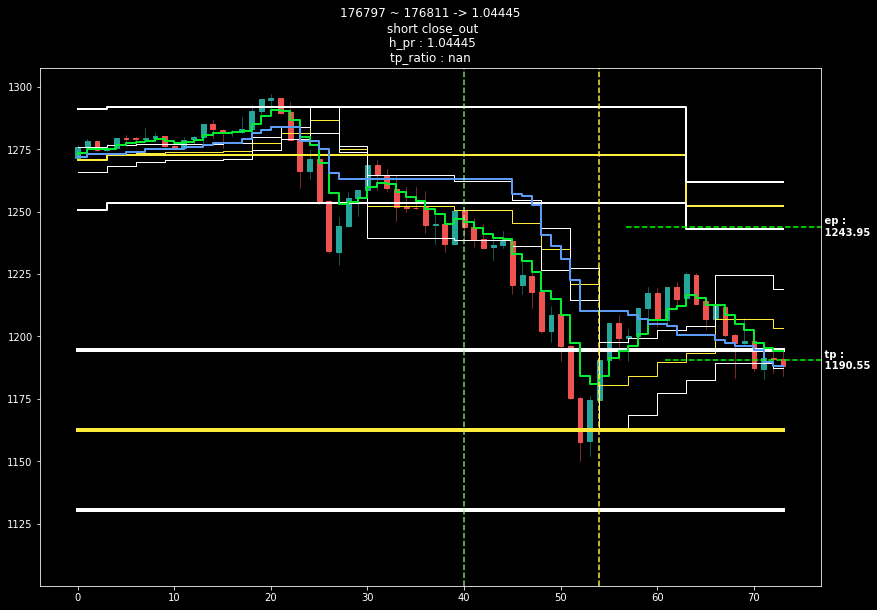


short real pr : [1.04378218]
long real pr : [0.95728729]


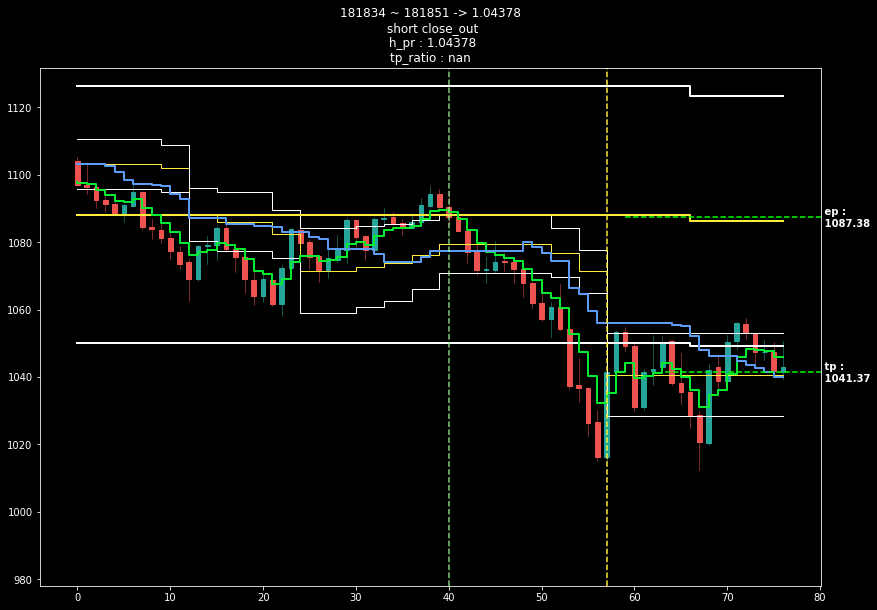


short real pr : [1.04378207]
long real pr : [0.95728739]


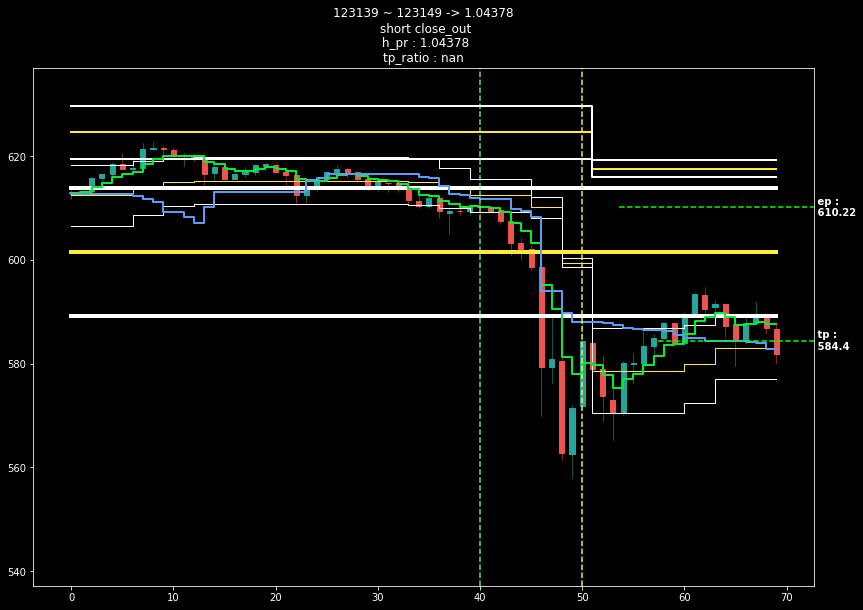


short real pr : [1.04363254]
long real pr : [0.95742455]


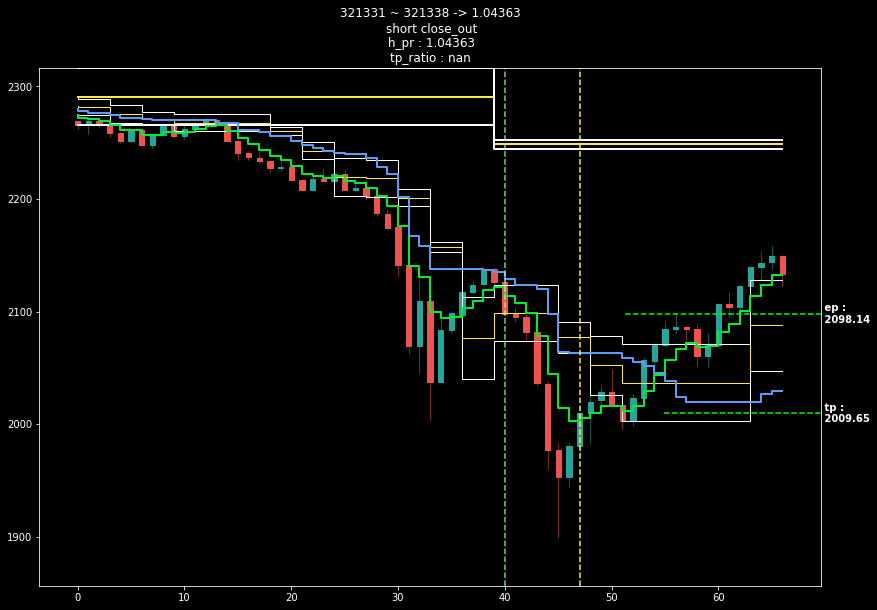


short real pr : [1.04161883]
long real pr : [0.95927556]


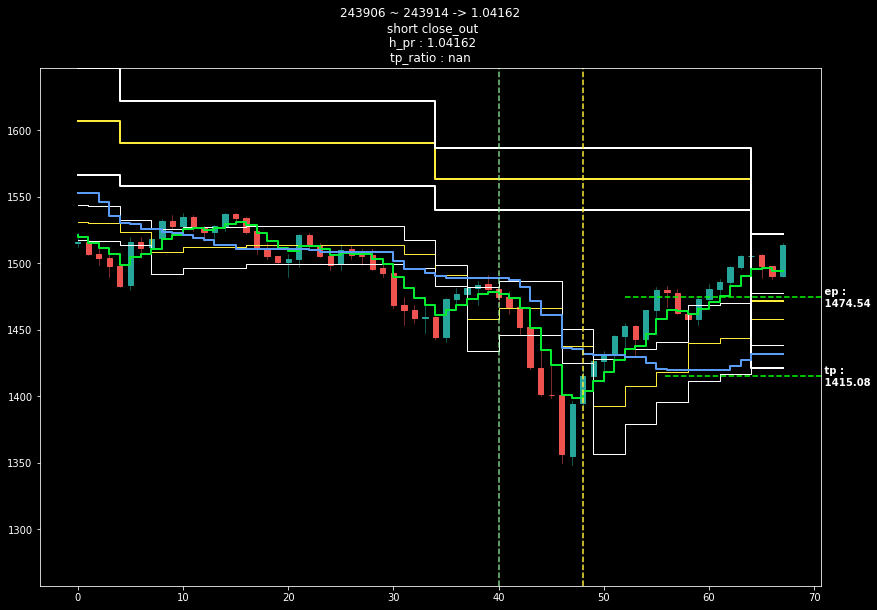


short real pr : [1.04151065]
long real pr : [0.9593752]


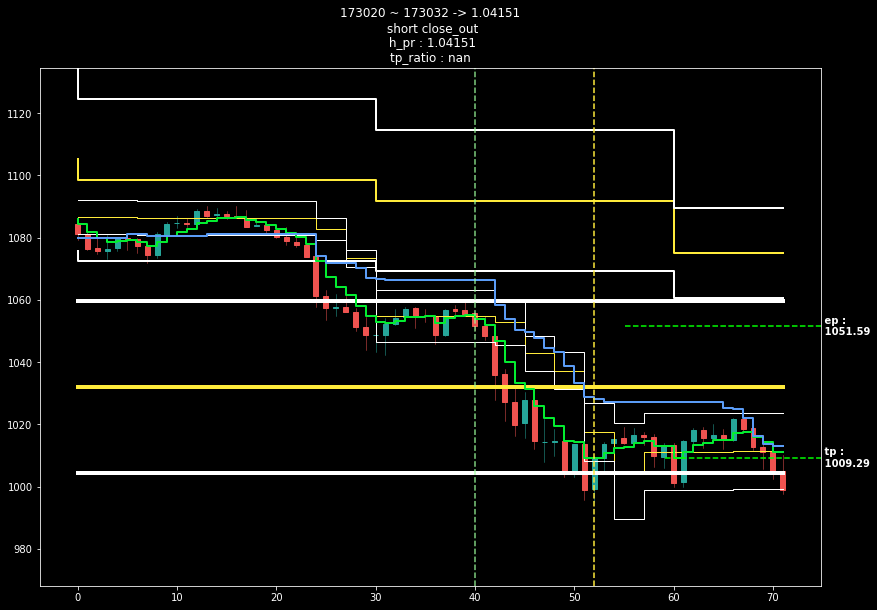


short real pr : [1.04030629]
long real pr : [0.9604859]


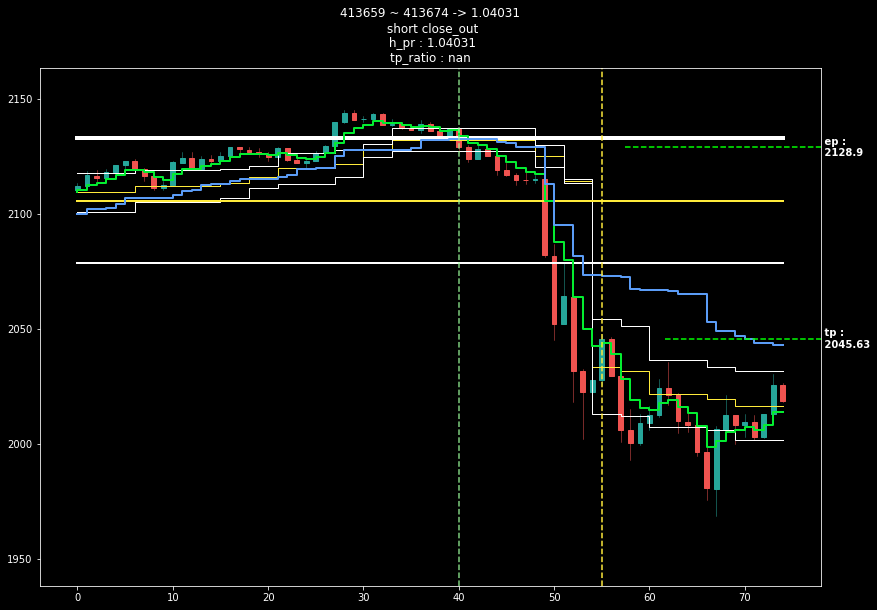


short real pr : [1.03956262]
long real pr : [0.96117303]


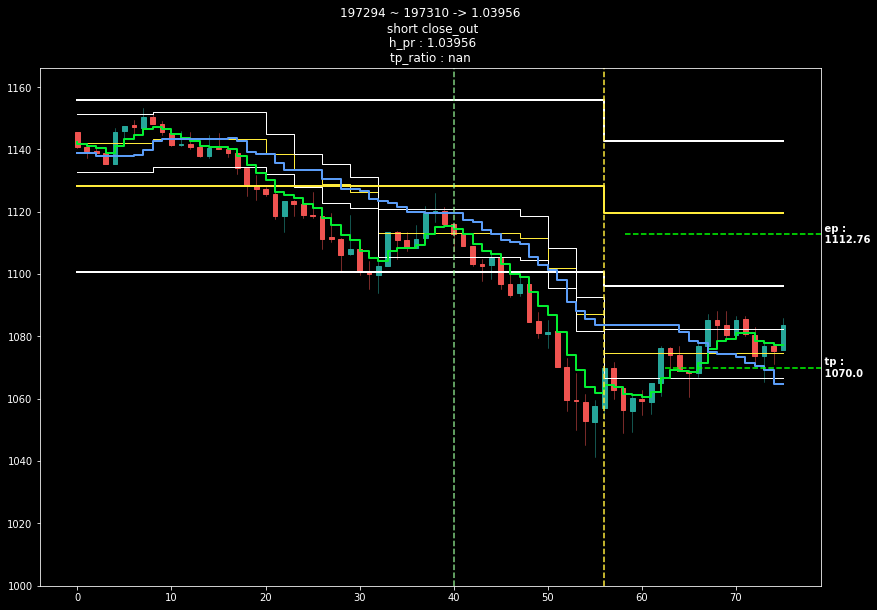


short real pr : [1.03952995]
long real pr : [0.96120323]


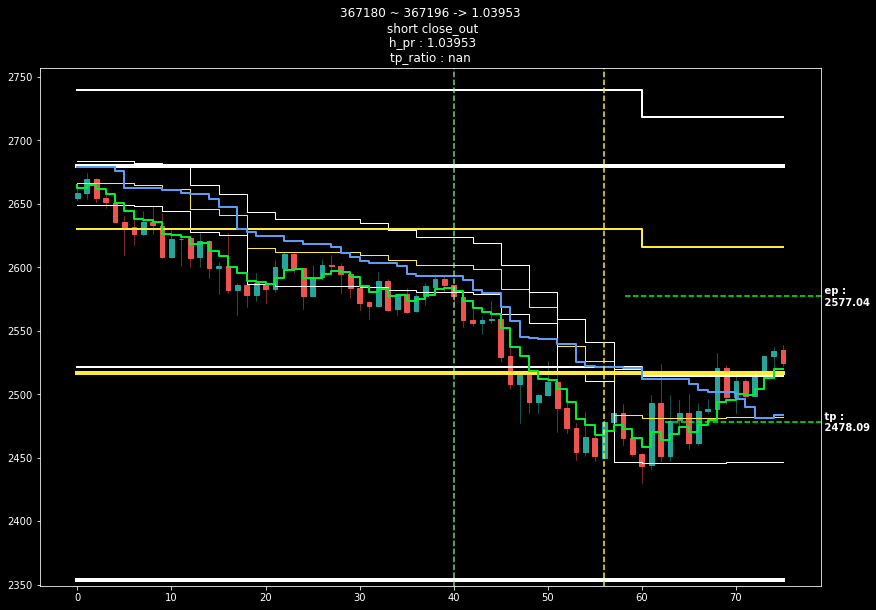


short real pr : [1.03945114]
long real pr : [0.96127611]


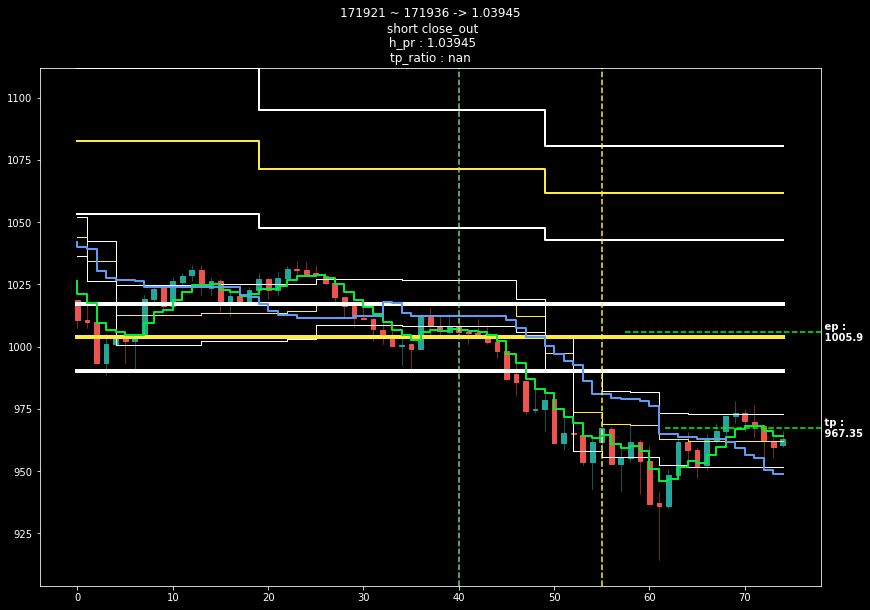


short real pr : [1.03943199]
long real pr : [0.96129382]


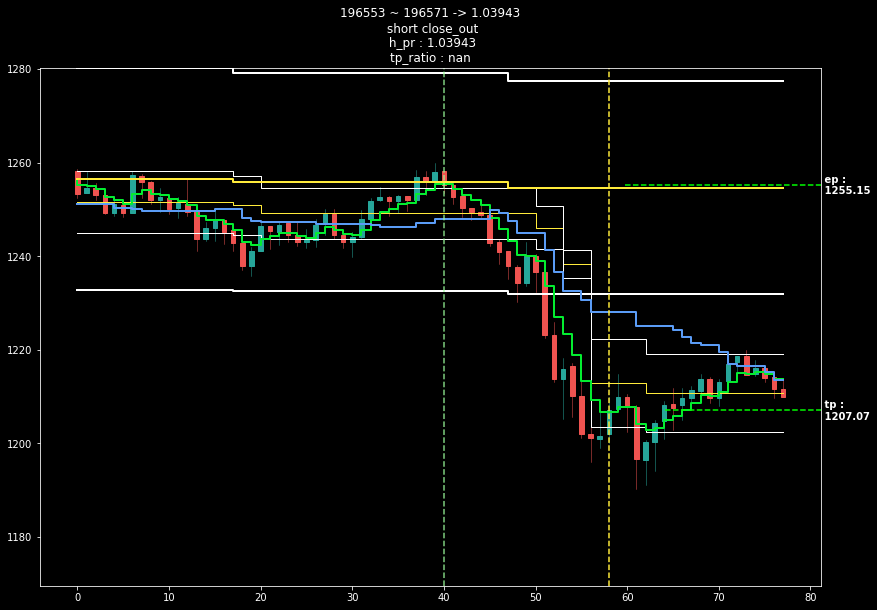


short real pr : [1.03826209]
long real pr : [0.96237702]


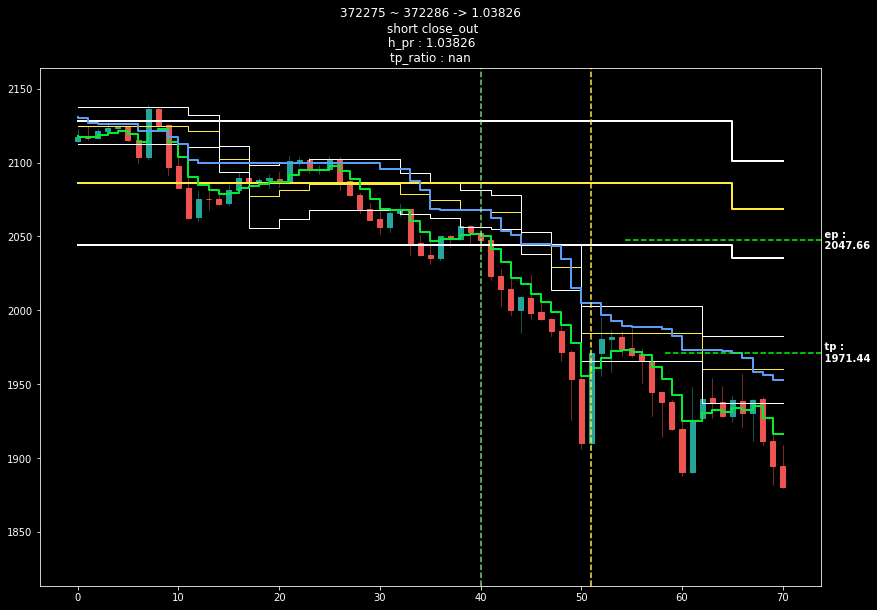

KeyboardInterrupt: ignored

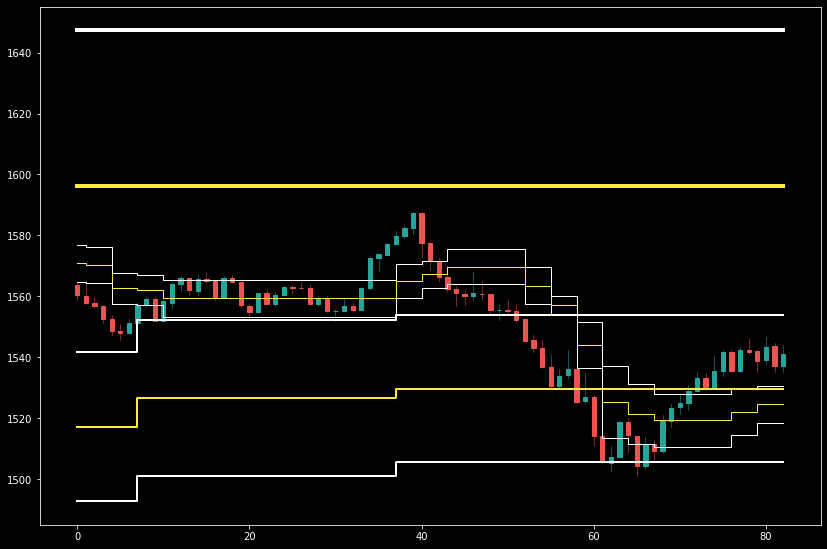

In [29]:
assert len(open_list) == len(trade_list), "len(open_list) != len(trade_list)"

save_plot = False
pr_descend = True


if save_plot:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".xlsx", "")
  try:
    os.mkdir(plot_check_dir)
  except:

    #     remove existing dir   #
    shutil.rmtree(plot_check_dir)
    print(plot_check_dir, 'removed !')
    os.mkdir(plot_check_dir)
    # pass
    
prev_plotsize = 120
prev_plotsize = 40
post_plotsize = 20

# inversion = True
inversion = False

# hedge = True
# hedge = False


if inversion:  

    plot_pr_list = rev_np_pr
    h_plot_pr_list = h_rev_np_pr  # hedge

else:

    plot_pr_list = np_pr
    try:
      h_plot_pr_list = h_np_pr
    except Exception as e:
      print("error in h_plot_pr :", e)
      h_plot_pr_list = np_pr


#         select plot columns       #
basic_st_number = 2 # 5, 6 이라면 겹치지 않게 2로 설정
basic_st_list = ['ST1_Up%s' % basic_st_number, 'ST1_Down%s' % basic_st_number, 'ST2_Up%s' % basic_st_number, 'ST2_Down%s' % basic_st_number, 'ST3_Up%s' % basic_st_number, 'ST3_Down%s' % basic_st_number,
                 'middle_line%s' % basic_st_number, 'upper_middle%s' % basic_st_number, 'lower_middle%s' % basic_st_number]

ohlc_list = ['open', 'high', 'low', 'close'] # + basic_st_list

mmh_list = ['mmh_st1', 'mmh_st2']
norm_st_list = ['norm_st_up', 'norm_st_down']

pline_number = 5
pline_list = ['middle_line%s' % pline_number, 'upper_middle%s' % pline_number, 'lower_middle%s' % pline_number]

pline_number2 = 6
pline_list2 = ['middle_line%s' % pline_number2, 'upper_middle%s' % pline_number2, 'lower_middle%s' % pline_number2]



senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a%s' % basic_st_number]
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b%s' % basic_st_number]
senkoua_list = ['senkou_a1']
senkoub_list = ['senkou_b1']

# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar%s' % basic_st_number]
sar_list = ['sar1']

# ma_list = ['sma1', 'sma4']
# ma_list = ['ema%s' % basic_st_number]
ma_list = ['ema1']

cb_list = ['cloud_bline']


#     -------------- under price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist%s' % basic_st_number]
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
# trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix%s' % basic_st_number]
trix_list = ['trix1', 'trix2', 'trix3']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']
emaroc_list = ['ema_roc']


# input_colname = ohlc_list + senkoua_list + senkoub_list + sar_list + ma_list + macd_list + stoch_list + fisher_list + cctbbo_list

input_colname = ohlc_list + basic_st_list + pline_list + pline_list2 + senkoua_list + senkoub_list
input_colname = ohlc_list + basic_st_list + pline_list + pline_list2 + ma_list + cb_list
# input_colname = ohlc_list + mmh_list + norm_st_list 

# yrange_colname = ohlc_list + basic_st_list + pline_list + pline_list2 + senkoua_list + senkoub_list # currently just used for ymin, ymax
yrange_colname = ohlc_list + basic_st_list + pline_list # currently just used for ymin, ymax
# yrange_colname = ohlc_list + mmh_list + norm_st_list


# aggr_obj = dict(zip(plot_pr_list, open_list, enumerate(trade_list)))
aggr_obj = dict(zip(plot_pr_list, zip(open_list, enumerate(trade_list))))

sorted_obj = sorted(aggr_obj.items(), key=(lambda x: x[0]), reverse=pr_descend)
# print(aggr_obj)
# print(sorted_obj)


for _, (open_idx, (t_i, (ep_idx_list_, tp_idx_list_))) in sorted_obj: # 0.699700153073042, (291402, (3014, ([370012], [370014])))
# for _, (open_idx, (t_i, (ep_idx_list_, tp_idx_list_))) in aggr_obj.items():

  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i == 1536:
  # if 100 < i < 1860:
  #   pass
  # else:
  #   continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue

  # if (entry[i] == -1) and res_df['close'].iloc[i - 1] > short_ep.iloc[i]:
  #   pass
  # else:
  #   continue

  # if plot_pr_list[t_i] > 0.5:
  # if plot_pr_list[t_i] > 1.0:
  # if plot_pr_list[t_i] < 1.0:
  #   continue

  plot_df = res_df.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize][input_colname]


  #       keep off-color st with another variable         #
  # st_trend_plot_df = res_df[['ST1_Trend%s' % basic_st_number, 'ST2_Trend%s' % basic_st_number, 'ST3_Trend%s' % basic_st_number]].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  y_max = max(np.max(plot_df[yrange_colname]))
  y_min = min(np.min(plot_df[yrange_colname]))

  if np.isnan(y_max) or np.isnan(y_min):
    continue
  # print("y_max, y_min :", y_max, y_min)
  # break

  # plot_df["off_color_upper_hst1"] = np.where(st_trend_plot_df['ST1_Trend%s' % basic_st_number] == 1, plot_df['ST1_Up%s' % basic_st_number], np.nan)
  # plot_df["off_color_upper_hst2"] = np.where(st_trend_plot_df['ST2_Trend%s' % basic_st_number] == 1, plot_df['ST2_Up%s' % basic_st_number], np.nan)
  # plot_df["off_color_upper_hst3"] = np.where(st_trend_plot_df['ST3_Trend%s' % basic_st_number] == 1, plot_df['ST3_Up%s' % basic_st_number], np.nan)
  # plot_df["off_color_lower_hst1"] = np.where(st_trend_plot_df['ST1_Trend%s' % basic_st_number] == -1, plot_df['ST1_Down%s' % basic_st_number], np.nan)
  # plot_df["off_color_lower_hst2"] = np.where(st_trend_plot_df['ST2_Trend%s' % basic_st_number] == -1, plot_df['ST2_Down%s' % basic_st_number], np.nan)
  # plot_df["off_color_lower_hst3"] = np.where(st_trend_plot_df['ST3_Trend%s' % basic_st_number] == -1, plot_df['ST3_Down%s' % basic_st_number], np.nan)


  # #       replace st values with np.nan, using st trend     #
  # plot_df['ST1_Up%s' % basic_st_number] = np.where(st_trend_plot_df['ST1_Trend%s' % basic_st_number] == 1, np.nan, plot_df['ST1_Up%s' % basic_st_number])
  # plot_df['ST2_Up%s' % basic_st_number] = np.where(st_trend_plot_df['ST2_Trend%s' % basic_st_number] == 1, np.nan, plot_df['ST2_Up%s' % basic_st_number])
  # plot_df['ST3_Up%s' % basic_st_number] = np.where(st_trend_plot_df['ST3_Trend%s' % basic_st_number] == 1, np.nan, plot_df['ST3_Up%s' % basic_st_number])
  # plot_df['ST1_Down%s' % basic_st_number] = np.where(st_trend_plot_df['ST1_Trend%s' % basic_st_number] == -1, np.nan, plot_df['ST1_Down%s' % basic_st_number])
  # plot_df['ST2_Down%s' % basic_st_number] = np.where(st_trend_plot_df['ST2_Trend%s' % basic_st_number] == -1, np.nan, plot_df['ST2_Down%s' % basic_st_number])
  # plot_df['ST3_Down%s' % basic_st_number] = np.where(st_trend_plot_df['ST3_Trend%s' % basic_st_number] == -1, np.nan, plot_df['ST3_Down%s' % basic_st_number])


  # fig = trendln.plot_support_resistance(plot_df['close'], accuracy=8, fromwindows=False, numbest=1,  window=30) # requires matplotlib - pip install matplotlib
  
  plt.style.use('dark_background')

  # fig = plt.figure(figsize=(12, 16))
  fig = plt.figure(figsize=(14, 18))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  # ax = fig.add_subplot(311)
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='#26a69a', colordown='#ef5350')

  # ---------- plot basic st_line ---------- #
  
  # plt.step(plot_df[['ST1_Up%s' % basic_st_number, 'ST2_Up%s' % basic_st_number, 'ST3_Up%s' % basic_st_number]].values, 'r', alpha=1, linewidth=1)  # major upper on color
  # plt.step(plot_df[['ST1_Down%s' % basic_st_number, 'ST2_Down%s' % basic_st_number, 'ST3_Down%s' % basic_st_number]].values, 'b', alpha=1, linewidth=1)  # major lower on color
  
  # plt.step(plot_df[['off_color_upper_hst1', 'off_color_upper_hst2', 'off_color_upper_hst3']].values, 'r', alpha=1, linestyle=':', linewidth=1)  # major upper off color
  # plt.step(plot_df[['off_color_lower_hst1', 'off_color_lower_hst2', 'off_color_lower_hst3']].values, 'b', alpha=1, linestyle=':', linewidth=1)  # major lower off color

  plt.step(plot_df[['middle_line%s' % basic_st_number]].values, '#ffeb3b', alpha=1, linewidth=1) 
  plt.step(plot_df[['upper_middle%s' % basic_st_number]].values, '#ffffff', linestyle='-', alpha=1, linewidth=1) 
  plt.step(plot_df[['lower_middle%s' % basic_st_number]].values, '#ffffff', linestyle='-', alpha=1, linewidth=1) 
  
  
  # ---------- plot pline ---------- #

  plt.step(plot_df[['middle_line%s' % pline_number]].values, '#ffeb3b', alpha=1, linewidth=2) 
  plt.step(plot_df[['upper_middle%s' % pline_number]].values, '#ffffff', linestyle='-', alpha=1, linewidth=2) 
  plt.step(plot_df[['lower_middle%s' % pline_number]].values, '#ffffff', linestyle='-', alpha=1, linewidth=2) 
  
  plt.step(plot_df[['middle_line%s' % pline_number2]].values, '#ffeb3b', alpha=1, linewidth=4) 
  plt.step(plot_df[['upper_middle%s' % pline_number2]].values, '#ffffff', linestyle='-', alpha=1, linewidth=4) 
  plt.step(plot_df[['lower_middle%s' % pline_number2]].values, '#ffffff', linestyle='-', alpha=1, linewidth=4) 
  

  # ---------- mmh pline ---------- #

  # plt.step(plot_df[['mmh_st1']].values, 'fuchsia', alpha=1, linewidth=1) 
  # plt.step(plot_df[['mmh_st2']].values, 'g', linestyle='-', alpha=1, linewidth=1) 


  # plt.step(np.arange(len(plot_df)), plot_df[['norm_st_up']].values, linestyle='-', linewidth=2, color='r') 
  # plt.step(np.arange(len(plot_df)), plot_df[['norm_st_down']].values, linestyle='-', linewidth=2, color='b') 


  # ---------- ep tp line ---------- #

  # plot_short_ep = short_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  # plot_long_ep = long_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  # plot_short_tp = short_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  # plot_long_tp = long_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]  

  # plt.step(np.arange(len(plot_df)), plot_short_ep.values, alpha=1, linestyle='--', color='y')  # ep
  # plt.step(np.arange(len(plot_df)),plot_long_ep.values, alpha=1, linestyle='--', color='y')  # ep

  # plt.step(np.arange(len(plot_df)), plot_short_tp.values, alpha=1, linestyle=':', color='y')  # tp
  # plt.step(np.arange(len(plot_df)), plot_long_tp.values, alpha=1, linestyle=':', color='y')  # tp



  # ---------------------- on price indicator part ---------------------- #

  # ---------------------- ma ---------------------- #
  alpha = 1
  for sm_i, sma in enumerate(ma_list):
    if sm_i > 0:
      lw = 5
    else:
      lw = 2
    plt.step(np.arange(len(plot_df)), plot_df[sma].values, alpha=alpha, color='#03ed30', linewidth=lw)
    alpha -= 0.2

  
  # ---------------------- cb ---------------------- #
  alpha = 1
  for sm_i, sma in enumerate(cb_list):
    if sm_i > 0:
      lw = 5
    else:
      lw = 2
    plt.step(np.arange(len(plot_df)), plot_df[sma].values, alpha=alpha, color='#5b9cf6', linewidth=lw)
    alpha -= 0.2
  
  #               sar               #
  # alpha = 1
  # markersize = 5
  # for sar in sar_list:
  #   plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
  #   markersize += 1
  #   alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  # alpha = 0.7
  # for senkoua, senkoub in zip(senkoua_list, senkoub_list):
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
  #                     where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
  #                     where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
  #   alpha -= 0.05
  
  # ------------------------------------------------------------- #


  #       ep & tp     #
  # if i != initial_i:
  # if len(ep_idx_list_) > 1:
  
  # ------------- initial order ------------- #
  plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  for ep_i in range(len(ep_idx_list_)):
    plt.axvline(prev_plotsize + (ep_idx_list_[ep_i] - ep_idx_list_[0]), alpha=0.5, linestyle='--')

  # plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')

  x0,x1 = plt.gca().get_xlim()

  plt.axhline(ep_tp_list[t_i][0], linestyle='--', xmin=0.75, xmax=1, alpha=1, color='lime')  # ep line axhline  
  # print("ep_tp_list[t_i][0] :", ep_tp_list[t_i][0])
  # print("ep_tp_list[t_i][1][sub_i] :", ep_tp_list[t_i][1][sub_i])
  plt.text(x1, ep_tp_list[t_i][0][0], ' ep :\n %s' % ep_tp_list[t_i][0][0], ha='left', va='center', fontweight='bold') # ep line label

  for sub_i in range(len(ep_tp_list[t_i][1])):
    plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='--', xmin=0.75 + 0.05 * (sub_i + 1) , xmax=1, alpha=1, color='lime')  # tp line axhline
    plt.text(x1, ep_tp_list[t_i][1][sub_i], ' tp :\n %s' % ep_tp_list[t_i][1][sub_i], ha='left', va='center', fontweight='bold') # tp line label
     
    # plt.axhline(ep_tp_list[t_i][1], linestyle='-', xmin=0.9, xmax=1, linewidth=3)  # tp line axhline  

    plt.axvline(prev_plotsize + (tp_idx_list_[sub_i] - ep_idx_list_[0]), alpha=1.0, linestyle='--', color='#ffeb3b')


  #         hedge ep & tp         #
  h_i = h_trade_list[t_i][1]
  if h_i is not None:
    plt.axvline(prev_plotsize + (h_i - ep_idx_list_[0]), linestyle='--')
    plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
    plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  #         check pr        #
  if not static_lvrg:
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\nlvrg : %s\ntp_ratio : %.2f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], h_plot_pr_list[t_i], lvrg_list[t_i], tp_ratio_list[t_i]))
  else:
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\ntp_ratio : %.2f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], h_plot_pr_list[t_i], tp_ratio_list[t_i]))

  print("short real pr :", (ep_tp_list[t_i][0] / ep_tp_list[t_i][1][sub_i] - fee - 1) * lvrg + 1)
  print("long real pr :", (ep_tp_list[t_i][1][sub_i] / ep_tp_list[t_i][0] - fee - 1) * lvrg + 1)

  #           y lim         #
  plt.ylim(y_min, y_max)


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2

  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
    
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- cctbbo ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for cctbbo in cctbbo_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cctbbo].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(cctbbo_upper, linestyle='--')
  # plt.axhline(cctbbo_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- ema_roc ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for emaroc in emaroc_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[emaroc].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')





  # ---------------------- plot ---------------------- #

  if not save_plot:
    plt.show()
  
  else:
    # ---------- save mode ---------- #
    fig_name = plot_check_dir +  "/%s.png" % t_i
    plt.savefig(fig_name)
    print(fig_name, "saved !")

  
  plt.close()
  print()

  # break


### plot all indicator (stepline ver.)

short real pr : [0.95849245]
long real pr : [1.0378222]


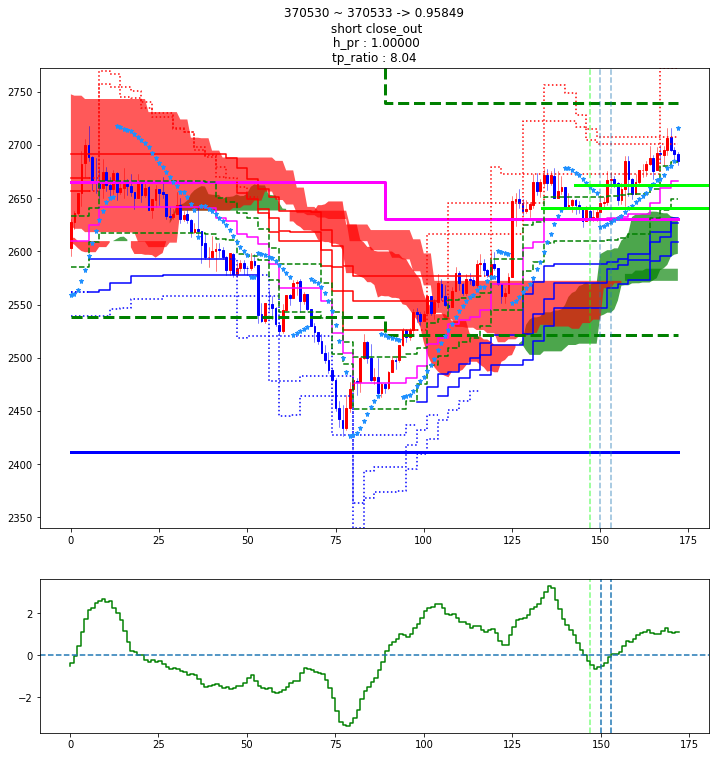

In [ ]:
save_plot = False


if save_plot:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".xlsx", "")
  try:
    os.mkdir(plot_check_dir)
  except:

    #     remove existing dir   #
    shutil.rmtree(plot_check_dir)
    print(plot_check_dir, 'removed !')
    os.mkdir(plot_check_dir)
    # pass
    
# prev_plotsize = 120
prev_plotsize = 150
post_plotsize = 20

# inversion = True
inversion = False

# hedge = True
# hedge = False


if inversion:  

    plot_pr_list = rev_np_pr
    h_plot_pr_list = h_rev_np_pr  # hedge

else:

    plot_pr_list = np_pr
    try:
      h_plot_pr_list = h_np_pr
    except Exception as e:
      print("error in h_plot_pr :", e)
      h_plot_pr_list = np_pr


#         select plot columns       #
major_st_list = ['major_ST1_Up', 'major_ST1_Down', 'major_ST2_Up', 'major_ST2_Down', 'major_ST3_Up', 'major_ST3_Down',
                 'major_middle_line', 'major_upper_middle', 'major_lower_middle']

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower'] # + major_st_list


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1',  'senkou_a2']
senkoub_list = ['senkou_b1',  'senkou_b2']

# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1']

# ma_list = ['sma1', 'sma4']
ma_list = ['ema5']


#     -------------- under price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
# trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
trix_list = ['trix1', 'trix2', 'trix3']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']
emaroc_list = ['ema_roc']


#       
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + trix_list
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + ma_list
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + ma_list + macd_list + stoch_list + fisher_list + cctbbo_list
input_colname = basic_list + major_st_list + senkoua_list + senkoub_list + sar_list + stoch_list + fisher_list + emaroc_list
price_colname = basic_list + senkoua_list + senkoub_list + sar_list # currently just used for ymin, ymax
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols




# for t_i, (initial_i, i, j) in enumerate(trade_list):
for t_i, (ep_idx_list_, tp_idx_list_) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i == 1536:
  # if 100 < i < 1860:
  if ep_idx_list_[0] == 370530:
    pass
  else:
    continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue

  # if (entry[i] == -1) and res_df['close'].iloc[i - 1] > short_ep.iloc[i]:
  #   pass
  # else:
  #   continue

  # if plot_pr_list[t_i] > 0.5:
  # if plot_pr_list[t_i] > 1.0:
  # # if plot_pr_list[t_i] < 1.0:
  #   continue

  # plot_df = res_df.iloc[i - prev_plotsize:j + post_plotsize, input_cols]
  plot_df = res_df.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize][input_colname]


  #       keep off-color st with another variable         #
  # st_trend_plot_df = res_df.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize, [7, 10, 13]]
  # st_trend_plot_df = res_df[['minor_ST1_Trend', 'minor_ST2_Trend', 'minor_ST3_Trend']].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  st_trend_plot_df = res_df[['minor_ST1_Trend', 'minor_ST2_Trend', 'minor_ST3_Trend', 'major_ST1_Trend', 'major_ST2_Trend', 'major_ST3_Trend']].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  # htf_st_trend_plot_df = res_df[['major_ST1_Trend', 'major_ST2_Trend', 'major_ST3_Trend']].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  # y_max = np.max(plot_df.iloc[:, [4, 6, 8]])
  # y_min = np.min(plot_df.iloc[:, [5, 7, 9]])
  # print("y_max, y_min :", y_max, y_min)
  
  # y_max = max(np.max(plot_df.iloc[:, [4, 6, 8]]))
  # y_min = min(np.min(plot_df.iloc[:, [5, 7, 9]]))
  
  y_max = max(np.max(plot_df[price_colname]))
  y_min = min(np.min(plot_df[price_colname]))

  if np.isnan(y_max) or np.isnan(y_min):
    continue
  # print("y_max, y_min :", y_max, y_min)
  # break
  
  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df['minor_ST1_Trend'] == 1, plot_df['minor_ST1_Up'], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df['minor_ST2_Trend'] == 1, plot_df['minor_ST2_Up'], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df['minor_ST3_Trend'] == 1, plot_df['minor_ST3_Up'], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df['minor_ST1_Trend'] == -1, plot_df['minor_ST1_Down'], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df['minor_ST2_Trend'] == -1, plot_df['minor_ST2_Down'], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df['minor_ST3_Trend'] == -1, plot_df['minor_ST3_Down'], np.nan)

  plot_df["off_color_upper_hst1"] = np.where(st_trend_plot_df['major_ST1_Trend'] == 1, plot_df['major_ST1_Up'], np.nan)
  plot_df["off_color_upper_hst2"] = np.where(st_trend_plot_df['major_ST2_Trend'] == 1, plot_df['major_ST2_Up'], np.nan)
  plot_df["off_color_upper_hst3"] = np.where(st_trend_plot_df['major_ST3_Trend'] == 1, plot_df['major_ST3_Up'], np.nan)
  plot_df["off_color_lower_hst1"] = np.where(st_trend_plot_df['major_ST1_Trend'] == -1, plot_df['major_ST1_Down'], np.nan)
  plot_df["off_color_lower_hst2"] = np.where(st_trend_plot_df['major_ST2_Trend'] == -1, plot_df['major_ST2_Down'], np.nan)
  plot_df["off_color_lower_hst3"] = np.where(st_trend_plot_df['major_ST3_Trend'] == -1, plot_df['major_ST3_Down'], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df['minor_ST1_Up'] = np.where(st_trend_plot_df['minor_ST1_Trend'] == 1, np.nan, plot_df['minor_ST1_Up'])
  plot_df['minor_ST2_Up'] = np.where(st_trend_plot_df['minor_ST2_Trend'] == 1, np.nan, plot_df['minor_ST2_Up'])
  plot_df['minor_ST3_Up'] = np.where(st_trend_plot_df['minor_ST3_Trend'] == 1, np.nan, plot_df['minor_ST3_Up'])
  plot_df['minor_ST1_Down'] = np.where(st_trend_plot_df['minor_ST1_Trend'] == -1, np.nan, plot_df['minor_ST1_Down'])
  plot_df['minor_ST2_Down'] = np.where(st_trend_plot_df['minor_ST2_Trend'] == -1, np.nan, plot_df['minor_ST2_Down'])
  plot_df['minor_ST3_Down'] = np.where(st_trend_plot_df['minor_ST3_Trend'] == -1, np.nan, plot_df['minor_ST3_Down'])

  plot_df['major_ST1_Up'] = np.where(st_trend_plot_df['major_ST1_Trend'] == 1, np.nan, plot_df['major_ST1_Up'])
  plot_df['major_ST2_Up'] = np.where(st_trend_plot_df['major_ST2_Trend'] == 1, np.nan, plot_df['major_ST2_Up'])
  plot_df['major_ST3_Up'] = np.where(st_trend_plot_df['major_ST3_Trend'] == 1, np.nan, plot_df['major_ST3_Up'])
  plot_df['major_ST1_Down'] = np.where(st_trend_plot_df['major_ST1_Trend'] == -1, np.nan, plot_df['major_ST1_Down'])
  plot_df['major_ST2_Down'] = np.where(st_trend_plot_df['major_ST2_Trend'] == -1, np.nan, plot_df['major_ST2_Down'])
  plot_df['major_ST3_Down'] = np.where(st_trend_plot_df['major_ST3_Trend'] == -1, np.nan, plot_df['major_ST3_Down'])


  plot_short_ep = short_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  plot_long_ep = long_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  plot_long_tp = long_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]  


  # fig = trendln.plot_support_resistance(plot_df['close'], accuracy=8, fromwindows=False, numbest=1,  window=30) # requires matplotlib - pip install matplotlib

  fig = plt.figure(figsize=(12, 16))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  # ax = fig.add_subplot(311)
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  plt.step(plot_df[['minor_ST1_Up', 'minor_ST2_Up', 'minor_ST3_Up']].values, 'r', alpha=1)  # upper on color
  plt.step(plot_df[['minor_ST1_Down', 'minor_ST2_Down', 'minor_ST3_Down']].values, 'b', alpha=1)  # lower on color
  
  plt.step(plot_df[['major_ST1_Up', 'major_ST2_Up', 'major_ST3_Up']].values, 'r', alpha=1, linewidth=3)  # major upper on color
  plt.step(plot_df[['major_ST1_Down', 'major_ST2_Down', 'major_ST3_Down']].values, 'b', alpha=1, linewidth=3)  # major lower on color

  plt.step(plot_df[['middle_line']].values, 'fuchsia', alpha=1)  # middle 
  plt.step(plot_df[['major_middle_line']].values, 'fuchsia', alpha=1, linewidth=3)  # major_middle 
  
  plt.step(plot_df[['off_color_upper_st1', 'off_color_upper_st2', 'off_color_upper_st3']].values, 'r', alpha=1, linestyle=':')  # upper off color
  plt.step(plot_df[['off_color_lower_st1', 'off_color_lower_st2', 'off_color_lower_st3']].values, 'b', alpha=1, linestyle=':')  # lower off color
  
  plt.step(plot_df[['off_color_upper_hst1', 'off_color_upper_hst2', 'off_color_upper_hst3']].values, 'r', alpha=1, linestyle=':', linewidth=3)  # major upper off color
  plt.step(plot_df[['off_color_lower_hst1', 'off_color_lower_hst2', 'off_color_lower_hst3']].values, 'b', alpha=1, linestyle=':', linewidth=3)  # major lower off color


  # plt.step(np.arange(len(plot_df)), plot_short_ep.values, alpha=1, linestyle='--', color='y')  # ep
  # plt.step(np.arange(len(plot_df)),plot_long_ep.values, alpha=1, linestyle='--', color='y')  # ep

  plt.step(np.arange(len(plot_df)), plot_upper_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle
  plt.step(np.arange(len(plot_df)), plot_lower_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle

  plt.step(plot_df[['major_upper_middle']].values, 'g', linestyle='--', alpha=1, linewidth=3)  # major_middle 
  plt.step(plot_df[['major_lower_middle']].values, 'g', linestyle='--', alpha=1, linewidth=3)  # major_middle 
  

  # plt.step(np.arange(len(plot_df)), plot_short_tp.values, alpha=1, linestyle=':', color='y')  # tp
  # plt.step(np.arange(len(plot_df)), plot_long_tp.values, alpha=1, linestyle=':', color='y')  # tp



  # ---------------------- on price indicator part ---------------------- #

  # ---------------------- sma ---------------------- #
  # alpha = 1
  # for sm_i, sma in enumerate(ma_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[sma].values, alpha=alpha, color='black', linewidth=lw)
  #   alpha -= 0.2
  
  #               sar               #
  alpha = 1
  markersize = 5
  for sar in sar_list:
    plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
    markersize += 1
    alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  alpha = 0.7
  for senkoua, senkoub in zip(senkoua_list, senkoub_list):
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
                      where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
                      where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
    alpha -= 0.05
  
  # ------------------------------------------------------------- #


  #       ep & tp     #
  # if i != initial_i:
  # if len(ep_idx_list_) > 1:
  
  # ------------- initial order ------------- #
  plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  for ep_i in range(len(ep_idx_list_)):
    plt.axvline(prev_plotsize + (ep_idx_list_[ep_i] - ep_idx_list_[0]), alpha=0.5, linestyle='--')

  # plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')
  plt.axhline(ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='lime')  # ep line axhline

  for sub_i in range(len(ep_tp_list[t_i][1])):
    plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='-', xmin=0.75 + 0.05 * (sub_i + 1) , xmax=1, linewidth=3, color='lime')  # tp line axhline
    # plt.axhline(ep_tp_list[t_i][1], linestyle='-', xmin=0.9, xmax=1, linewidth=3)  # tp line axhline  
    plt.axvline(prev_plotsize + (tp_idx_list_[sub_i] - ep_idx_list_[0]), alpha=0.5, linestyle='--')


  #         hedge ep & tp         #
  h_i = h_trade_list[t_i][1]
  if h_i is not None:
    plt.axvline(prev_plotsize + (h_i - ep_idx_list_[0]), linestyle='--')
    plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
    plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  #         check pr        #
  if not static_lvrg:
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\nlvrg : %s\ntp_ratio : %.2f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], h_plot_pr_list[t_i], lvrg_list[t_i], tp_ratio_list[t_i]))
  else:
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\ntp_ratio : %.2f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], h_plot_pr_list[t_i], tp_ratio_list[t_i]))

  print("short real pr :", (ep_tp_list[t_i][0] / ep_tp_list[t_i][1][sub_i] - fee - 1) * lvrg + 1)
  print("long real pr :", (ep_tp_list[t_i][1][sub_i] / ep_tp_list[t_i][0] - fee - 1) * lvrg + 1)

  #           y lim         #
  plt.ylim(y_min, y_max)


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2

  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
    
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  # ---------- cctbbo ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for cctbbo in cctbbo_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cctbbo].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(cctbbo_upper, linestyle='--')
  # plt.axhline(cctbbo_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  # ---------- ema_roc ---------- #  
  plt.subplot(gs[1])
  alpha = 1
  for emaroc in emaroc_list:
    plt.step(np.arange(len(plot_df)), plot_df[emaroc].values, 'g', alpha=alpha)
    # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
    alpha -= 0.2
  plt.axvline(prev_plotsize, linestyle='--')
  plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')
  plt.axhline(0, linestyle='--')





  # ---------------------- plot ---------------------- #

  if not save_plot:
    plt.show()
  
  else:
    # ---------- save mode ---------- #
    fig_name = plot_check_dir +  "/%s.png" % t_i
    plt.savefig(fig_name)
    print(fig_name, "saved !")

  
  plt.close()
  print()

  # break


In [ ]:
# print()
for item in os.listdir(current_path + "plot_check/"):
  if item.endswith('png'):
    os.remove(current_path + "plot_check/" + item)
    print(current_path + "plot_check/" + item, "removed !")

### plot nontp case

In [ ]:
prev_plotsize = 50

# inversion = True
inversion = False

# hedge = True
# hedge = False

short_ver = False


if inversion:  

    plot_pr_list = rev_np_pr
    h_plot_pr_list = h_rev_np_pr  # hedge

else:

    plot_pr_list = np_pr
    h_plot_pr_list = h_np_pr



#         select plot columns       #
# basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

# sar_cols = [15, 18] # 15 ~ 19
# ichimoku_cols = [20, 21]  # 20 ~ 29
# # ichimoku_cols = [22, 23]  # 20 ~ 29
# ichimoku_cols2 = [22, 23]  # 20 ~ 29
# macd_cols = [30]  # 30 ~ 34

# print(res_df.columns[basic_cols])
# break

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3']
sar_list = ['sar1', 'sar2', 'sar3']

#     -------------- under price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
stoch_list = ['stoch']
fisher_list = ['fisher']
cctbbo_list = ['cctbbo']


#       
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + trix_list
input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + stoch_list + fisher_list + cctbbo_list
price_colname = basic_list + senkoua_list + senkoub_list + sar_list 
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols


if short_ver:
  nontp_indexs = nontp_short_indexs
  nontp_liqd_list = nontp_short_liqd_list
  nontp_pr_list = nontp_short_pr_list
  nontp_ep = nontp_short_ep_list
else:
  nontp_indexs = nontp_long_indexs
  nontp_liqd_list = nontp_long_liqd_list
  nontp_pr_list = nontp_long_pr_list
  nontp_ep = nontp_long_ep_list


for t_i, i in enumerate(nontp_indexs):

  j = len(res_df) - 1

  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i == 1536:
  # # if 1800 < i < 1860:
  #   pass
  # else:
  #   continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue

  # if (entry[i] == -1) and res_df['close'].iloc[i - 1] > upper_ep.iloc[i]:
  #   pass
  # else:
  #   continue

  # if plot_pr_list[t_i] > 0.5:
  # if plot_pr_list[t_i] > 1.0:
  # # if plot_pr_list[t_i] < 1.0:
  #   continue

  # plot_df = res_df.iloc[i - prev_plotsize:j + 1, input_cols]
  plot_df = res_df.iloc[i - prev_plotsize:j + 1][input_colname]


  #       keep off-color st with another variable         #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]

  # y_max = np.max(plot_df.iloc[:, [4, 6, 8]])
  # y_min = np.min(plot_df.iloc[:, [5, 7, 9]])
  # print("y_max, y_min :", y_max, y_min)
  
  # y_max = max(np.max(plot_df.iloc[:, [4, 6, 8]]))
  # y_min = min(np.min(plot_df.iloc[:, [5, 7, 9]]))
  
  y_max = max(np.max(plot_df[price_colname]))
  y_min = min(np.min(plot_df[price_colname]))
  # print("y_max, y_min :", y_max, y_min)
  # break

  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, plot_df.iloc[:, [4]], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, plot_df.iloc[:, [6]], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, plot_df.iloc[:, [8]], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, plot_df.iloc[:, [5]], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, plot_df.iloc[:, [7]], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, plot_df.iloc[:, [9]], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[i - prev_plotsize:j + 1]
  plot_long_tp = long_tp.iloc[i - prev_plotsize:j + 1]  



  # fig = plt.figure(figsize=(12, 16))
  fig = plt.figure(figsize=(12, 16))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  # ax = fig.add_subplot(311)
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.step(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  # plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  plt.step(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower on color
  plt.step(plot_df.values[:, [10]], 'fuchsia', alpha=1)  # middle
  
  plt.step(plot_df.values[:, -6:-3], 'r', alpha=1, linestyle=':')  # upper off color
  plt.step(plot_df.values[:, -3:], 'b', alpha=1, linestyle=':')  # lower off color



  # plt.step(np.arange(len(plot_df)), plot_upper_ep.values, alpha=1, linestyle='--', color='y')  # ep
  # plt.step(np.arange(len(plot_df)),plot_lower_ep.values, alpha=1, linestyle='--', color='y')  # ep

  plt.step(np.arange(len(plot_df)), plot_upper_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle
  plt.step(np.arange(len(plot_df)), plot_lower_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle

  # plt.step(np.arange(len(plot_df)), plot_short_tp.values, alpha=1, linestyle=':', color='y')  # tp
  # plt.step(np.arange(len(plot_df)), plot_long_tp.values, alpha=1, linestyle=':', color='y')  # tp



  # ---------------------- indicator part ---------------------- #
  
  #               sar               #
  alpha = 1
  markersize = 5
  for sar in sar_list:
    plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
    markersize += 1
    alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  alpha = 0.7
  for senkoua, senkoub in zip(senkoua_list, senkoub_list):
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
                      where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
                      where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
    alpha -= 0.05
  
  # ------------------------------------------------------------- #


  #       ep & tp     #
  if i != initial_i:
    plt.axvline(prev_plotsize - (i - initial_i), alpha=0.5, linestyle='--')
  plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')
  plt.axhline(nontp_ep[t_i], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='lime')  # ep line axhline

  # for sub_i in range(len(ep_tp_list[t_i][1])):
  #   plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='-', xmin=0.75 + 0.05 * (sub_i + 1) , xmax=1, linewidth=3, color='lime')  # tp line axhline
    # plt.axhline(ep_tp_list[t_i][1], linestyle='-', xmin=0.9, xmax=1, linewidth=3)  # tp line axhline    

  #         hedge ep & tp         #
  # h_i = h_trade_list[t_i][1]
  # if h_i is not None:
  #   plt.axvline(prev_plotsize + (h_i - i), linestyle='--')
  #   plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
  #   plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  #         check pr        #
  plt.title("%s ~ %s -> liqd : %.2f\npr : %.2f" % (i, j, nontp_liqd_list[t_i], nontp_pr_list[t_i]))

  #           y lim         #
  plt.ylim(y_min, y_max)


  # #           macd          #
  # # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # plt.subplot(313)
  plt.subplot(gs[1])
  alpha = 1
  for stoch in stoch_list:
    plt.step(np.arange(len(plot_df)), plot_df[stoch].values, 'g', alpha=alpha)
    # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
    alpha -= 0.2
  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(50, linestyle='--')
  plt.axhline(stoch_upper, linestyle='--')
  plt.axhline(stoch_lower, linestyle='--')



  # ---------------------- plot ---------------------- #

  plt.show()
  # plt.draw()
  plt.close()
  print()

  # break


### specific plot v1

In [ ]:
prev_plotsize = 50

# inversion = True
inversion = False

if inversion:
  plot_pr_list = rev_np_pr
else:
  plot_pr_list = np_pr



#         select plot columns       #
basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

sar_cols = [15, 18] # 15 ~ 19
ichimoku_cols = [20, 21]  # 20 ~ 29
# ichimoku_cols = [22, 23]  # 20 ~ 29
ichimoku_cols2 = [22, 23]  # 20 ~ 29
macd_cols = [30]  # 30 ~ 34


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']

input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols




for t_i, (i, j) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i != 257:
  #   continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue


  if plot_pr_list[t_i] > 1.0:
  # if plot_pr_list[t_i] < 1.0:
    continue

  plot_df = res_df.iloc[i - prev_plotsize:j + 1, input_cols]


  #       keep off-color st with another variable         #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]

  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, plot_df.iloc[:, [4]], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, plot_df.iloc[:, [6]], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, plot_df.iloc[:, [8]], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, plot_df.iloc[:, [5]], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, plot_df.iloc[:, [7]], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, plot_df.iloc[:, [9]], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[i - prev_plotsize:j + 1]
  plot_long_tp = long_tp.iloc[i - prev_plotsize:j + 1]  



  fig = plt.figure(figsize=(12, 16))
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  ax = fig.add_subplot(211)

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower on color
  plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle
  
  plt.plot(plot_df.values[:, -6:-3], 'r', alpha=1, linestyle=':')  # upper off color
  plt.plot(plot_df.values[:, -3:], 'b', alpha=1, linestyle=':')  # lower off color

  plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
  # plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  plt.plot(plot_upper_ep.values, alpha=1, linestyle='--')  # ep
  plt.plot(plot_lower_ep.values, alpha=1, linestyle='--')  # ep

  plt.plot(plot_upper_middle.values, alpha=1, linestyle='--')  # middle
  plt.plot(plot_lower_middle.values, alpha=1, linestyle='--')  # middle

  plt.plot(plot_short_tp.values, alpha=1, linestyle=':')  # tp
  plt.plot(plot_long_tp.values, alpha=1, linestyle=':')  # tp

  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14], # ichimoku
                    where=plot_df.values[:, 13] >= plot_df.values[:, 14], facecolor='g', alpha=0.5) # ichimoku
  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                    where=plot_df.values[:, 13] <= plot_df.values[:, 14], facecolor='r', alpha=0.5)  
  
  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 16], plot_df.values[:, 17], # ichimoku
                    where=plot_df.values[:, 16] >= plot_df.values[:, 17], facecolor='g', alpha=0.3) # ichimoku
  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 16], plot_df.values[:, 17],
                    where=plot_df.values[:, 16] <= plot_df.values[:, 17], facecolor='r', alpha=0.3)

  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(ep_tp_list[t_i][1], linestyle='-')  # tp line axhline
  plt.title("%s ~ %s -> %.5f\n %s" % (i, j, plot_pr_list[t_i], tp_state_list[t_i]))


  plt.subplot(212)
  plt.plot(plot_df.values[:, [15]], 'g', alpha=1)  # middle
  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(0, linestyle='--')

  plt.show()
  # plt.draw()
  plt.close()
  print()



KeyError: ignored

### show detail values

In [ ]:
i, j = 27267, 27268
print("upper_ep.iloc[i] :", upper_ep.iloc[i])
print("short_tp.iloc[j] :", short_tp.iloc[j])

upper_ep.iloc[i] : 2348.266954813089
short_tp.iloc[j] : 2205.609333246829


## none plot off-color st

In [ ]:
prev_plotsize = 50

for t_i, (i, j) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if pr_list[t_i] >= 1:
  #   continue

  plot_df = res_df.iloc[i - prev_plotsize:j + 1, [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 16]]

  #       replace st values with np.nan, using st trend     #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper
  plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower
  plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle

  plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
  plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  plt.plot(plot_upper_ep.values, alpha=1, linestyle='--')  # ep
  plt.plot(plot_lower_ep.values, alpha=1, linestyle='--')  # ep

  plt.axvline(prev_plotsize, linestyle='--')

  plt.title("%s ~ %s -> %.5f" % (i, j, pr_list[t_i]))
  plt.show()
  # plt.draw()
  plt.close()